# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
# Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
# Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [204]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [205]:
file_loc = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
df = pd.read_csv(file_loc)
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [206]:
print('First 10 rows')
df.head(10)

First 10 rows


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

In [207]:
print('Last 10 rows')
df.tail(10)

Last 10 rows


Loan_ID  Gender Married Dependents     Education Self_Employed  \
604  LP002959  Female     Yes          1      Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   
606  LP002961    Male     Yes          1      Graduate            No   
607  LP002964    Male     Yes          2  Not Graduate            No   
608  LP002974    Male     Yes          0      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
604            12000                0.0       496.0             360.0   
605             2400             3800.0         NaN             180.0   
606             3400             2500.0       173.0             360.0   
607             3987             1411.0       157.0             360.0   
608             3232             1950.0       108.0             360.0   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
604             1.0     Semiurban           Y  
605             1.0         Urban           N  
606             1.0     Semiurban           Y  
607             1.0         Rural           Y  
608             1.0         Rural           Y  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [208]:
df.shape

(614, 13)

In [209]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [210]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [211]:
null_data = df.isnull().sum()
null_data.sort_values(ascending=0)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [212]:
df[df.isna().any(axis=1)]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
16   LP001034    Male      No          1  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate           NaN   
23   LP001050     NaN     Yes          2  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
592  LP002933     NaN      No         3+      Graduate           Yes   
597  LP002943    Male      No        NaN      Graduate            No   
600  LP002949  Female      No         3+      Graduate           NaN   
601  LP002950    Male     Yes          0  Not Graduate           NaN   
605  LP002960    Male     Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
11              2500             1840.0       109.0             360.0   
16              3596                0.0       100.0             240.0   
19              2600             3500.0       115.0               NaN   
23              3365             1917.0       112.0             360.0   
..               ...                ...         ...               ...   
592             9357                0.0       292.0             360.0   
597             2987                0.0        88.0             360.0   
600              416            41667.0       350.0             180.0   
601             2894             2792.0       155.0             360.0   
605             2400             3800.0         NaN             180.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
11              1.0         Urban           Y  
16              NaN         Urban           Y  
19              1.0         Urban           Y  
23              0.0         Rural           N  
..              ...           ...         ...  
592             1.0     Semiurban           Y  
597             0.0     Semiurban           N  
600             NaN         Urban           N  
601             1.0         Rural           Y  
605             1.0         Urban           N  

[134 rows x 13 columns]

In [213]:
df.dropna(axis=0,inplace=True)

In [214]:
desc = df.describe().T
desc['range']=desc['max']-desc['min']
desc

count         mean          std    min      25%     50%  \
ApplicantIncome    480.0  5364.231250  5668.251251  150.0  2898.75  3859.0   
CoapplicantIncome  480.0  1581.093583  2617.692267    0.0     0.00  1084.5   
LoanAmount         480.0   144.735417    80.508164    9.0   100.00   128.0   
Loan_Amount_Term   480.0   342.050000    65.212401   36.0   360.00   360.0   
Credit_History     480.0     0.854167     0.353307    0.0     1.00     1.0   

                       75%      max    range  
ApplicantIncome    5852.50  81000.0  80850.0  
CoapplicantIncome  2253.25  33837.0  33837.0  
LoanAmount          170.00    600.0    591.0  
Loan_Amount_Term    360.00    480.0    444.0  
Credit_History        1.00      1.0      1.0

In [215]:
df.describe(include='object').T

count unique        top freq
Loan_ID         480    480   LP001003    1
Gender          480      2       Male  394
Married         480      2        Yes  311
Dependents      480      4          0  274
Education       480      2   Graduate  383
Self_Employed   480      2         No  414
Property_Area   480      3  Semiurban  191
Loan_Status     480      2          Y  332

In [216]:
desc[['min','mean','max','range']]

min         mean      max    range
ApplicantIncome    150.0  5364.231250  81000.0  80850.0
CoapplicantIncome    0.0  1581.093583  33837.0  33837.0
LoanAmount           9.0   144.735417    600.0    591.0
Loan_Amount_Term    36.0   342.050000    480.0    444.0
Credit_History       0.0     0.854167      1.0      1.0

In [217]:
cont_data = df.select_dtypes(include=['int64','float64'])

cat_data= df.select_dtypes(include=['object'])

cont_columns = cont_data.columns

cat_columns = cat_data.columns

In [218]:
cont_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [219]:
cat_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [220]:
!pip install scipy

In [221]:
import pandas as pd

# Assuming cat_columns is a list of column names containing categorical data
for i in cat_columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        # Check for NaN or missing values in the column
        if df[i].isnull().any():
            print('For', i, ', most frequent value is:', df[i].mode().iloc[0], '\n')
        else:
            most_frequent_value = df[i].value_counts().idxmax()
            print('For', i, ', most frequent value is:', most_frequent_value, '\n')
    else:
        most_frequent_value = df[i].value_counts().idxmax()
        print('For', i, ', most frequent value is:', most_frequent_value, '\n')


For Loan_ID , most frequent value is: LP001003 

For Gender , most frequent value is: Male 

For Married , most frequent value is: Yes 

For Dependents , most frequent value is: 0 

For Education , most frequent value is: Graduate 

For Self_Employed , most frequent value is: No 

For Property_Area , most frequent value is: Semiurban 

For Loan_Status , most frequent value is: Y 



In [222]:
for i in cat_columns:
    print('For column',i,'unique values are: ',df[i].unique())
    print('For column',i,'count of unique values are: ',df[i].nunique(),'\n\n')
    

For column Loan_ID unique values are:  ['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011' 'LP001013'
 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001028' 'LP001029'
 'LP001030' 'LP001032' 'LP001036' 'LP001038' 'LP001043' 'LP001046'
 'LP001047' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001095'
 'LP001097' 'LP001098' 'LP001100' 'LP001112' 'LP001114' 'LP001116'
 'LP001119' 'LP001120' 'LP001131' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001186'
 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199' 'LP001205'
 'LP001206' 'LP001207' 'LP001222' 'LP001225' 'LP001228' 'LP001233'
 'LP001238' 'LP001241' 'LP001243' 'LP001245' 'LP001248' 'LP001253'
 'LP001255' 'LP001256' 'LP001259' 'LP001263' 'LP001265' 'LP001267'
 'LP001275' 'LP001279' 'LP001282' 'LP001289' 'LP001310' 'LP001316'
 'LP001318' 'LP001319' 'LP001322' 'LP001325' 'LP001327' 'LP001333'
 'LP001334' 'LP001343' 'LP001345' 'LP001349' 'LP001367' 'LP001369'
 'LP001379' 'LP001384' 

In [223]:
for i in cat_columns:
    print('For column --',i,'-- value counts are: \n',df[i].value_counts(),'\n\n')

For column -- Loan_ID -- value counts are: 
 Loan_ID
LP001003    1
LP001005    1
LP002347    1
LP002345    1
LP002342    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: count, Length: 480, dtype: int64 


For column -- Gender -- value counts are: 
 Gender
Male      394
Female     86
Name: count, dtype: int64 


For column -- Married -- value counts are: 
 Married
Yes    311
No     169
Name: count, dtype: int64 


For column -- Dependents -- value counts are: 
 Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64 


For column -- Education -- value counts are: 
 Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64 


For column -- Self_Employed -- value counts are: 
 Self_Employed
No     414
Yes     66
Name: count, dtype: int64 


For column -- Property_Area -- value counts are: 
 Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64 


For column -- Loan_Statu

In [224]:
df.duplicated().sum()

0

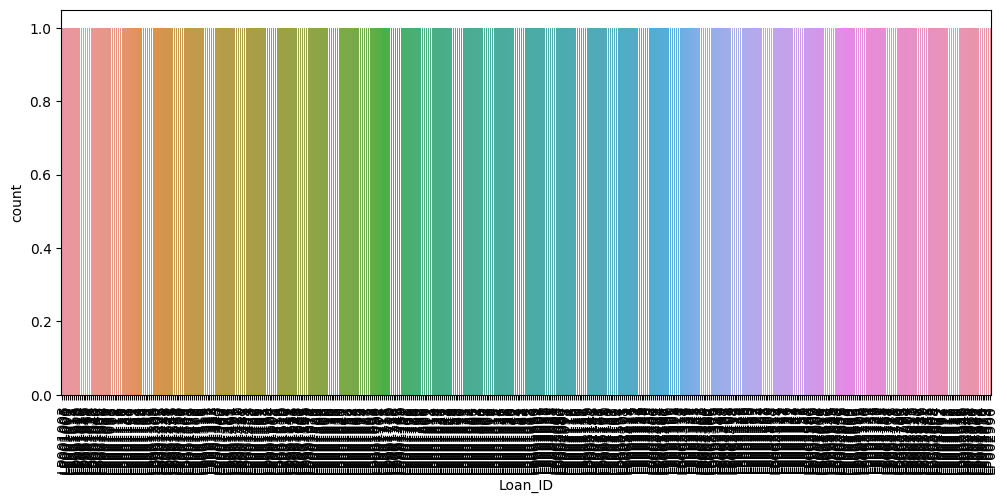

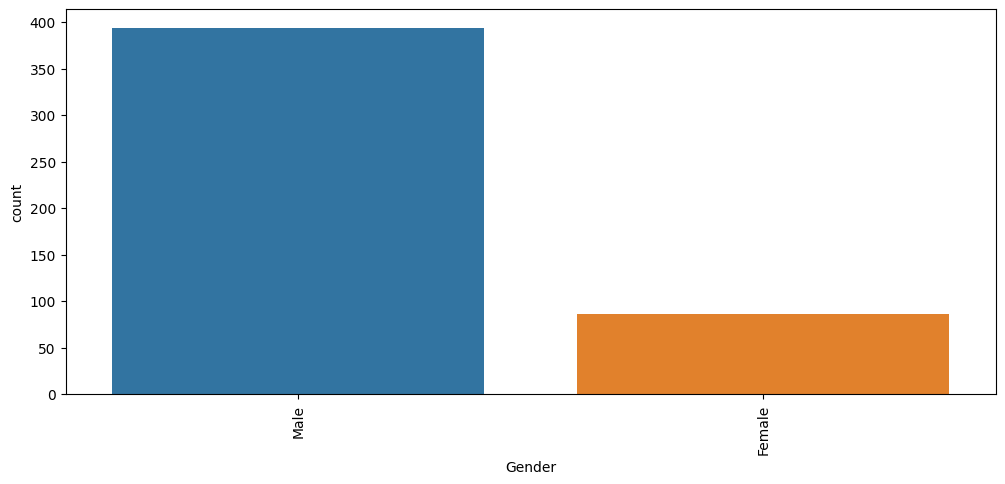

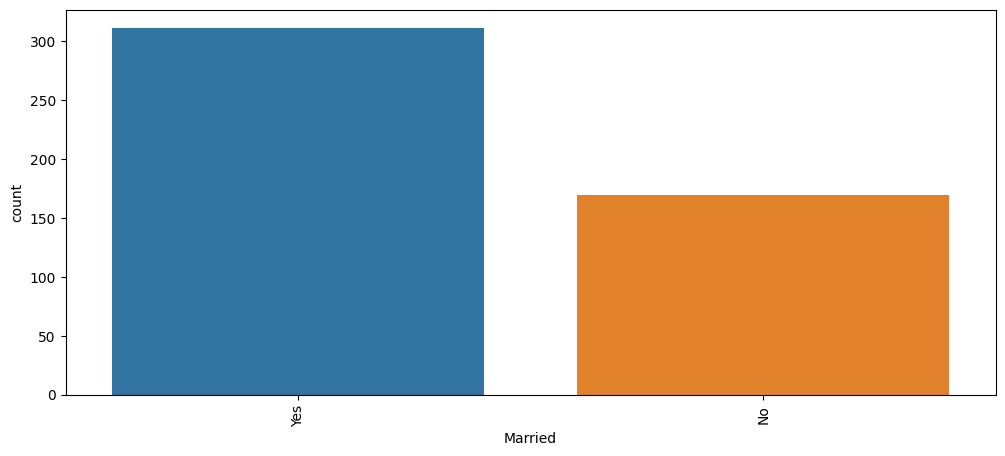

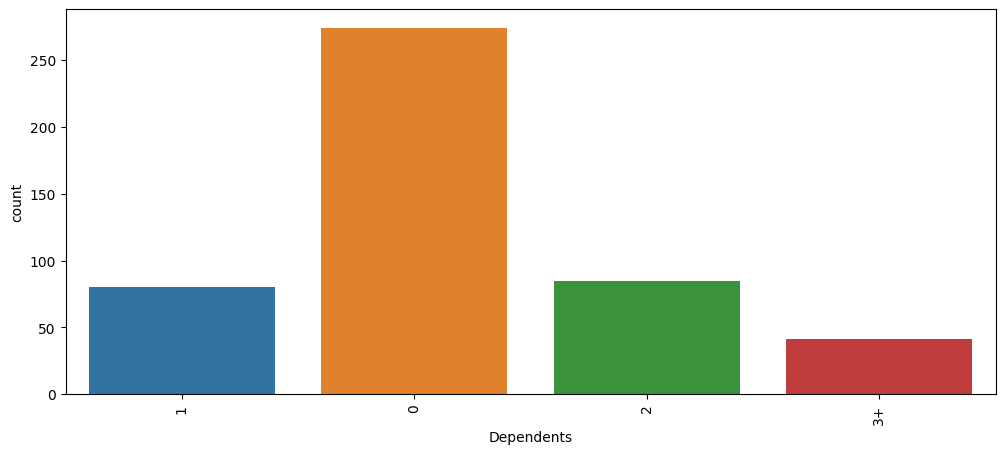

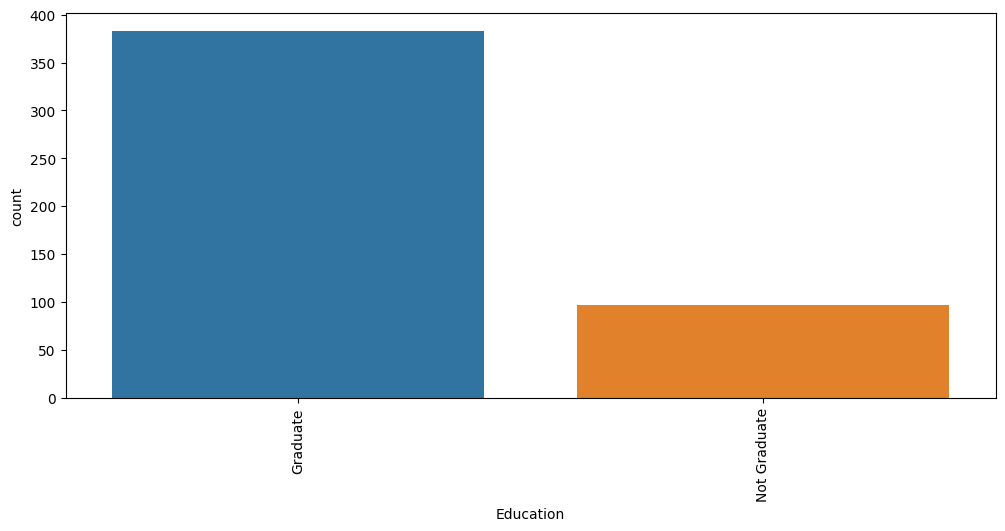

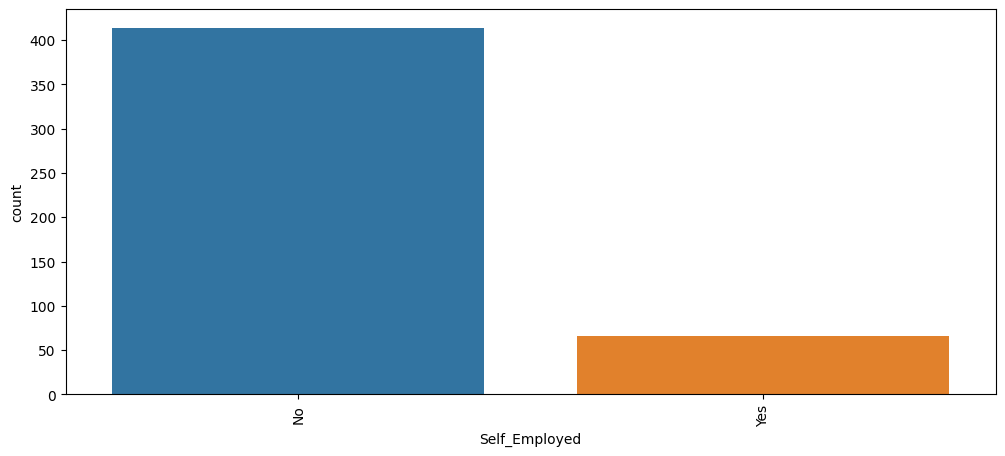

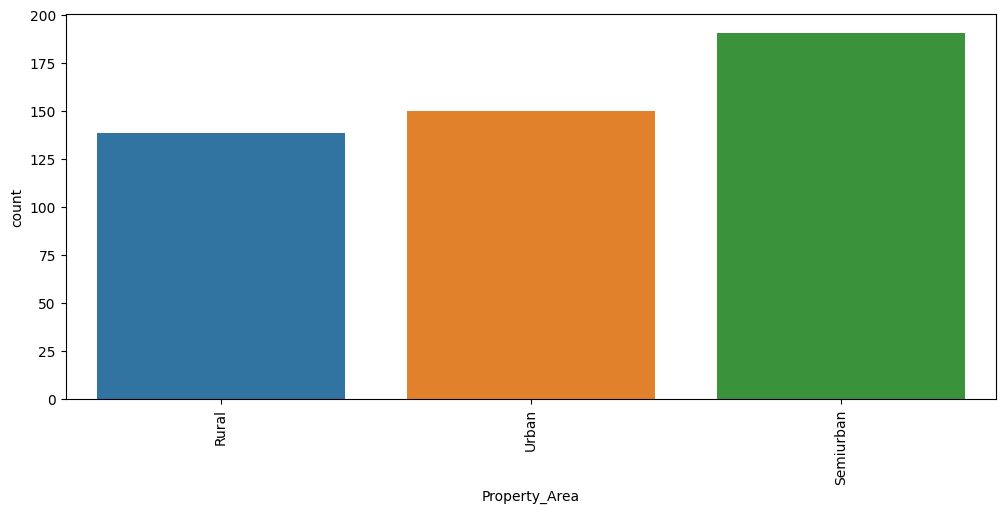

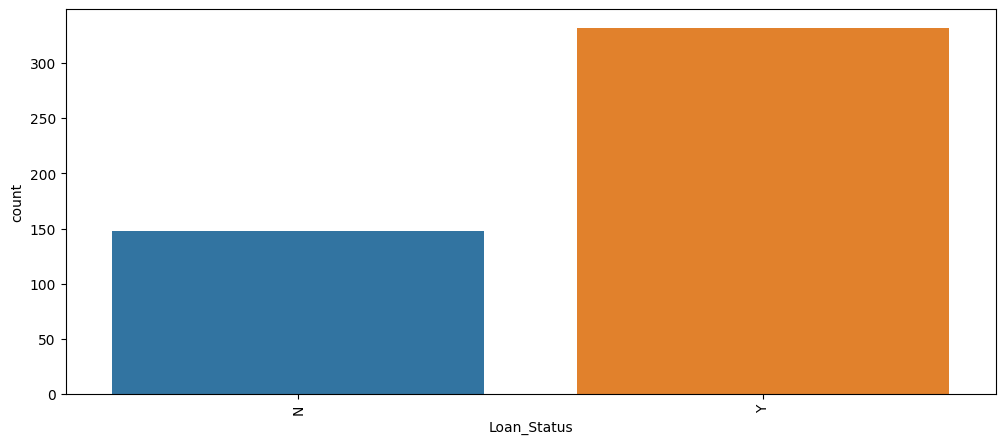

In [225]:
# Univariate analysis:

# COUNTPLOT

for i in cat_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.countplot(x=df[i],data=df)
    plt.xticks(rotation=90)

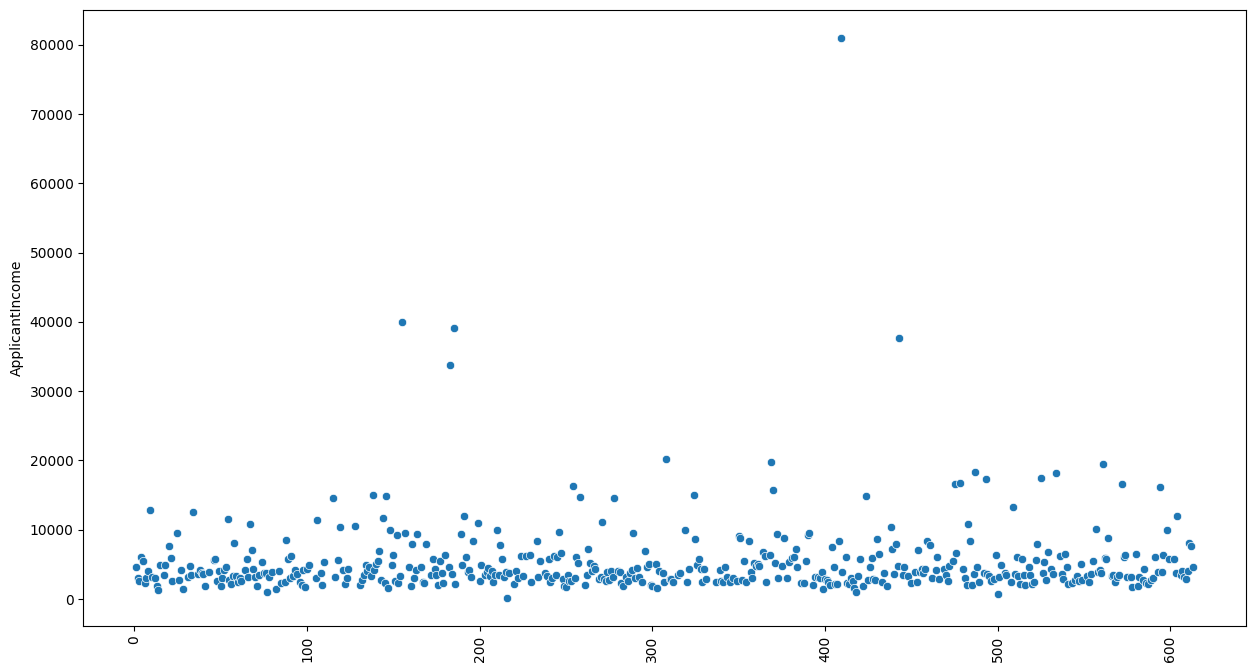

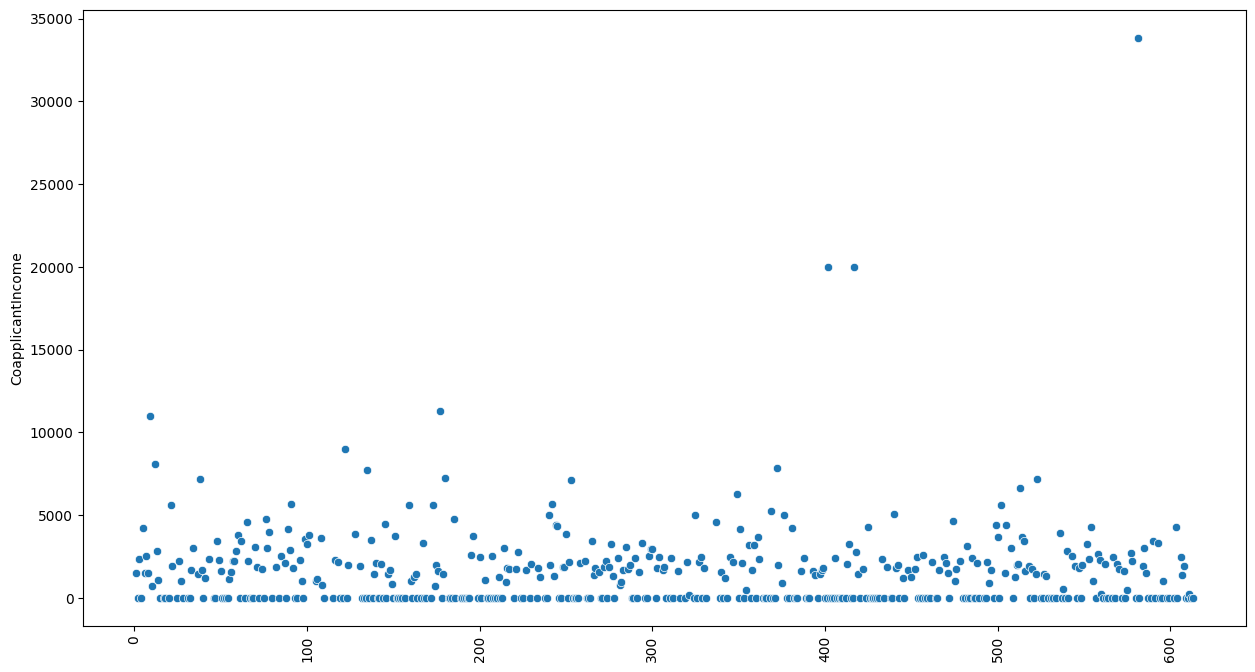

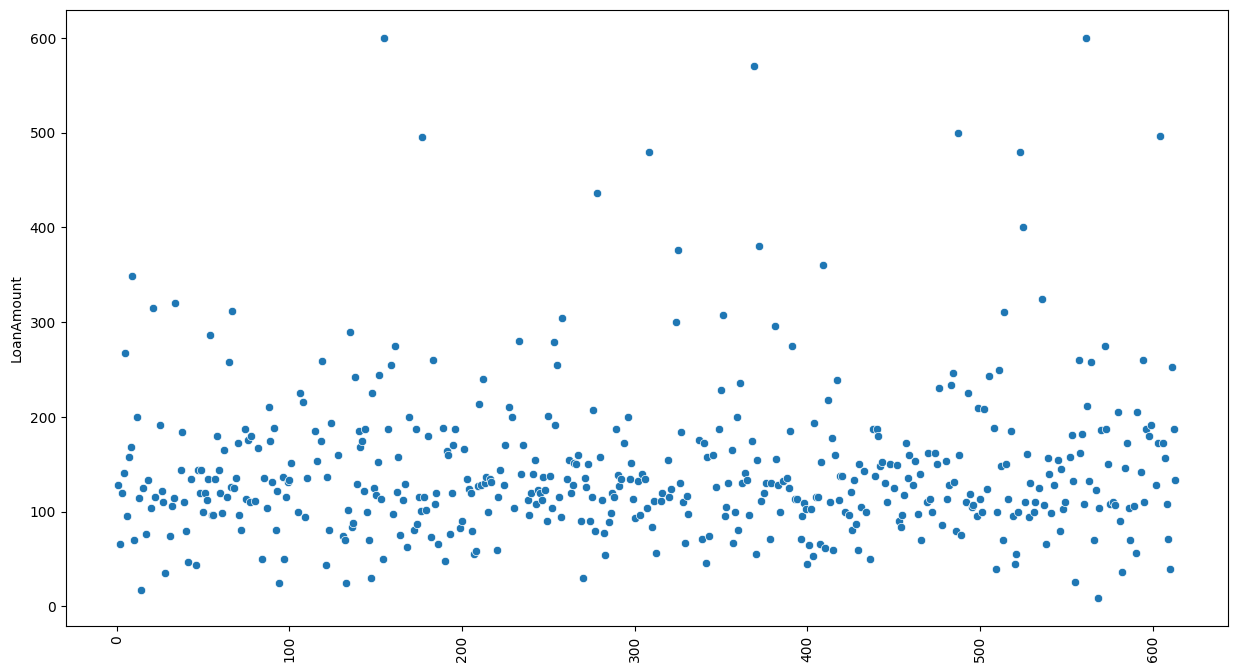

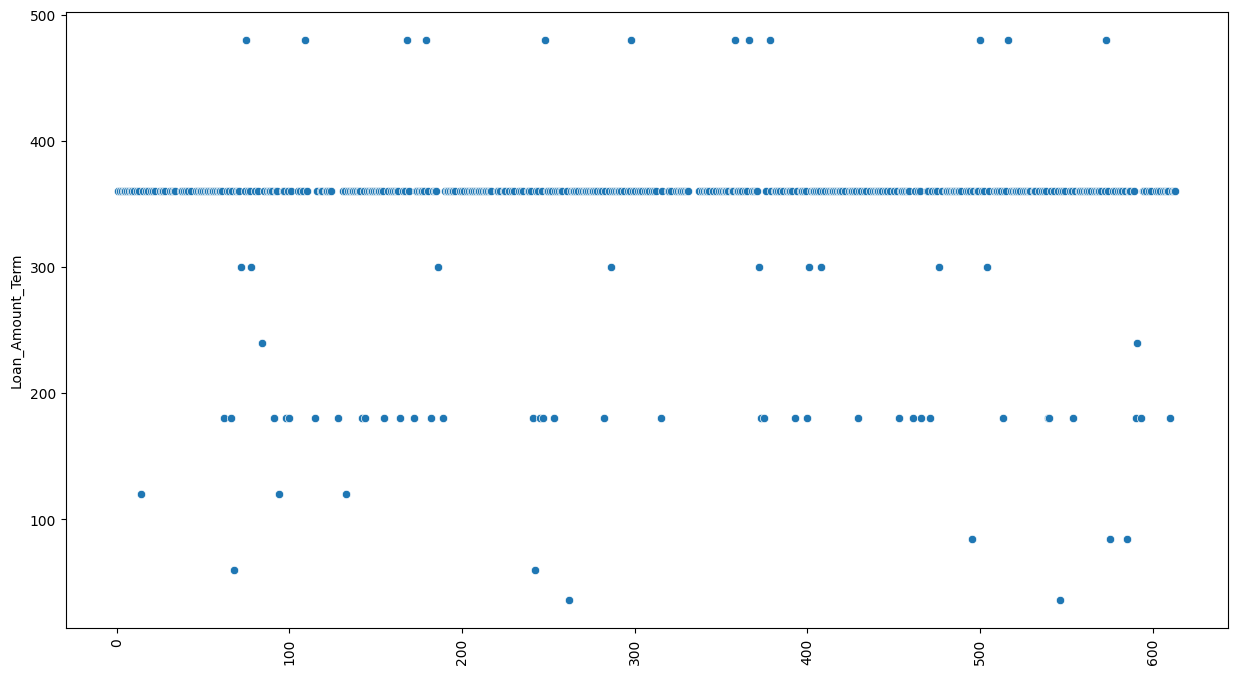

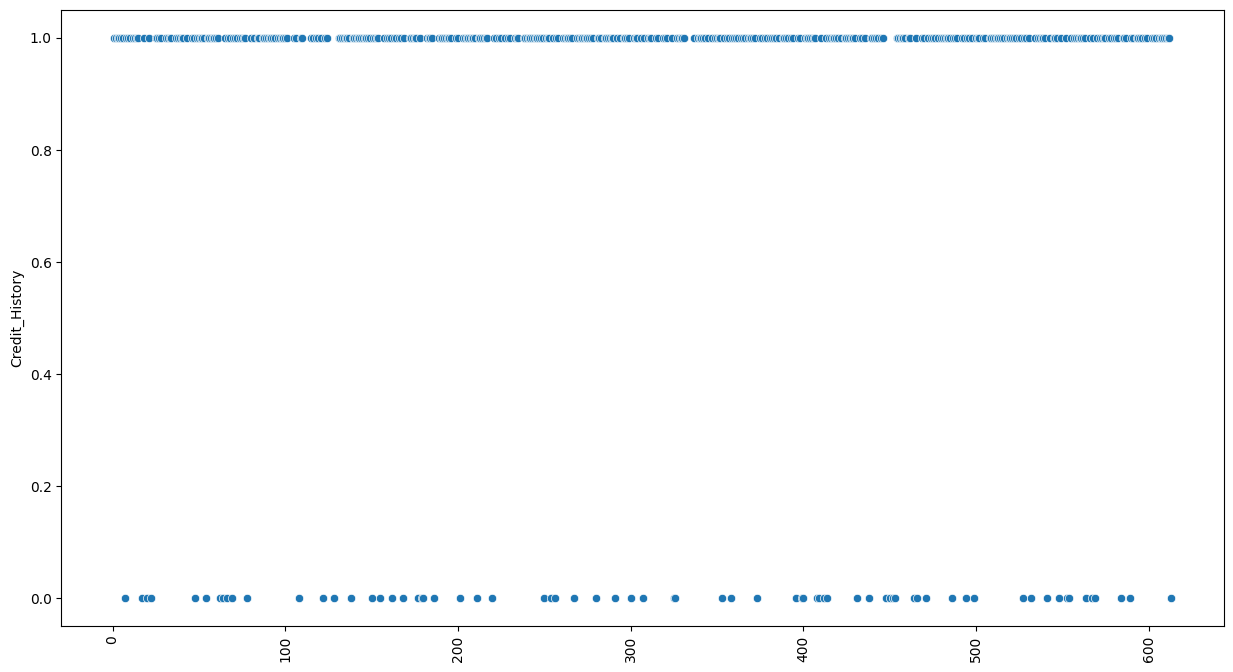

In [226]:
# Scatterplot

for i in cont_columns:
    f= plt.figure(figsize=(15,8))
    ax = sns.scatterplot(x=df.index,y=i,data=df)
    plt.xticks(rotation=90)
    plt.show()

In [227]:
cont_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [228]:
cat_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [229]:
# Lineplots

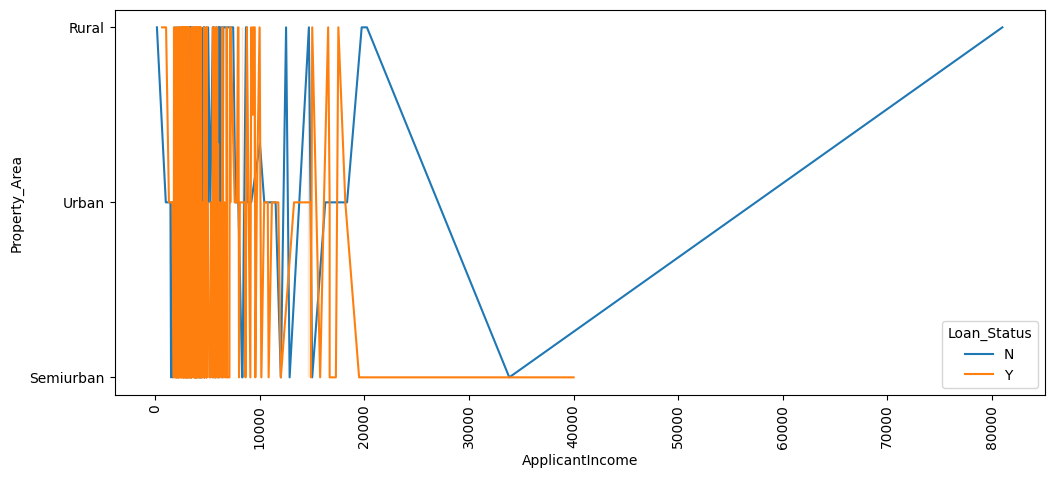

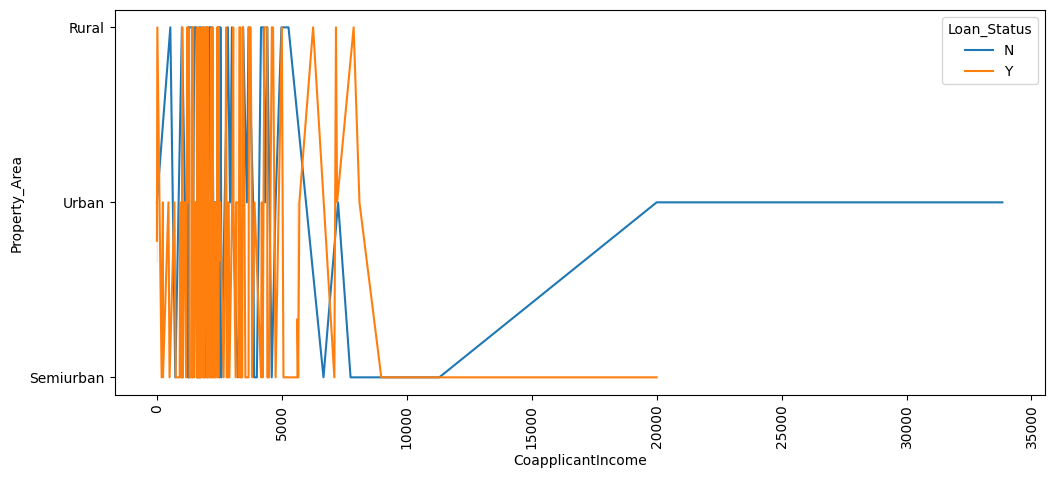

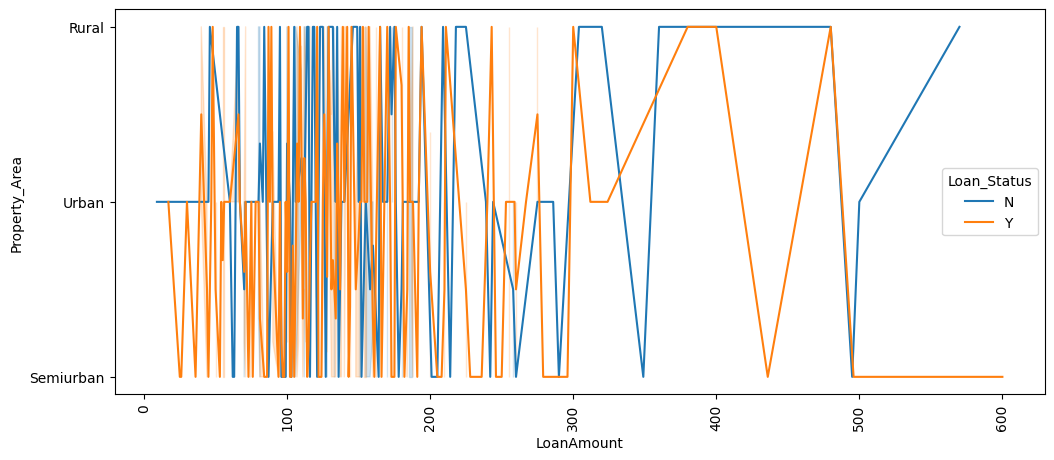

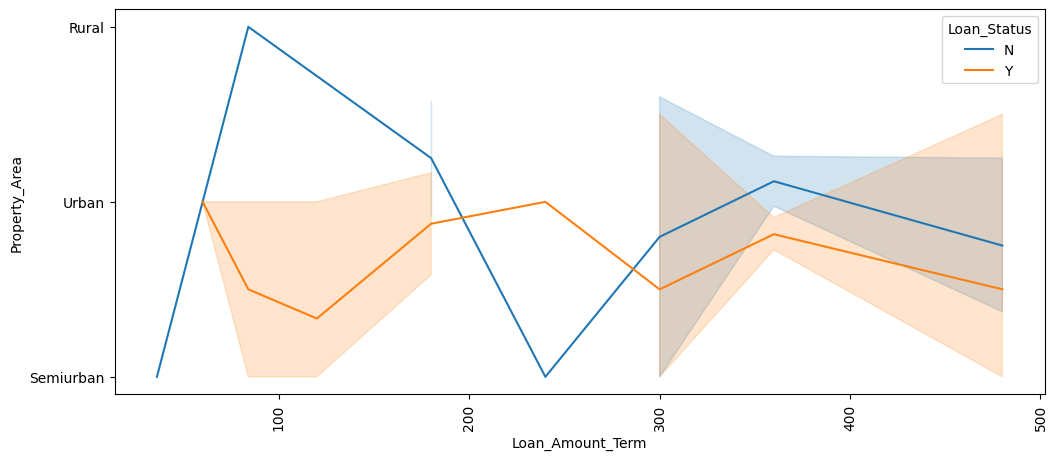

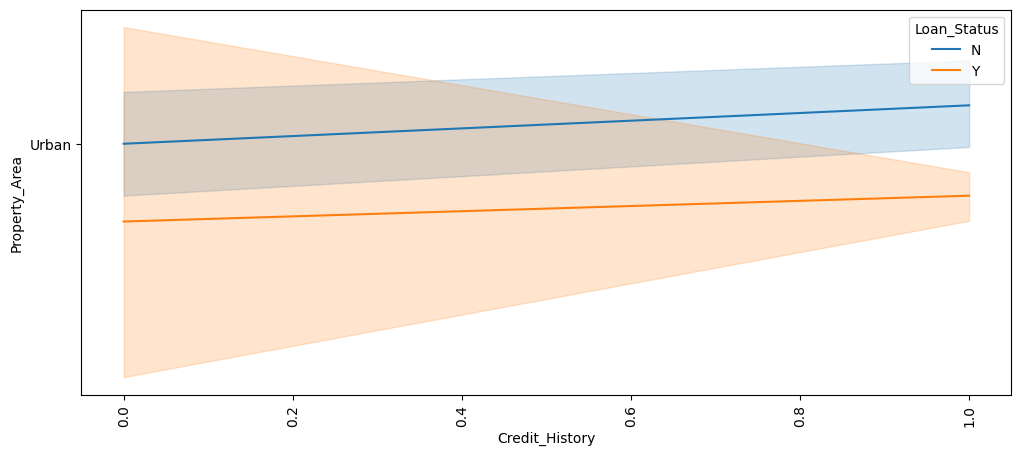

In [230]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Property_Area',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

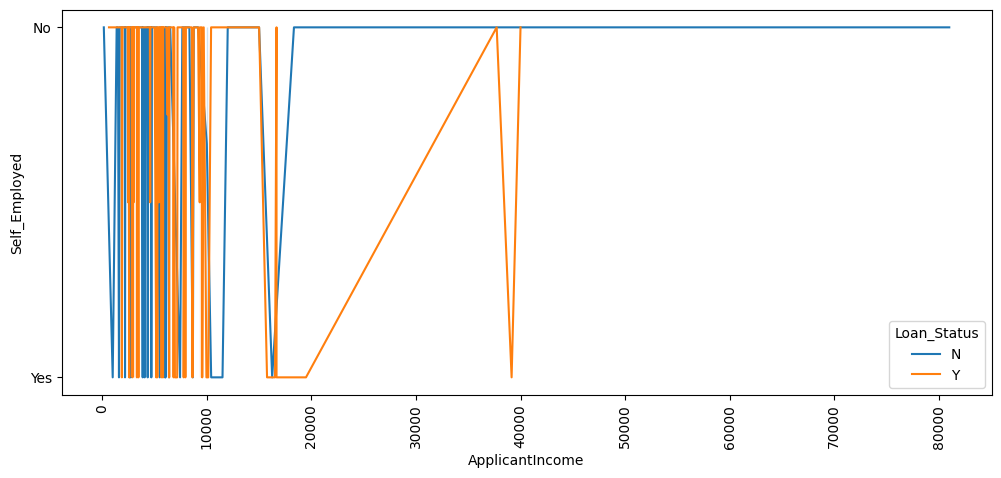

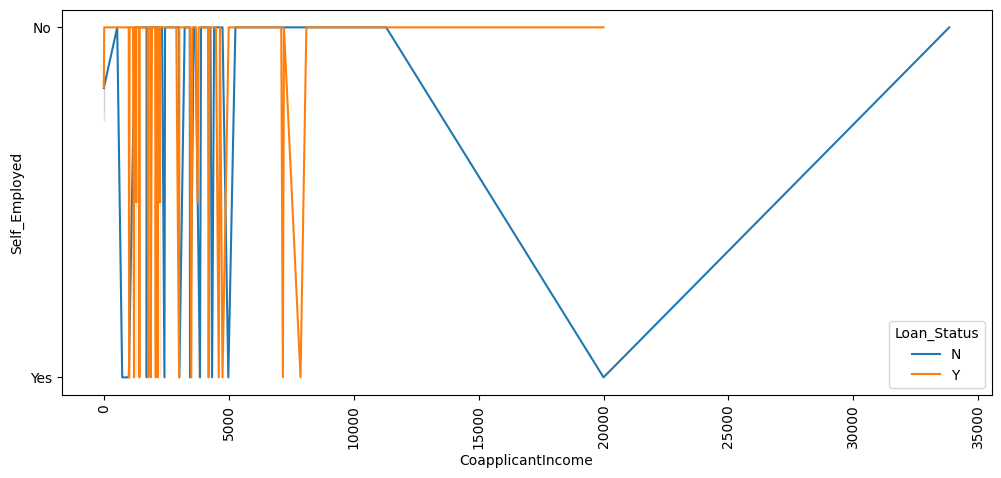

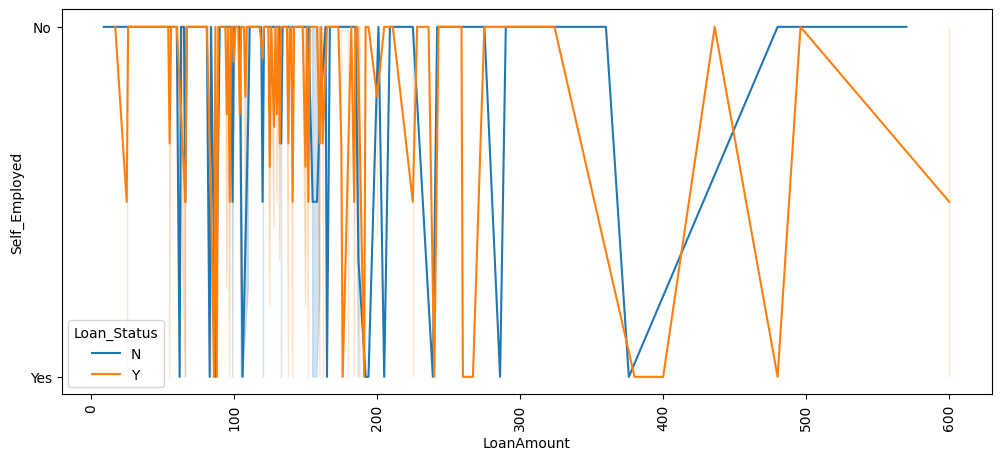

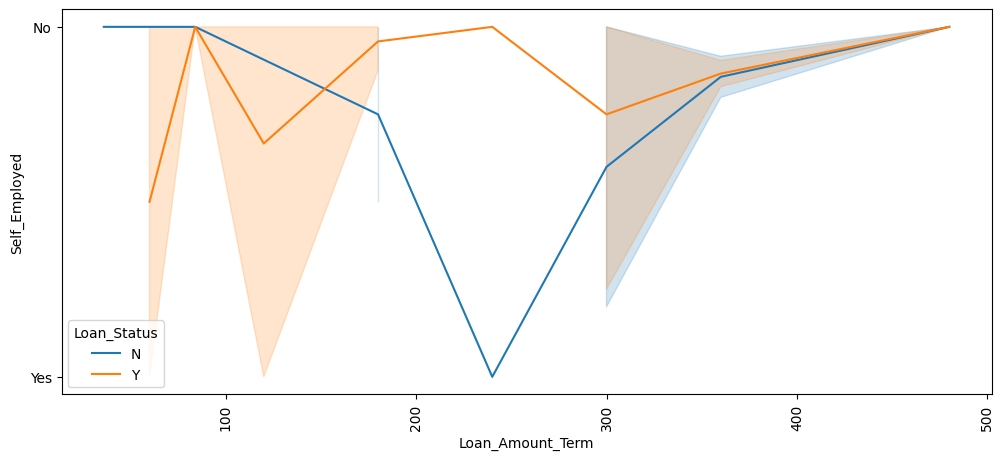

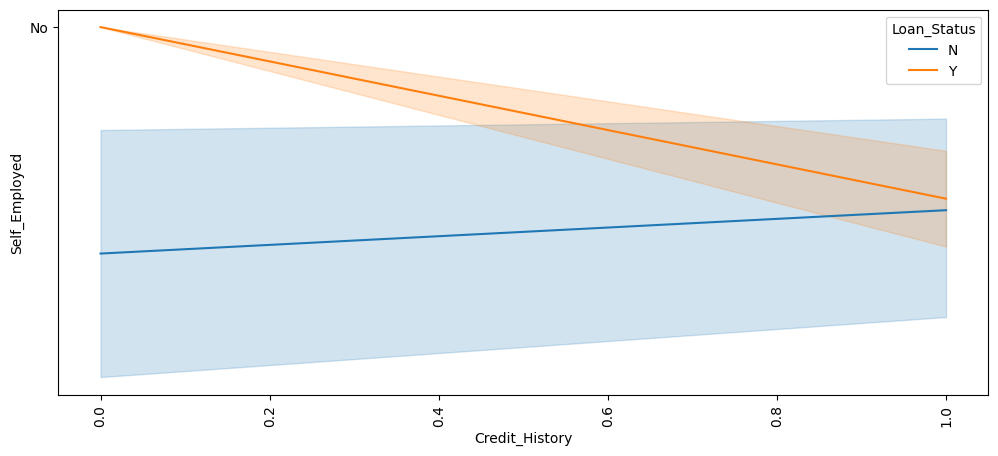

In [231]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Self_Employed',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

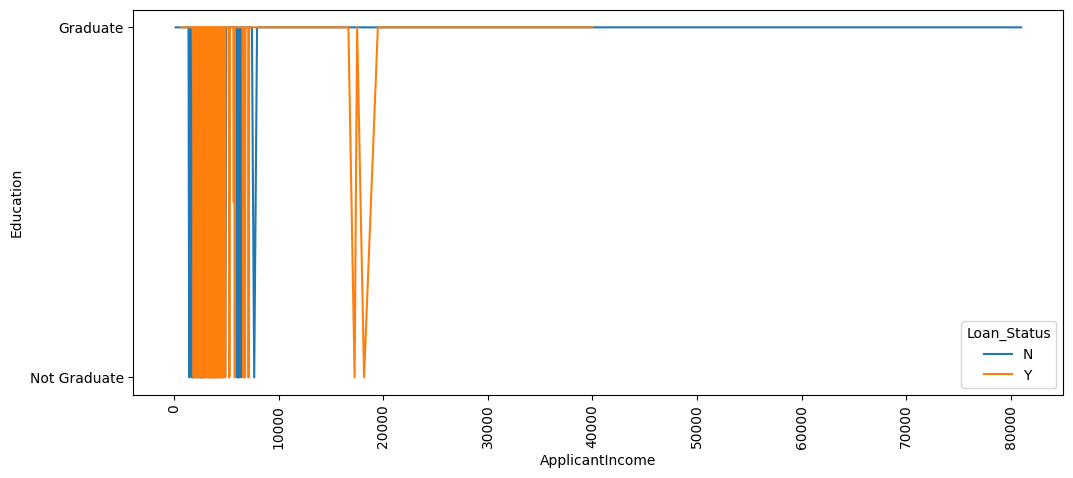

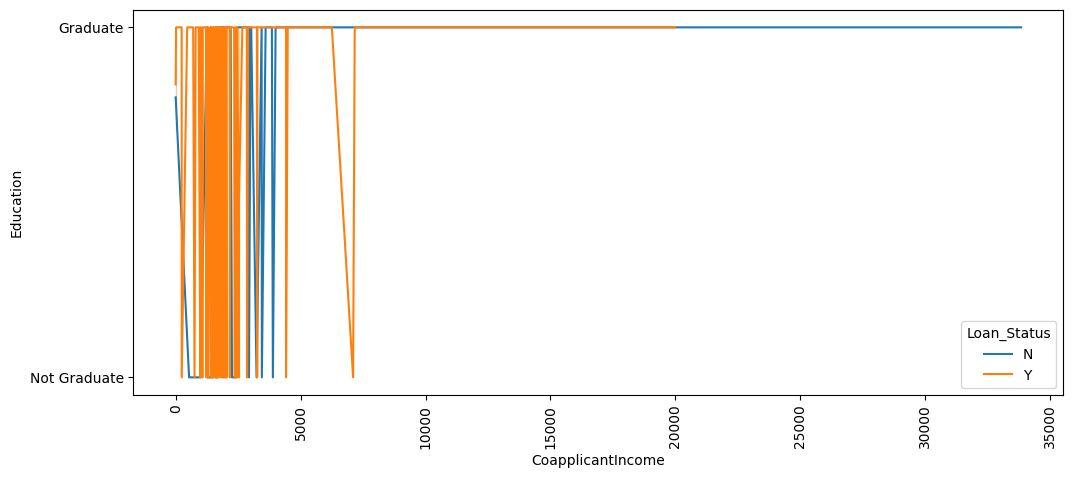

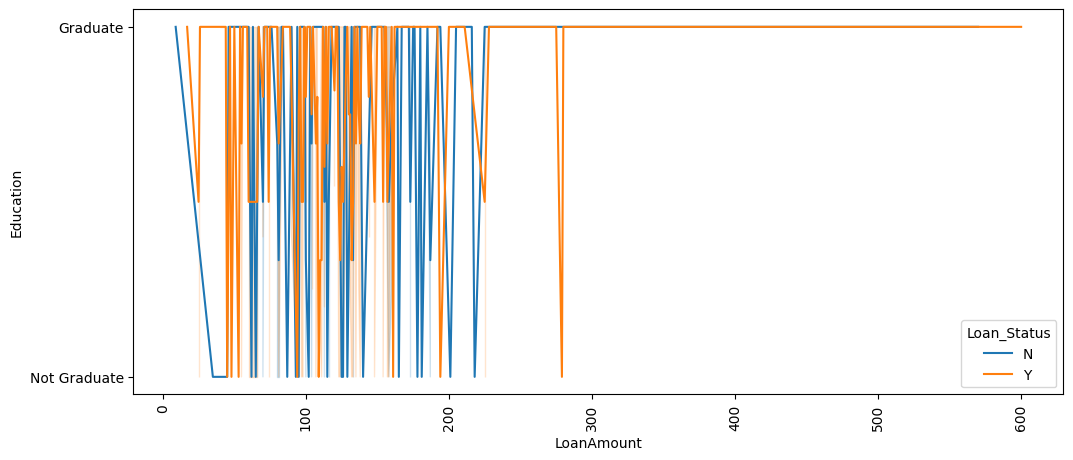

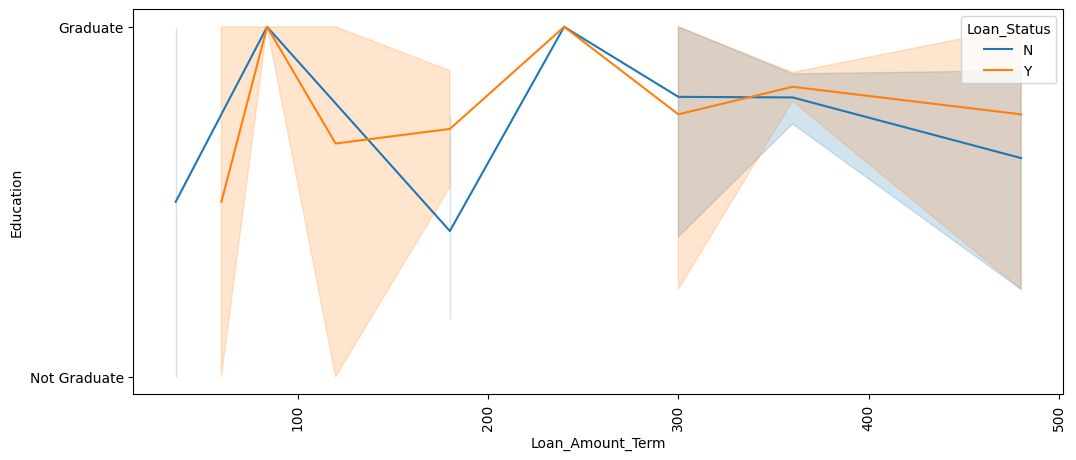

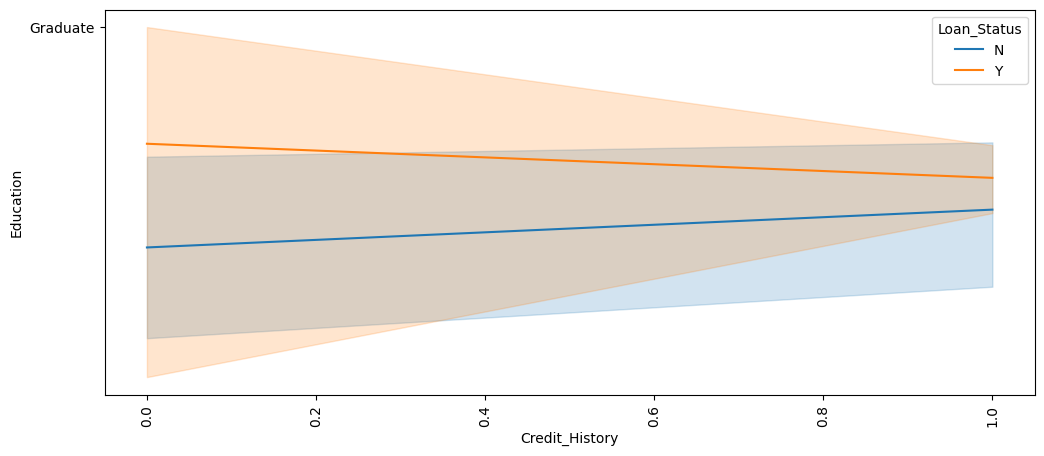

In [232]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Education',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

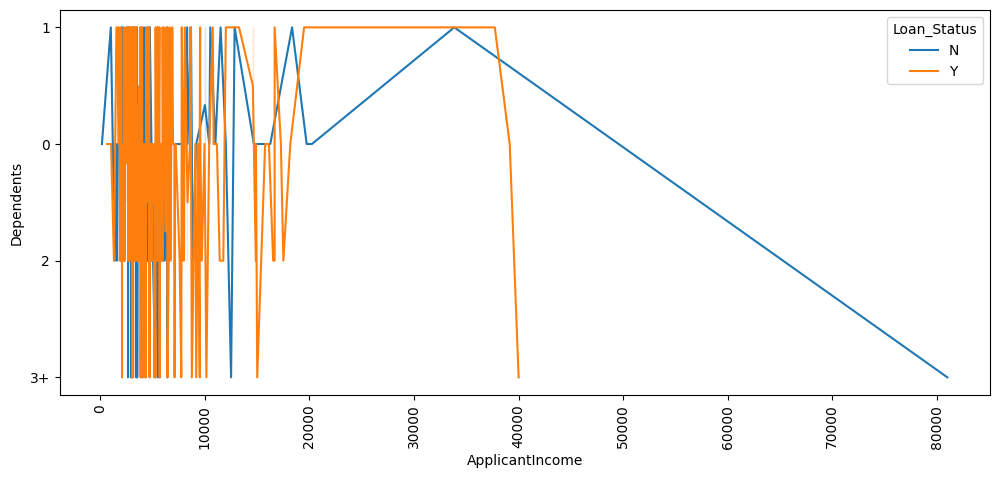

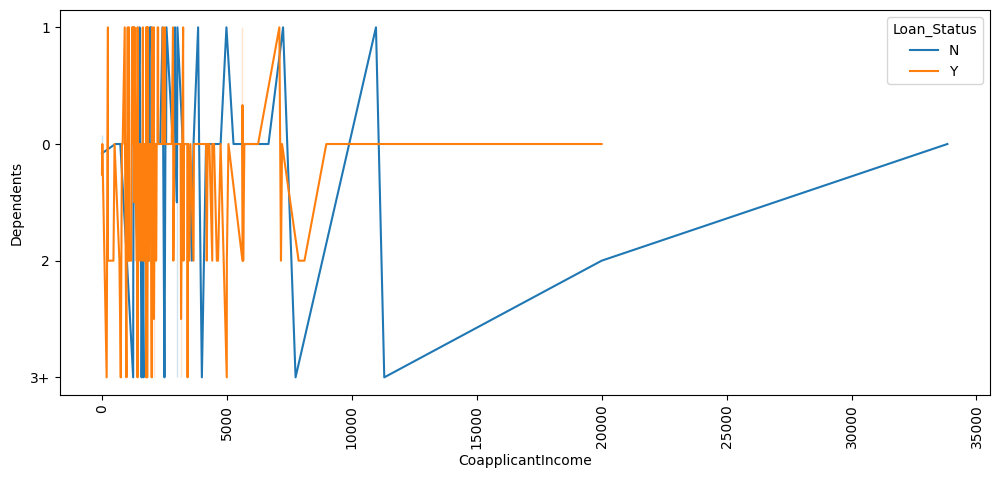

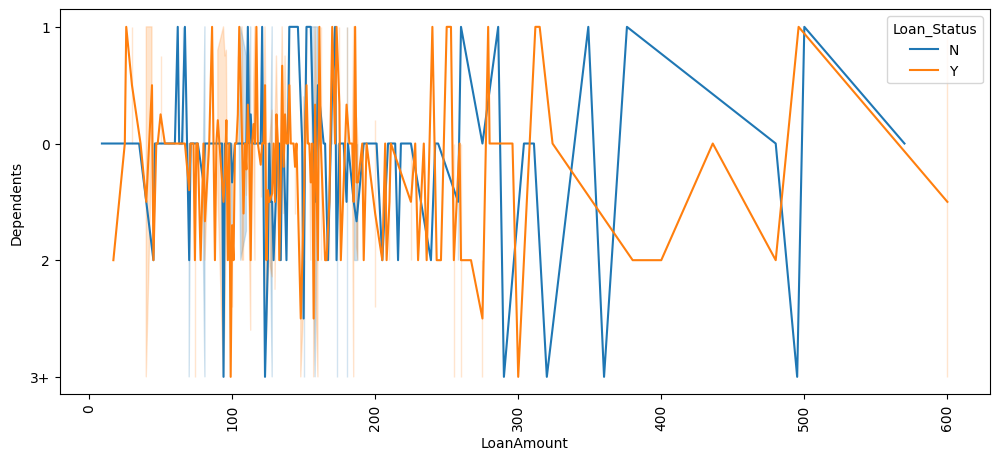

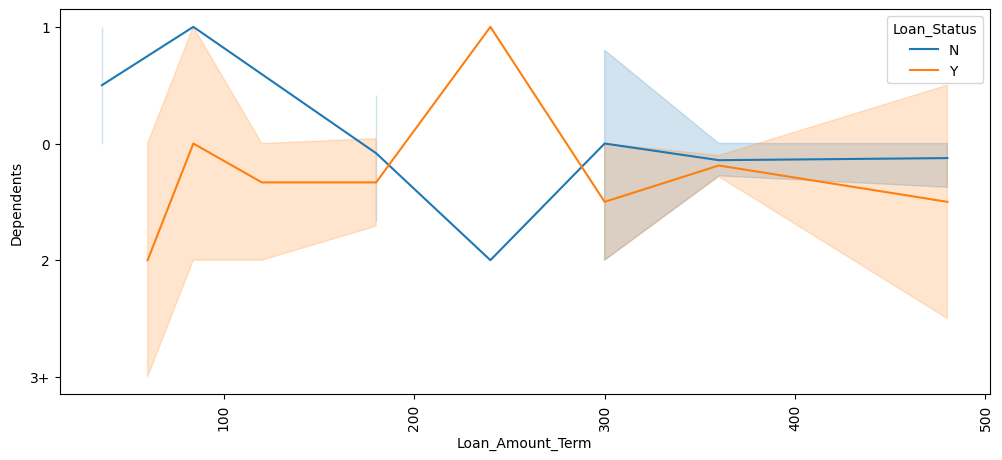

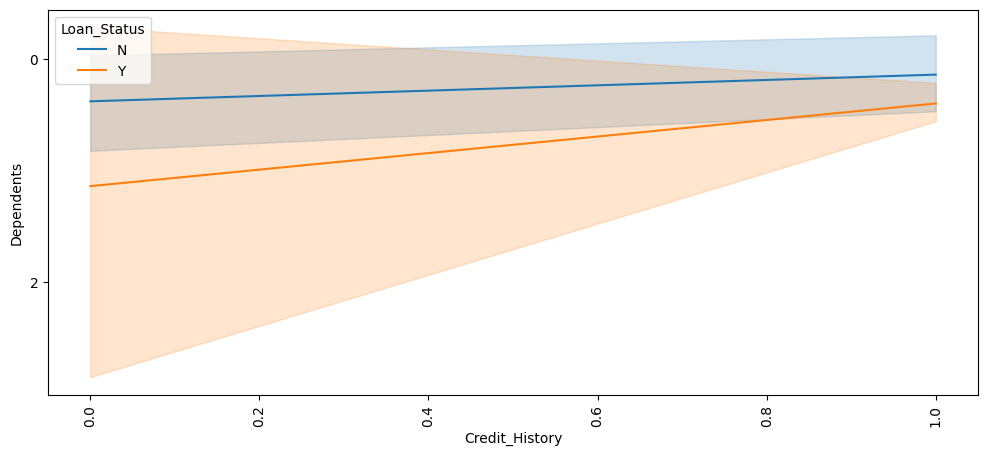

In [233]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Dependents',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

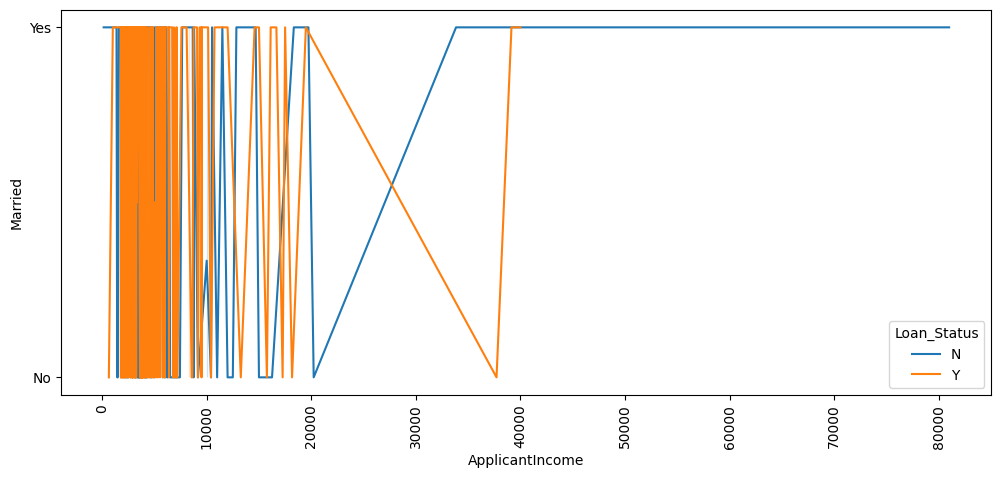

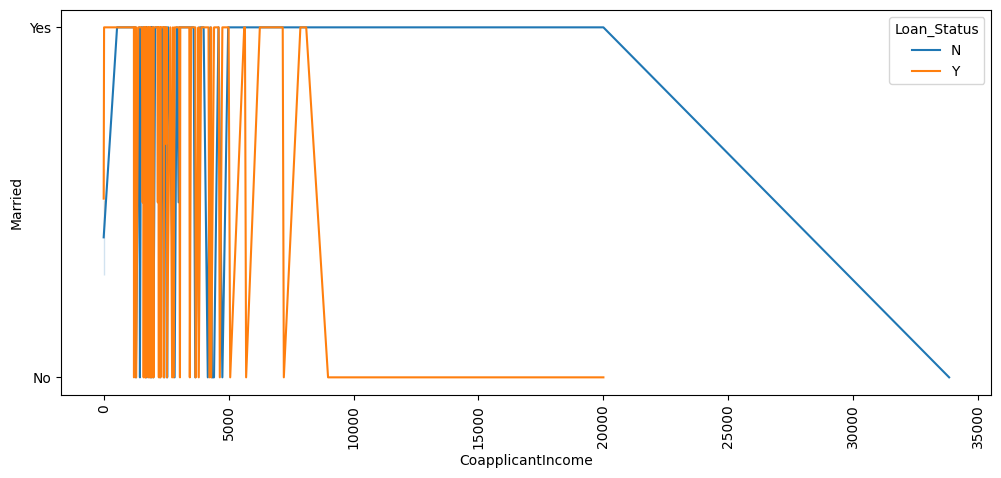

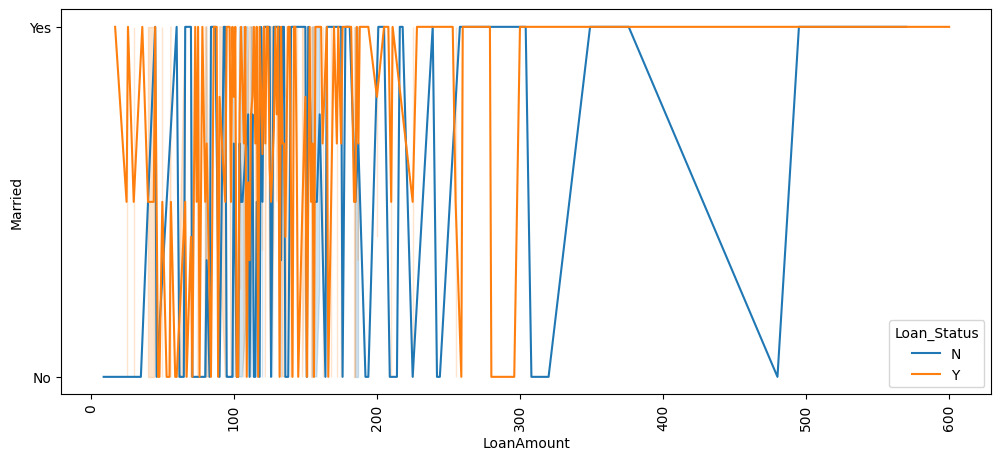

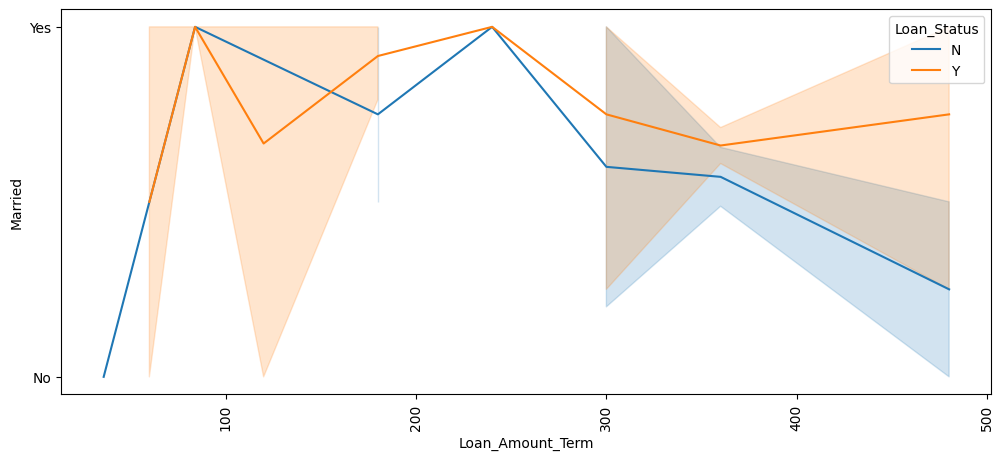

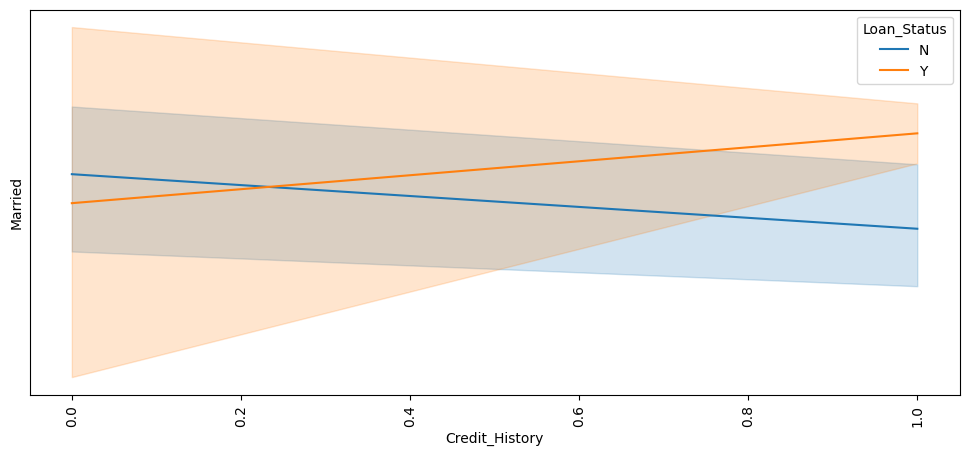

In [234]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Married',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

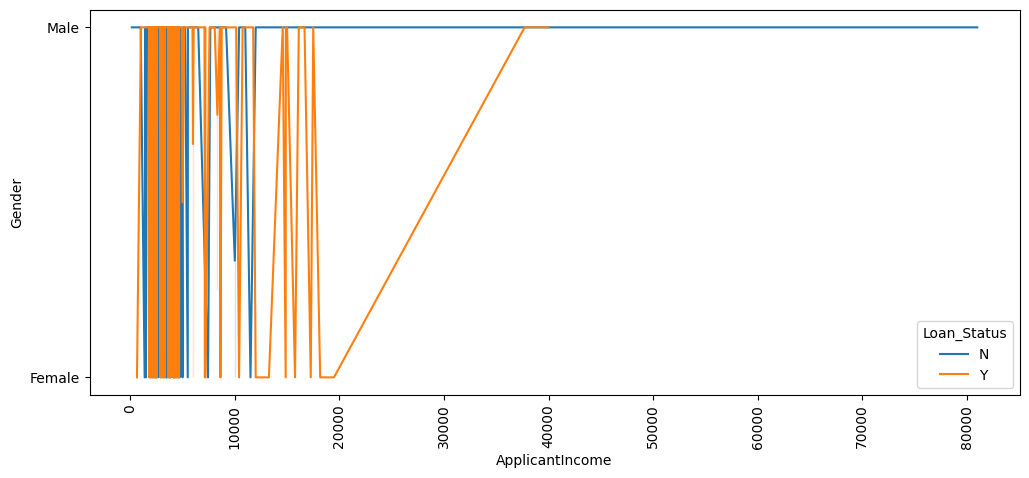

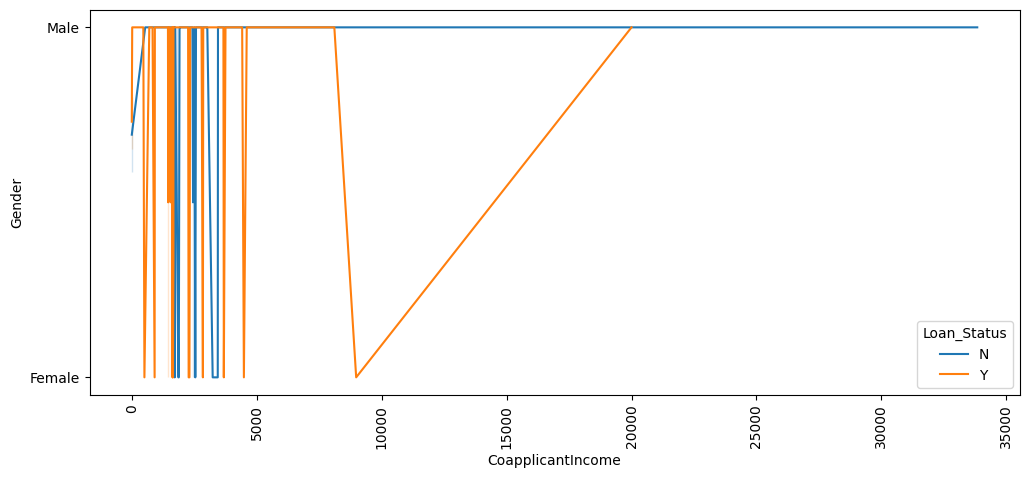

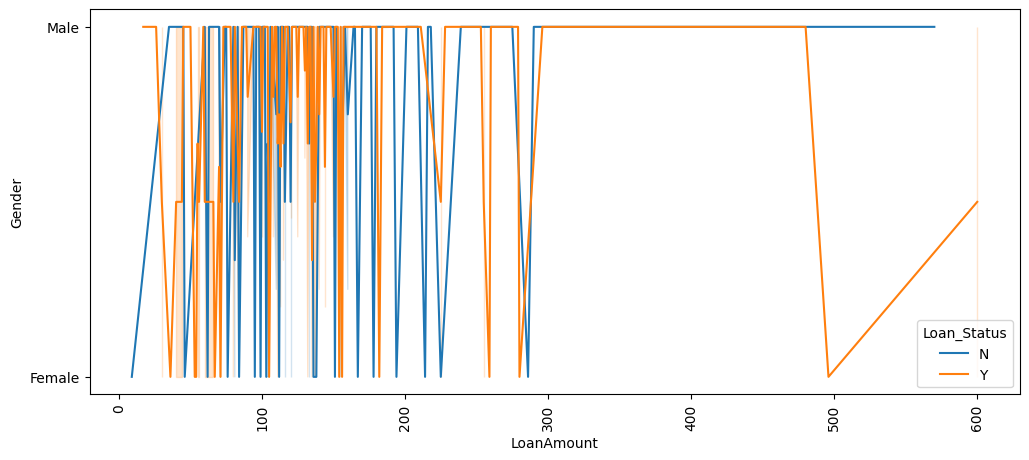

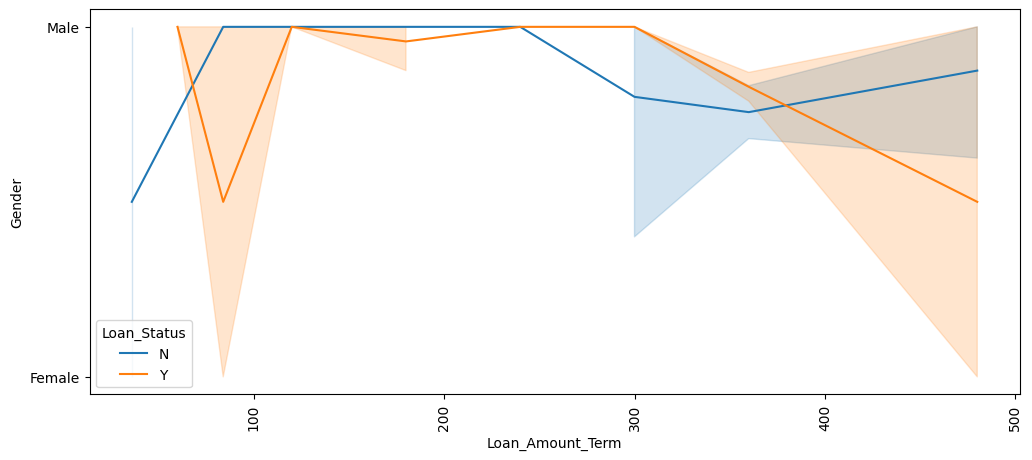

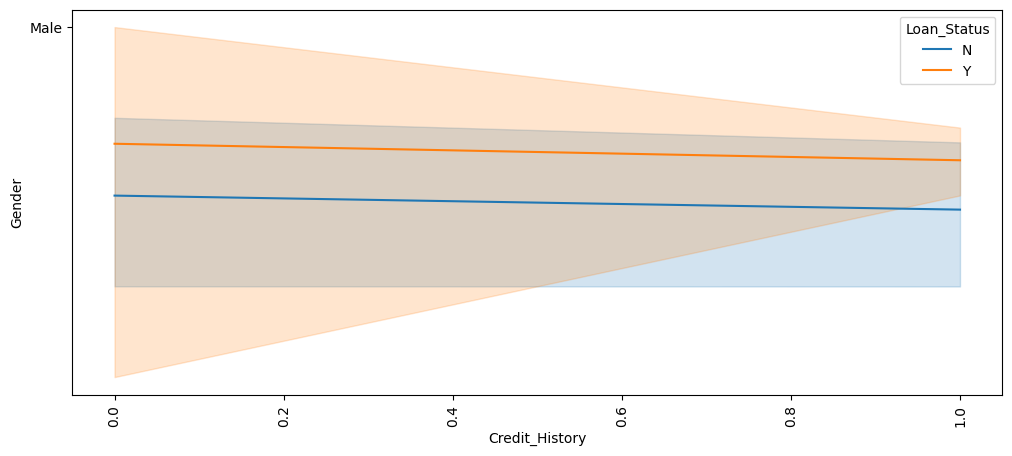

In [235]:
# Lineplot

for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Gender',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

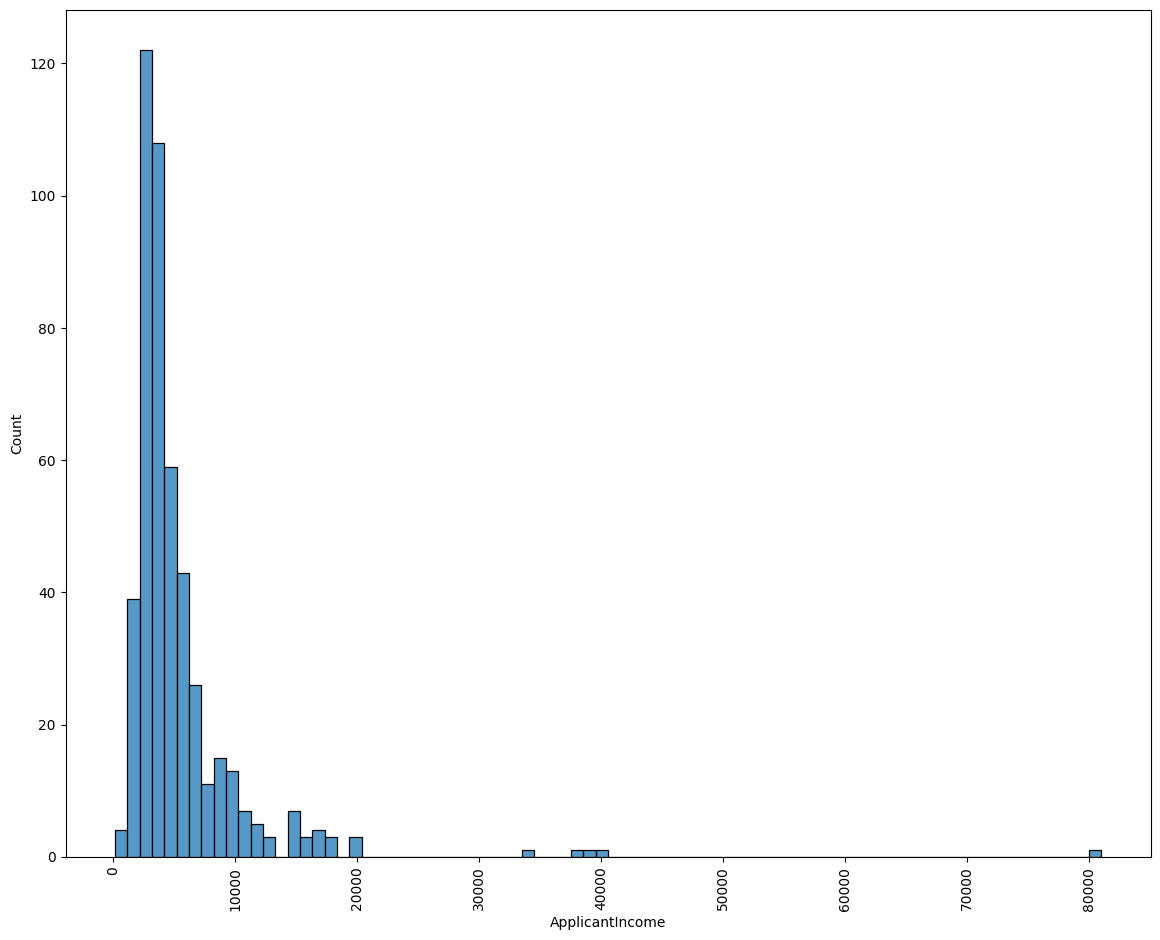

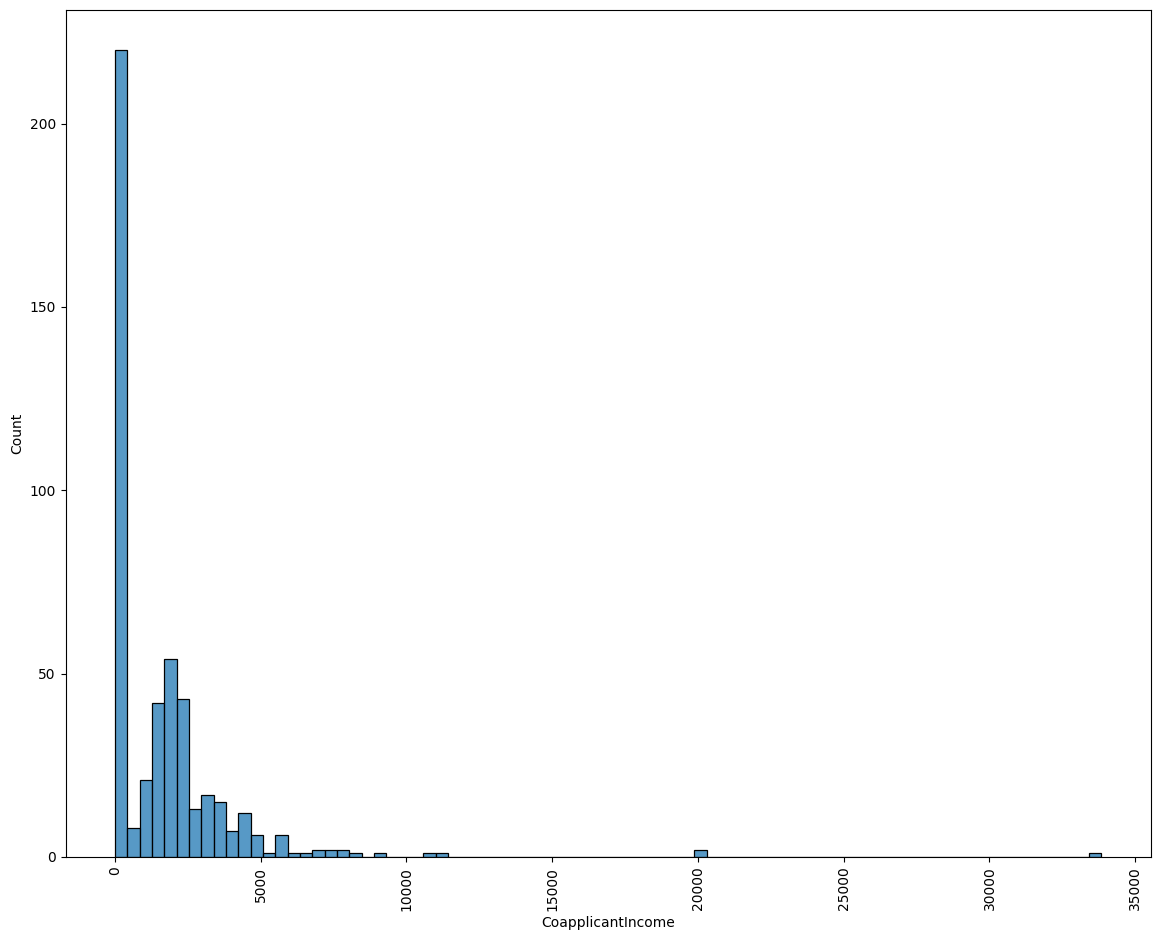

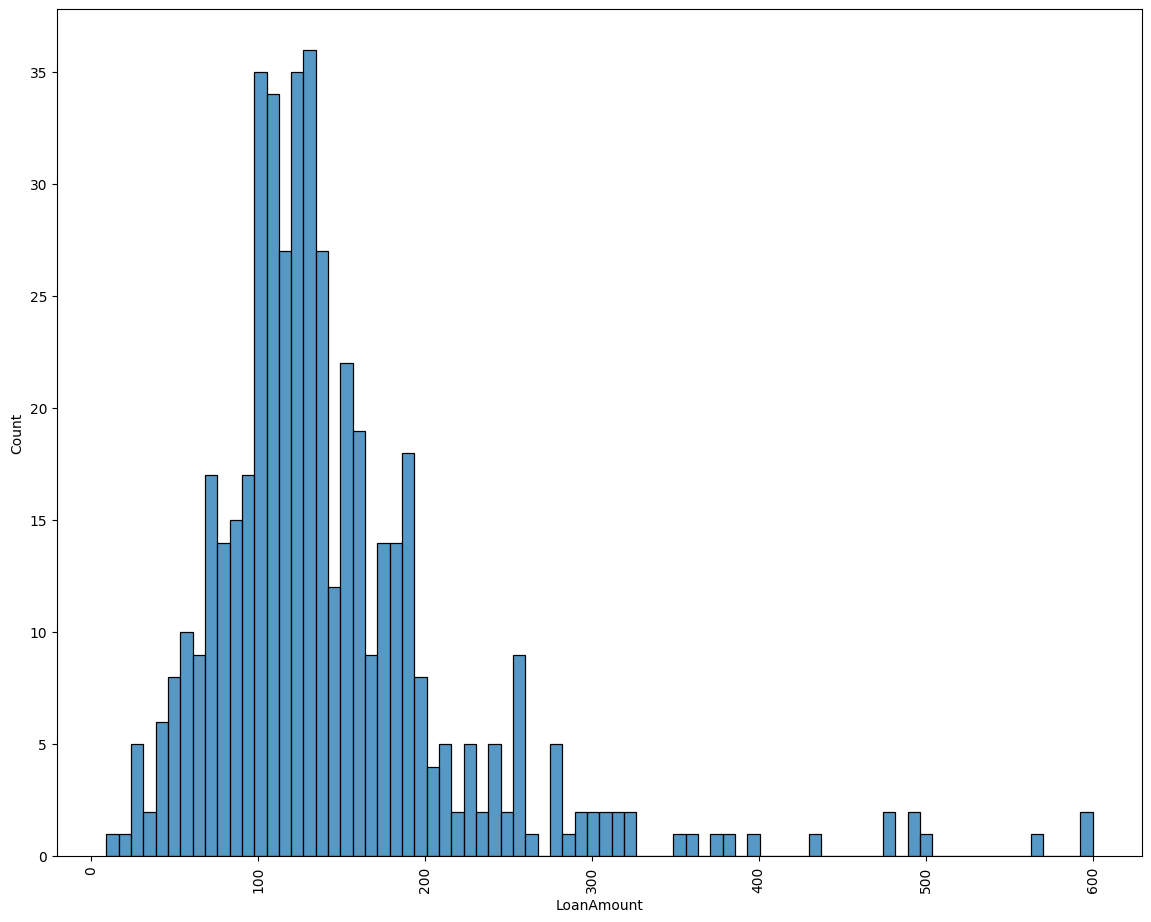

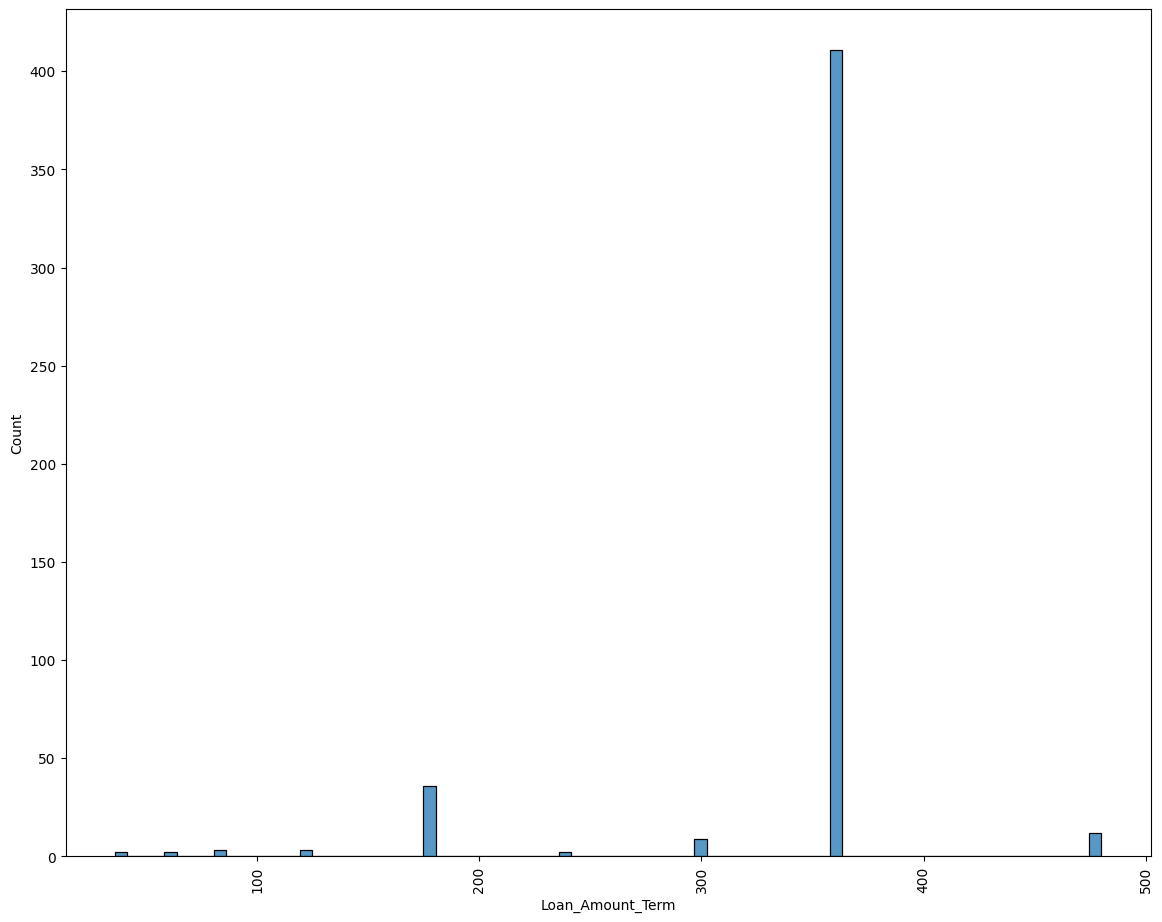

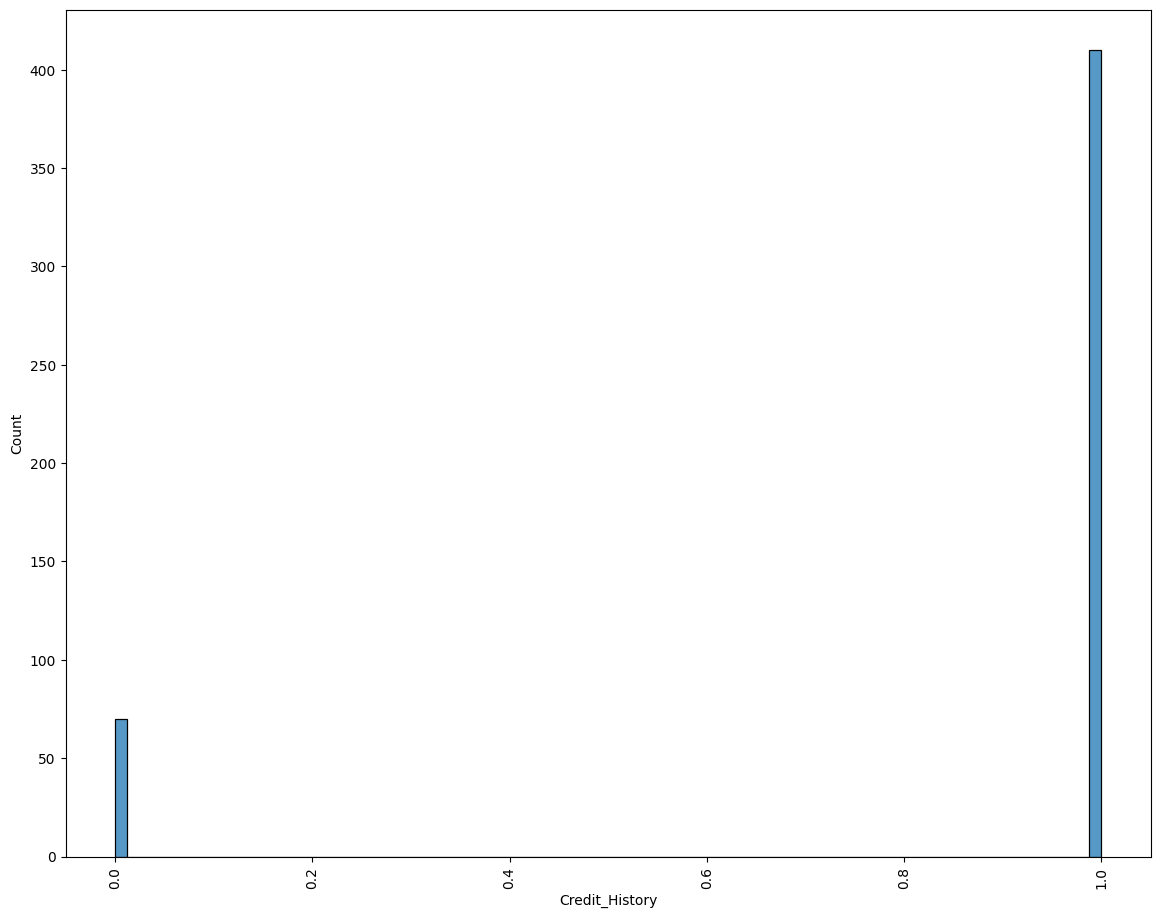

In [236]:
# Histplot:

for i in cont_columns:
    f= plt.figure(figsize=(14,11))
    ax = sns.histplot(x=df[i],data=df,bins=80)
    plt.xticks(rotation=90)

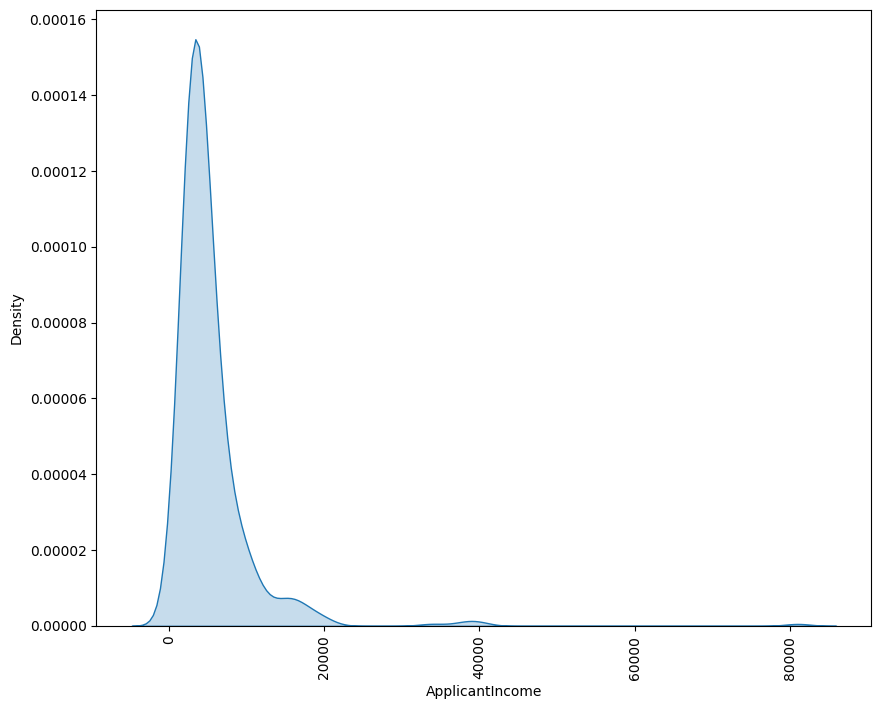

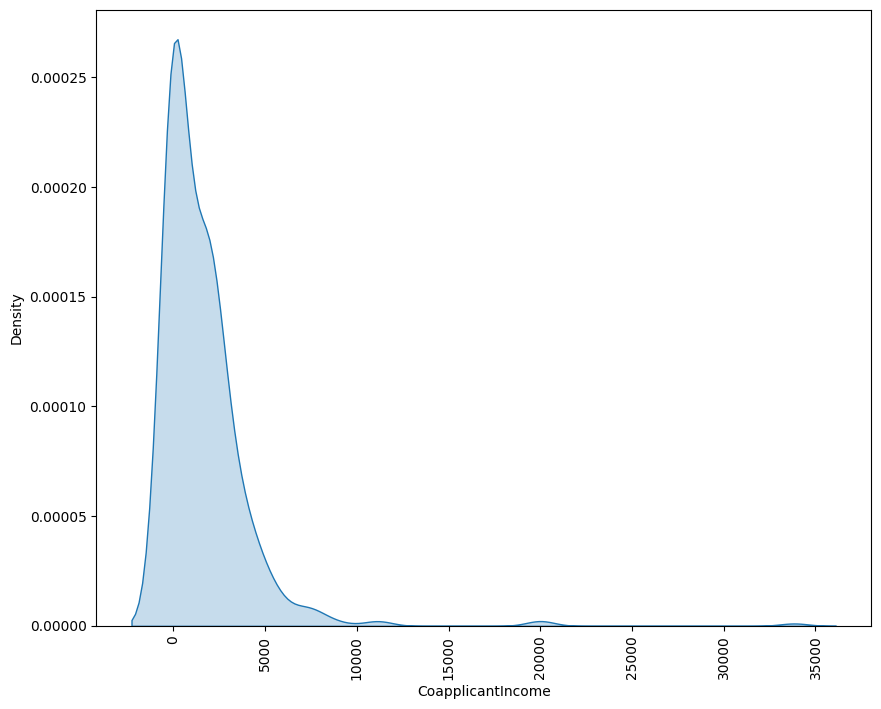

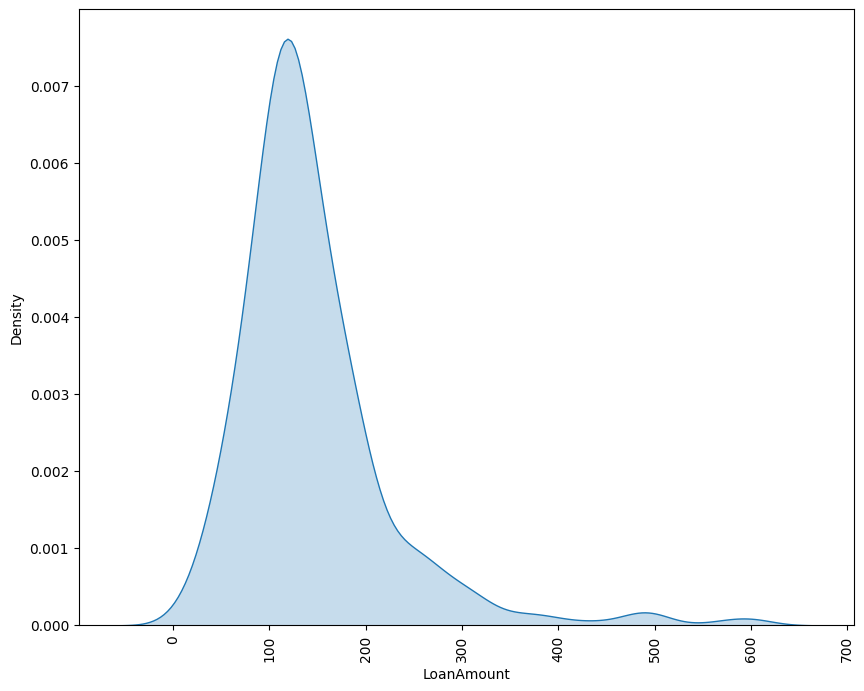

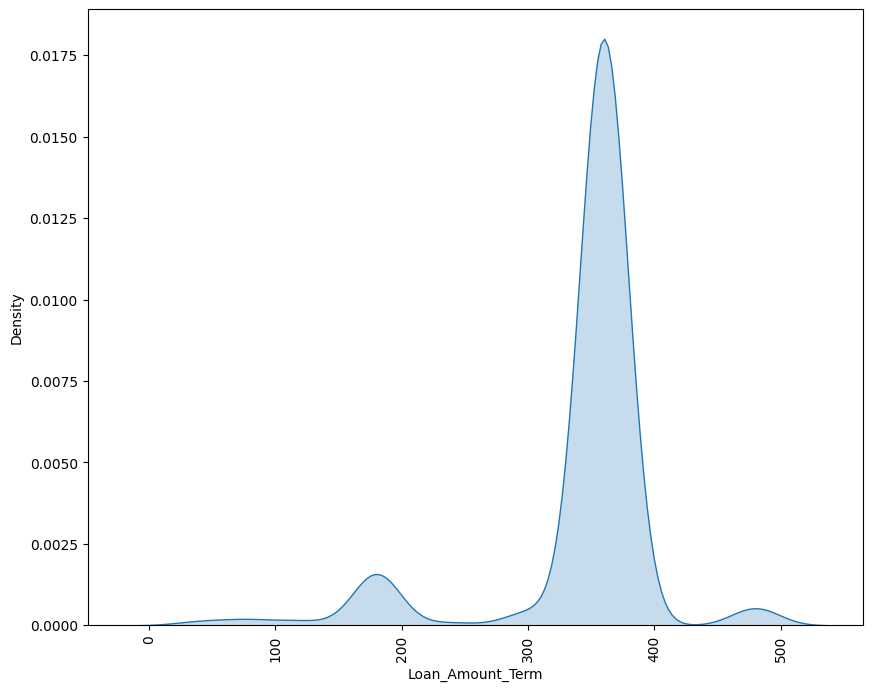

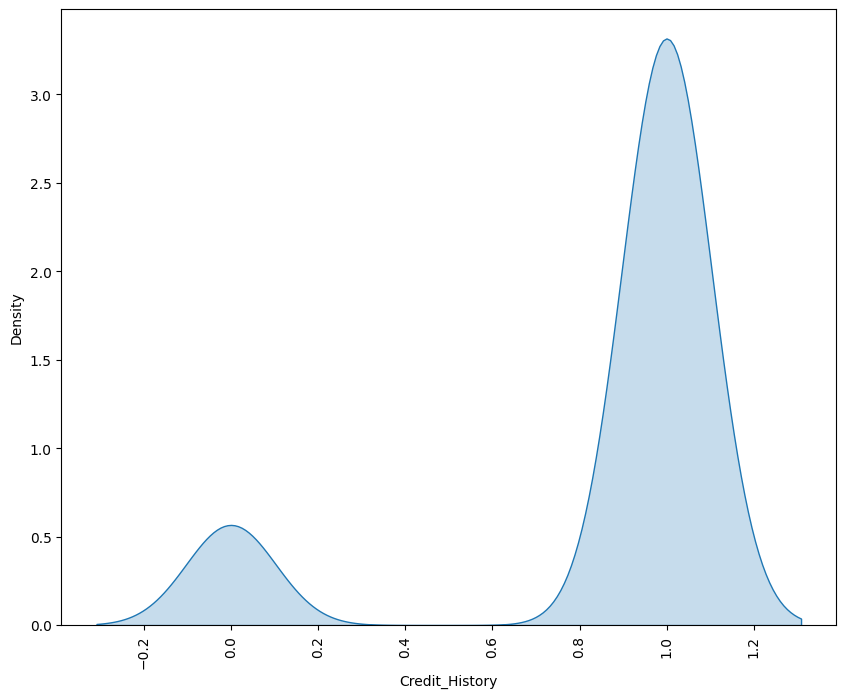

In [237]:
# DEnsity plot

for i in cont_columns:
    f= plt.figure(figsize=(10,8))
    ax = sns.kdeplot(x=df[i],data=df,shade=True)
    plt.xticks(rotation=90)

In [238]:
cont_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [239]:
cat_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Figure size 1200x500 with 0 Axes>

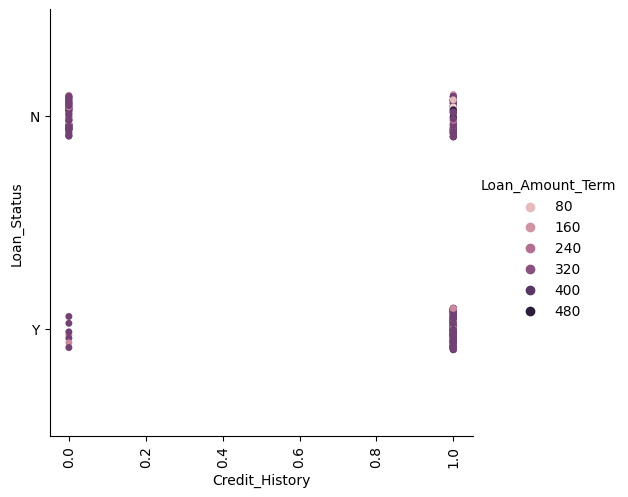

In [240]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Credit_History',y='Loan_Status',data=df,hue='Loan_Amount_Term')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

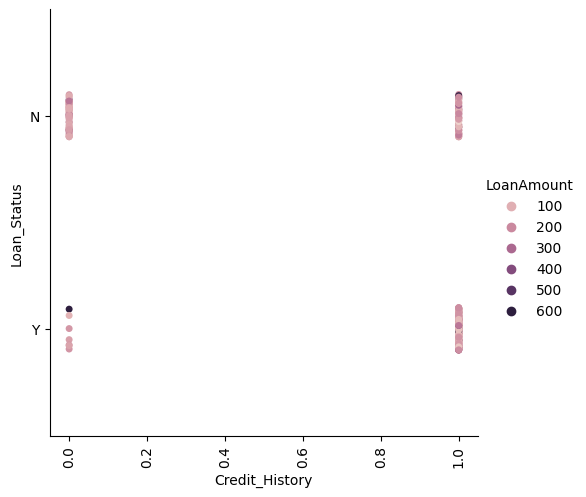

In [241]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Credit_History',y='Loan_Status',data=df,hue='LoanAmount')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

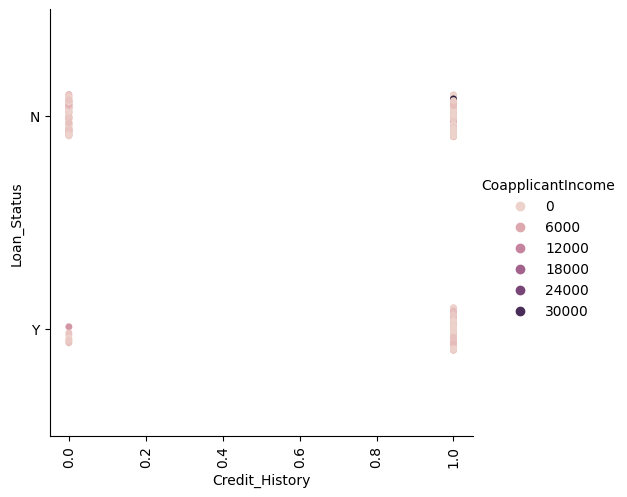

In [242]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Credit_History',y='Loan_Status',data=df,hue='CoapplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

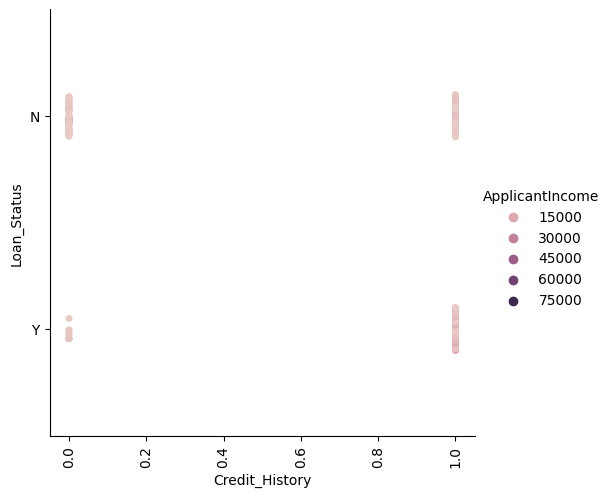

In [243]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Credit_History',y='Loan_Status',data=df,hue='ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

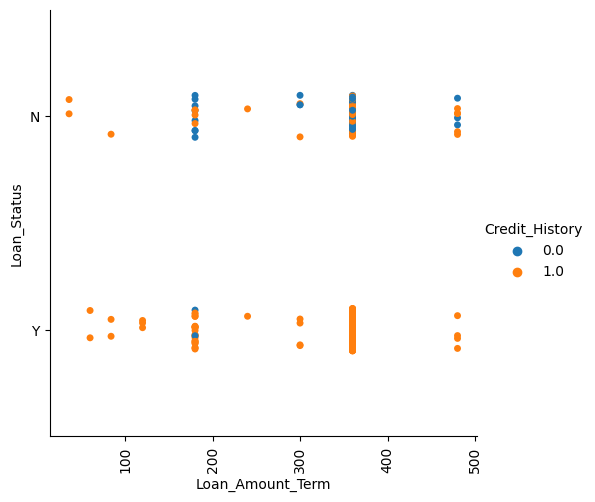

In [244]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Loan_Amount_Term',y='Loan_Status',data=df,hue='Credit_History')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

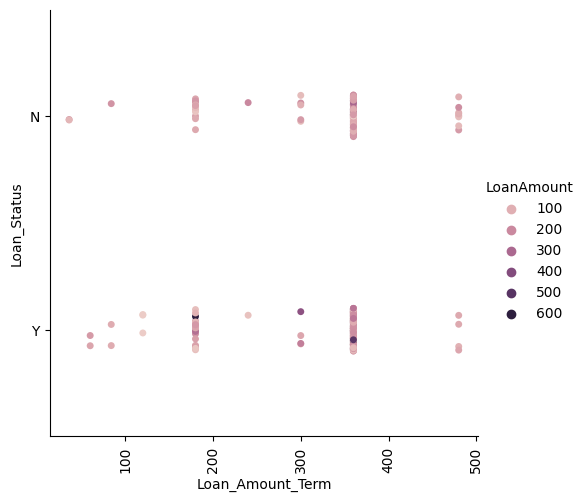

In [245]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Loan_Amount_Term',y='Loan_Status',data=df,hue='LoanAmount')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

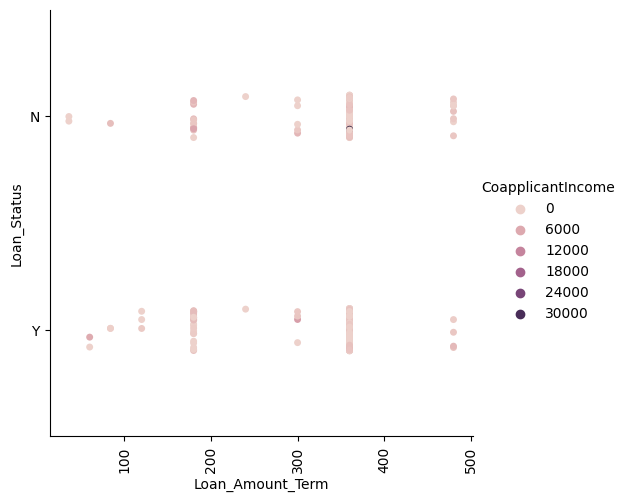

In [246]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Loan_Amount_Term',y='Loan_Status',data=df,hue='CoapplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

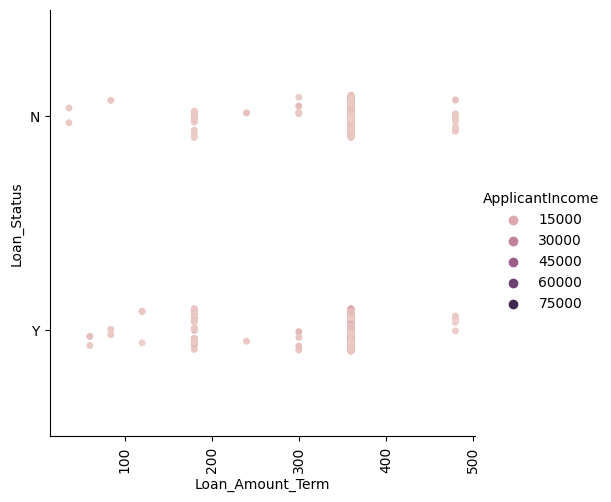

In [247]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Loan_Amount_Term',y='Loan_Status',data=df,hue='ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

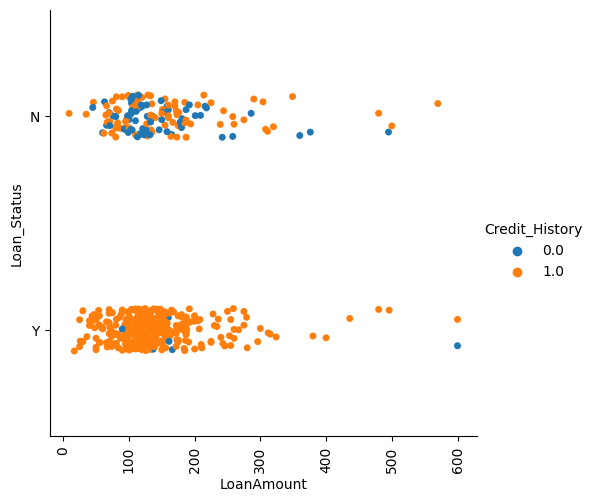

In [248]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='LoanAmount',y='Loan_Status',data=df,hue='Credit_History')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

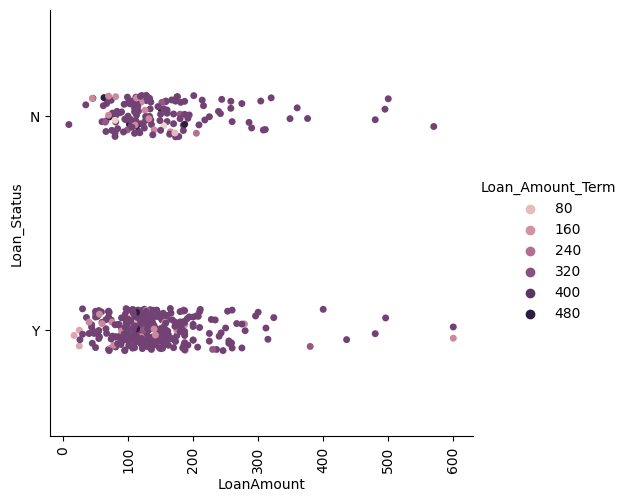

In [249]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='LoanAmount',y='Loan_Status',data=df,hue='Loan_Amount_Term')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

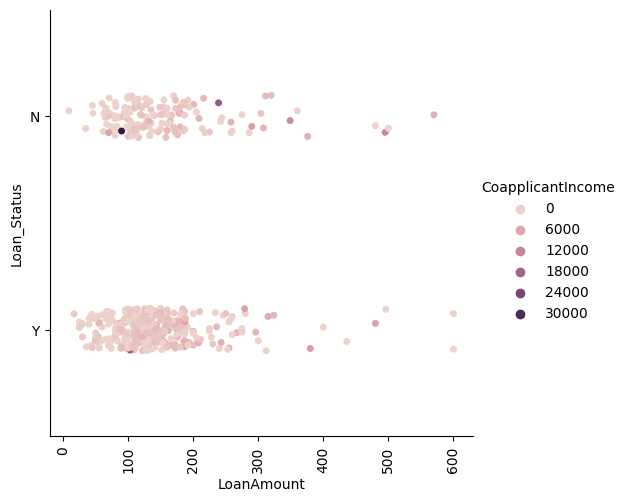

In [250]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='LoanAmount',y='Loan_Status',data=df,hue='CoapplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

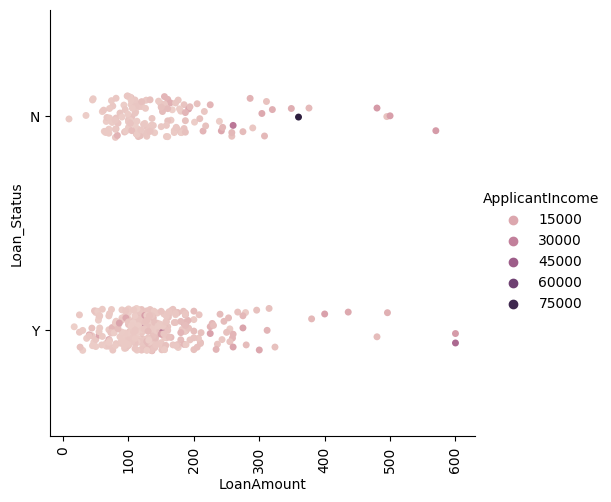

In [251]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='LoanAmount',y='Loan_Status',data=df,hue='ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

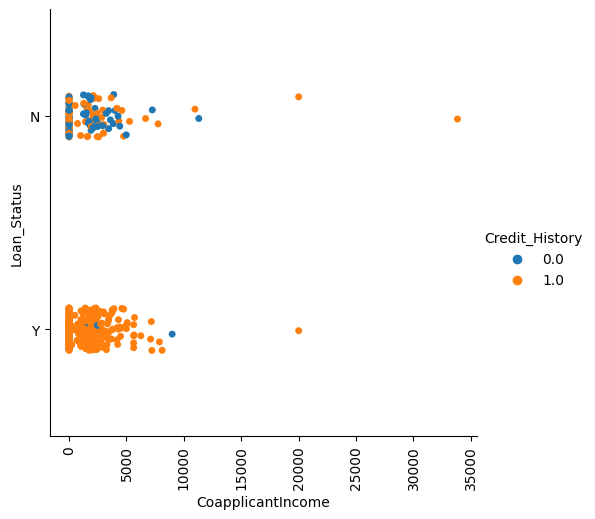

In [252]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='CoapplicantIncome',y='Loan_Status',data=df,hue='Credit_History')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

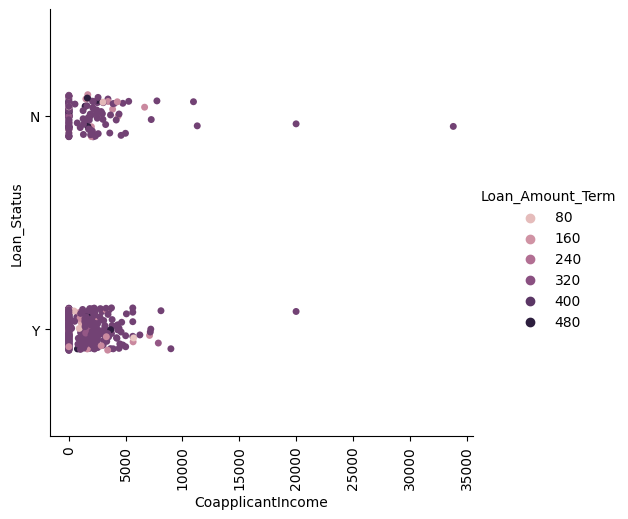

In [253]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='CoapplicantIncome',y='Loan_Status',data=df,hue='Loan_Amount_Term')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

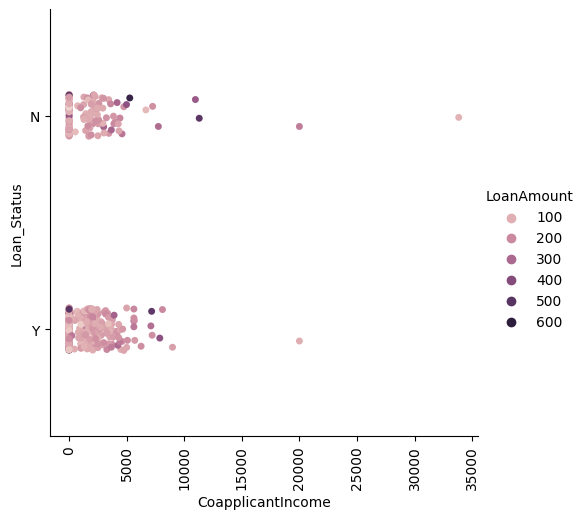

In [254]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='CoapplicantIncome',y='Loan_Status',data=df,hue='LoanAmount')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

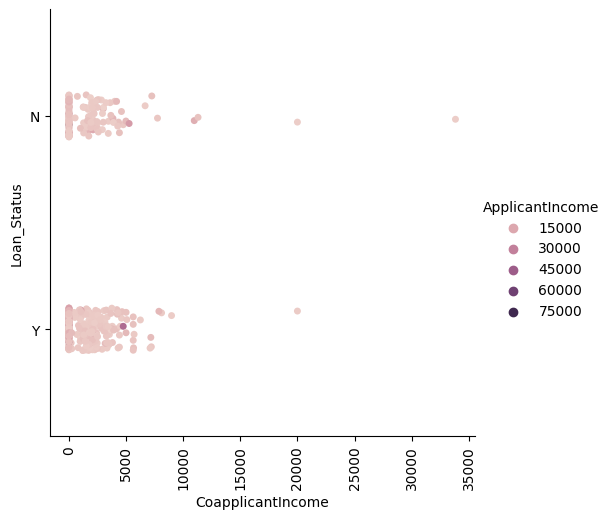

In [255]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='CoapplicantIncome',y='Loan_Status',data=df,hue='ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

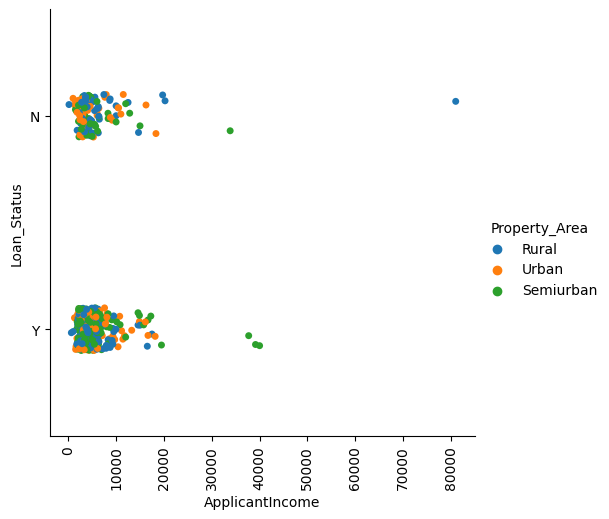

In [256]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Property_Area')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

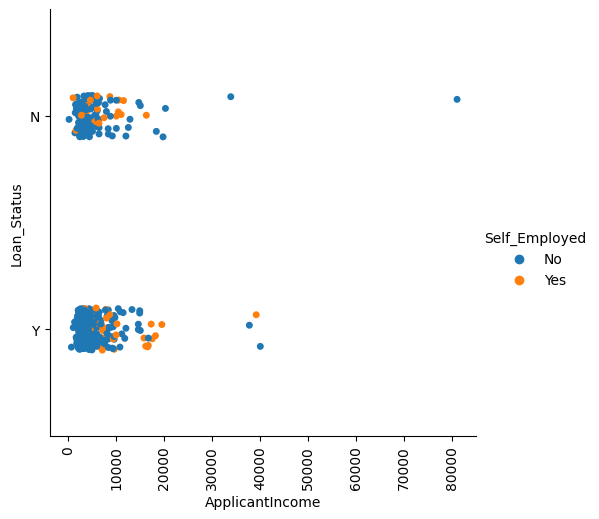

In [257]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Self_Employed')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

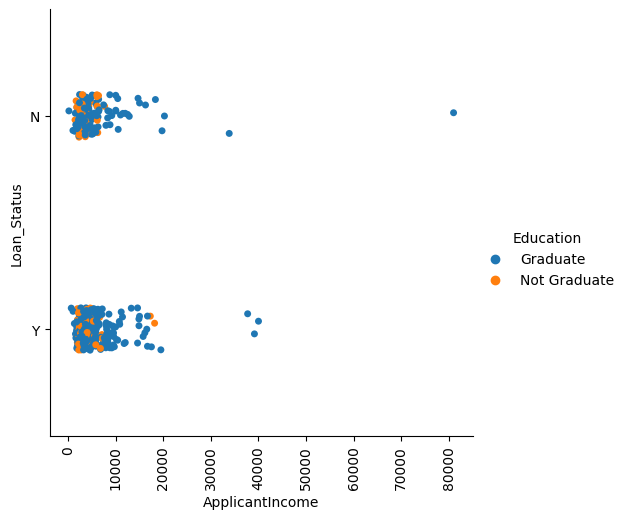

In [258]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Education')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

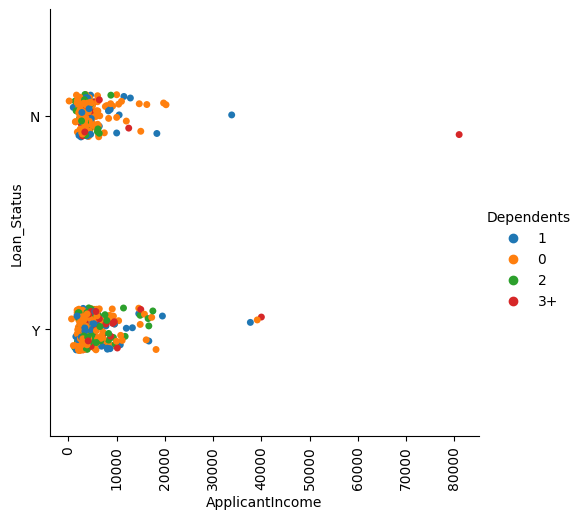

In [259]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Dependents')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

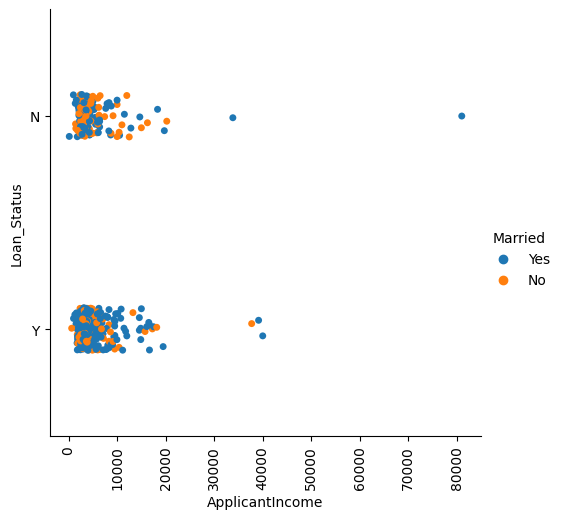

In [260]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Married')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x500 with 0 Axes>

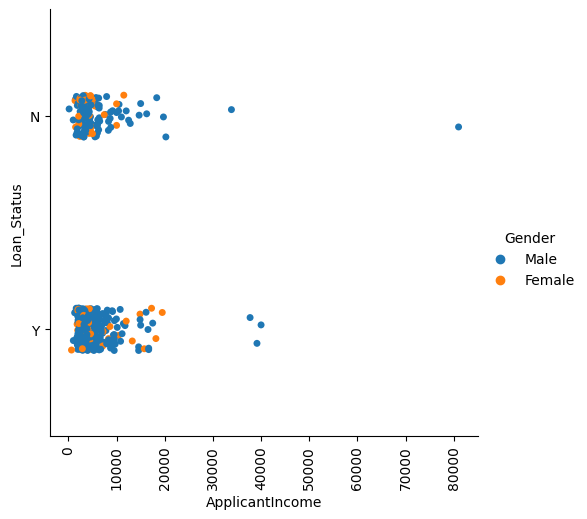

In [261]:
# Catplots

f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Gender')
plt.xticks(rotation=90)
plt.show()

In [262]:
cat_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

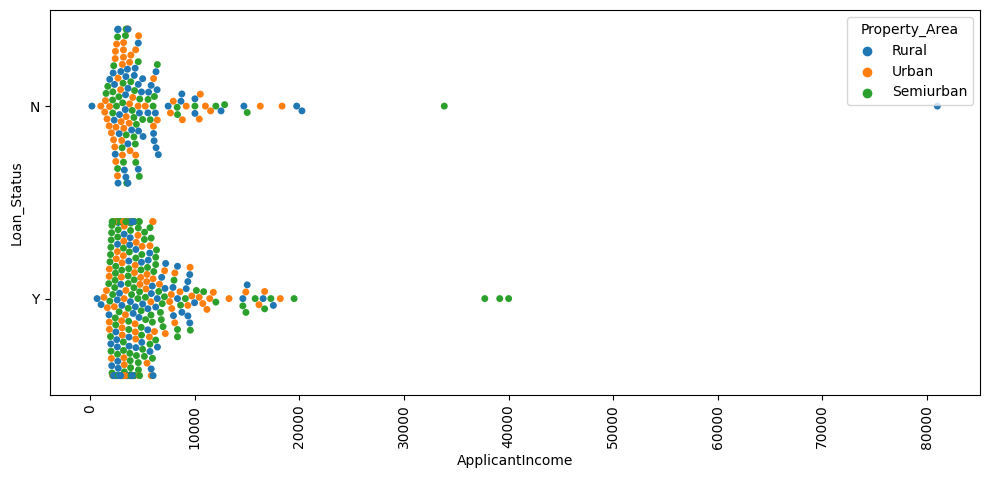

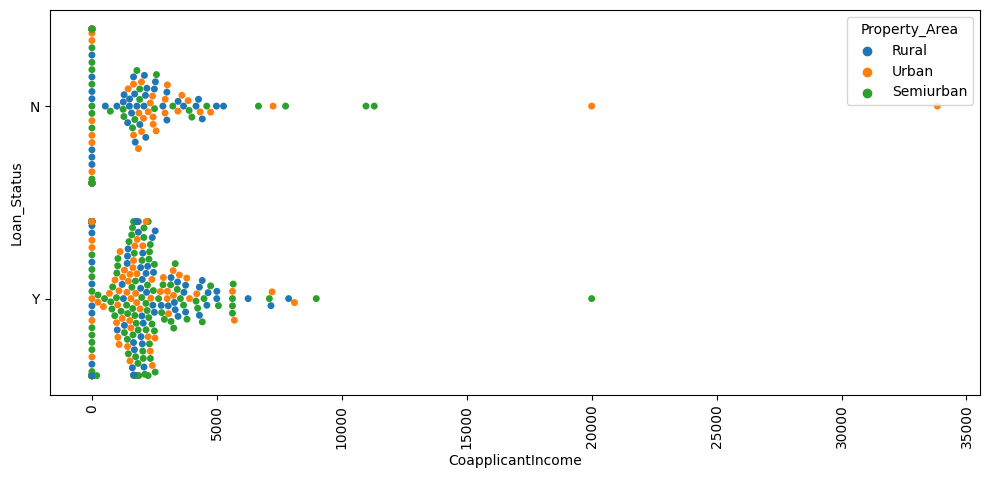

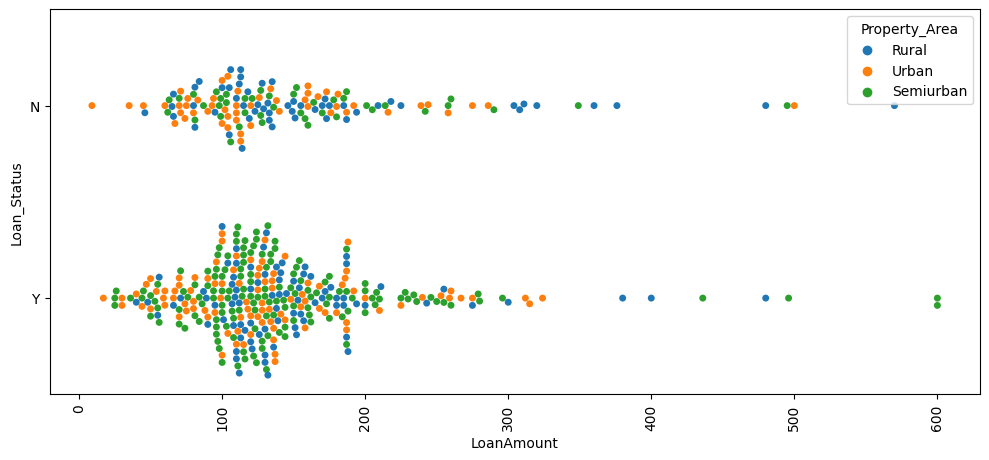

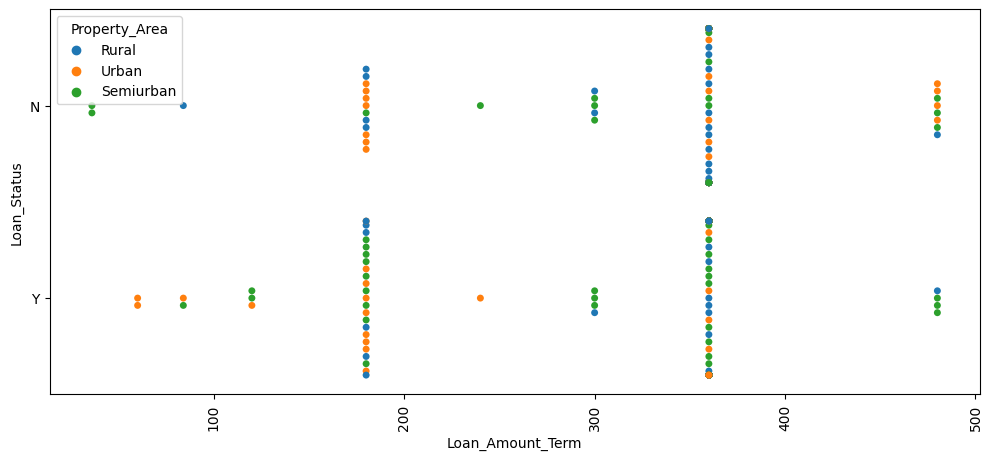

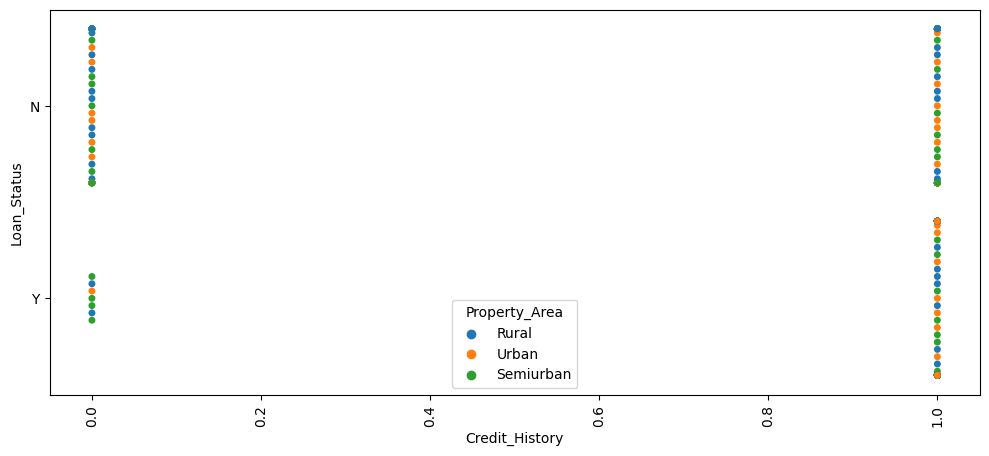

In [263]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Property_Area')
    plt.xticks(rotation=90)
    plt.show()

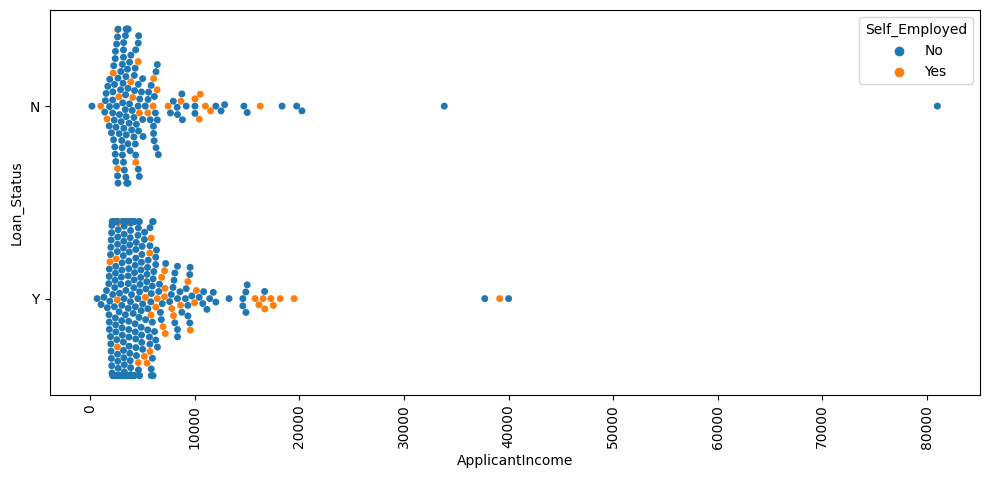

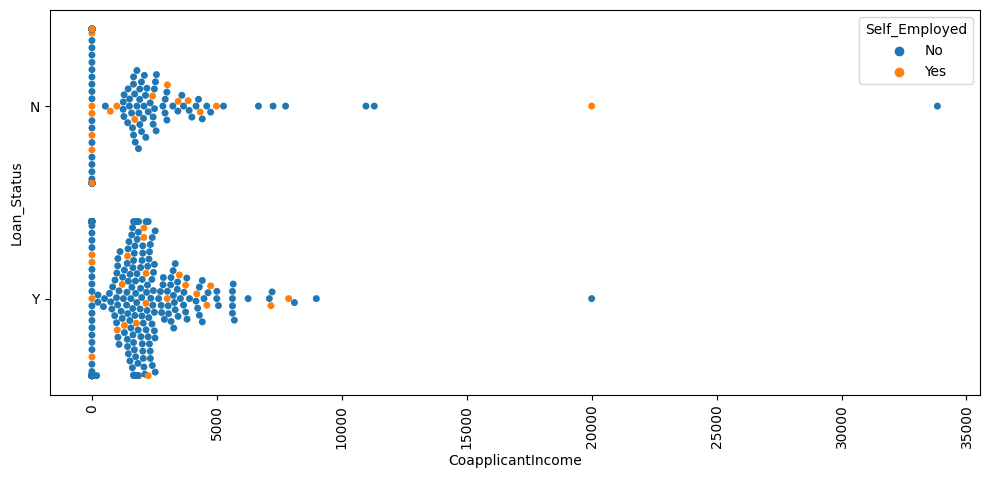

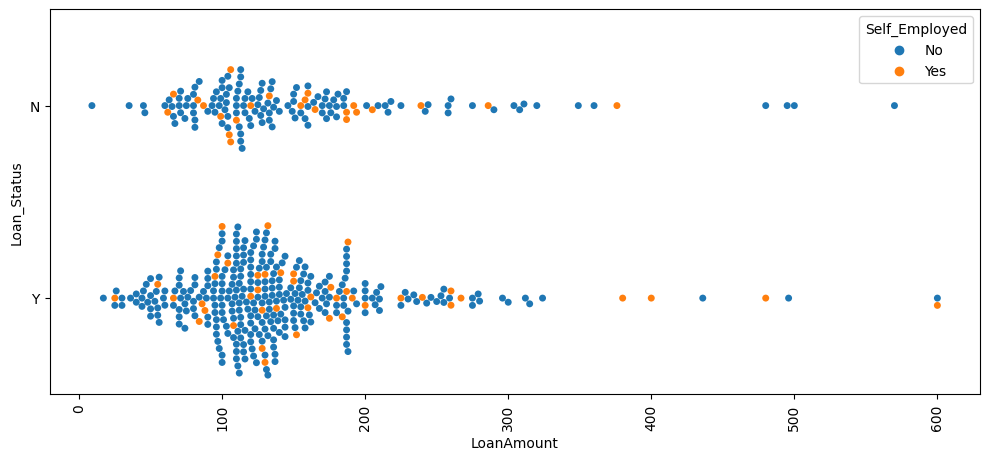

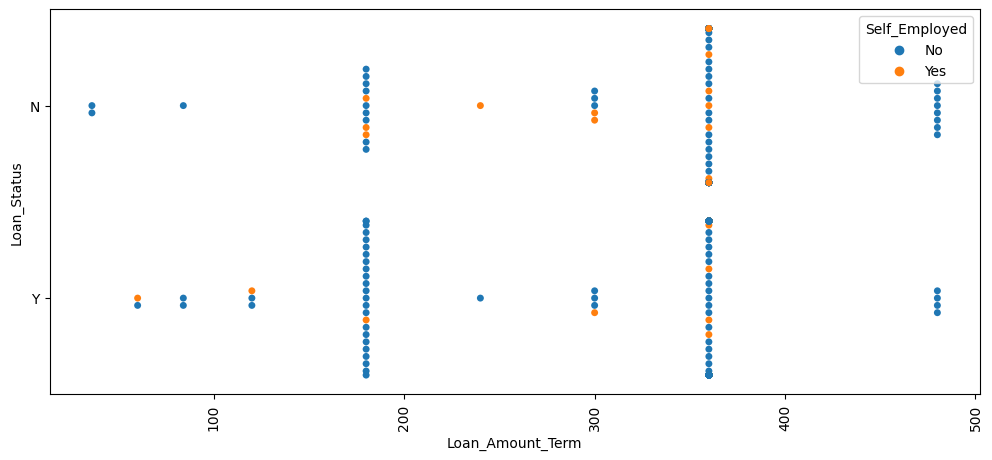

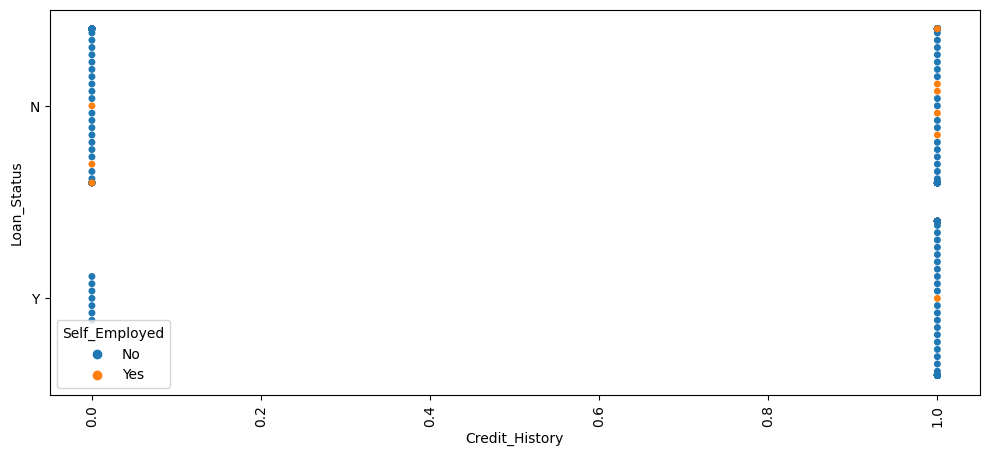

In [264]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Self_Employed')
    plt.xticks(rotation=90)
    plt.show()

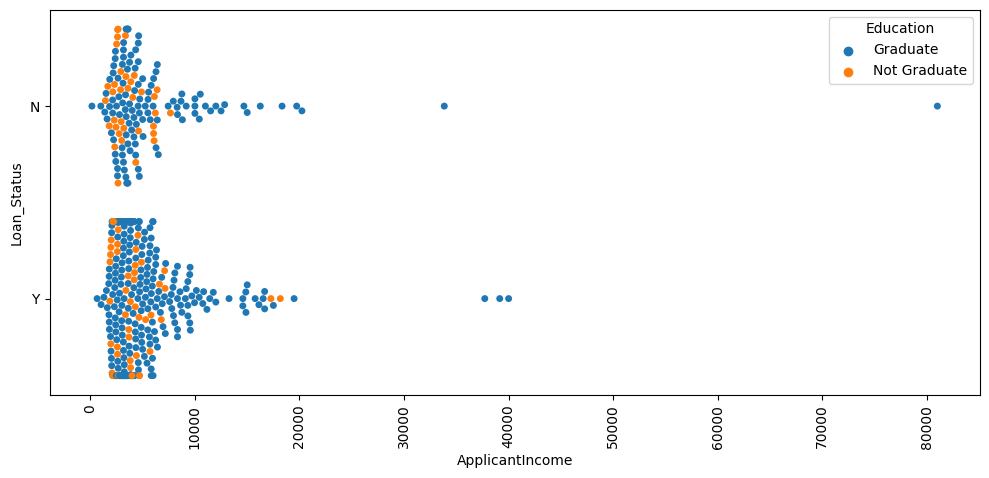

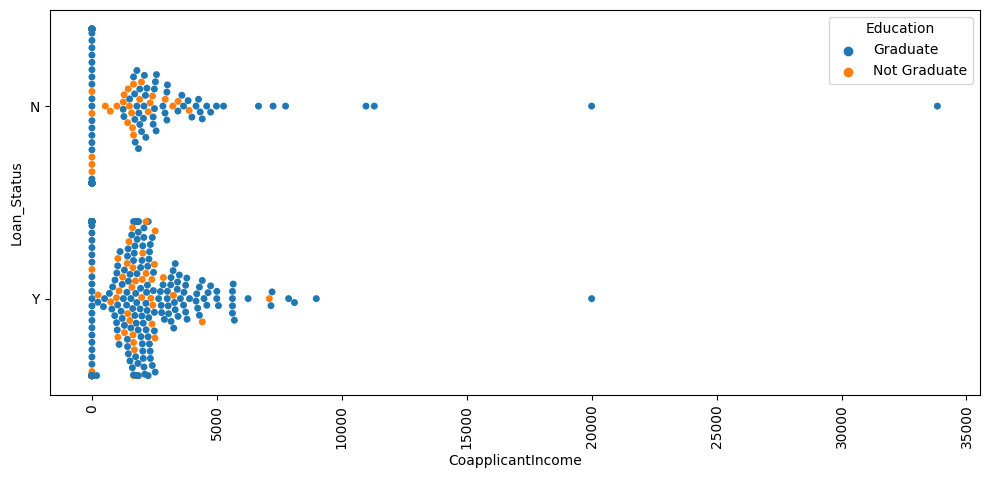

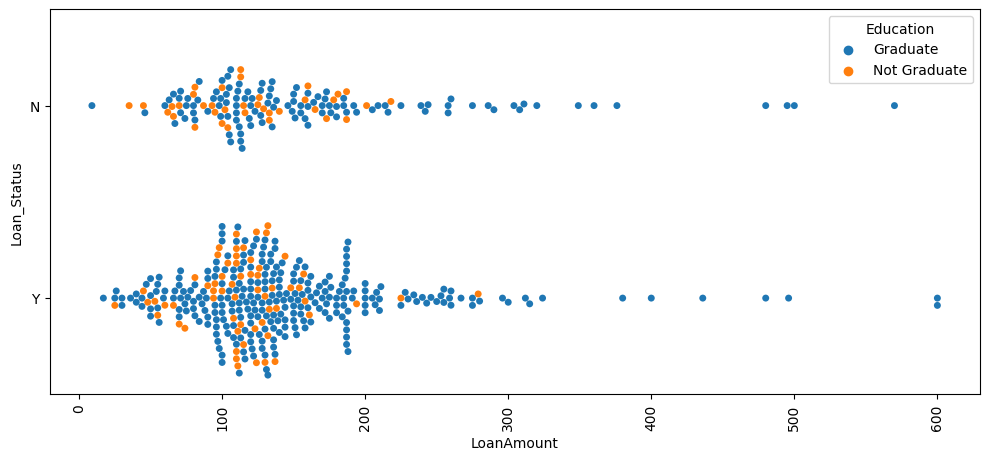

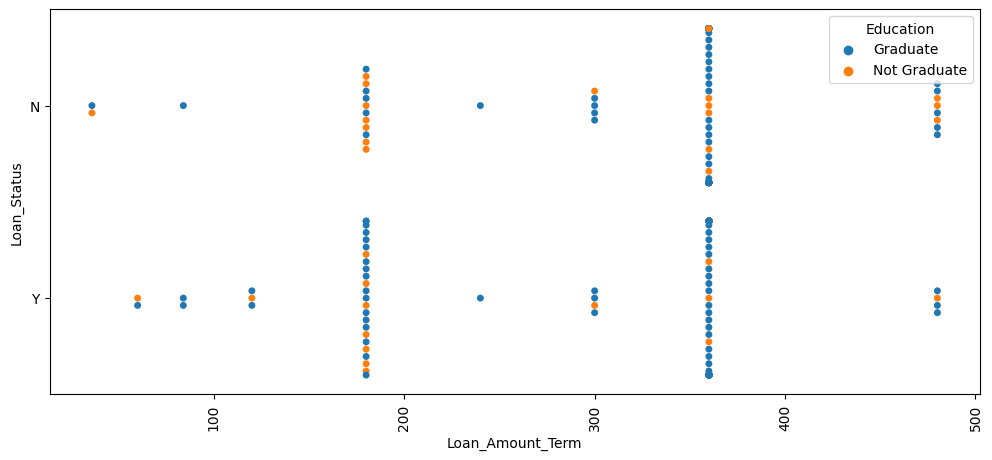

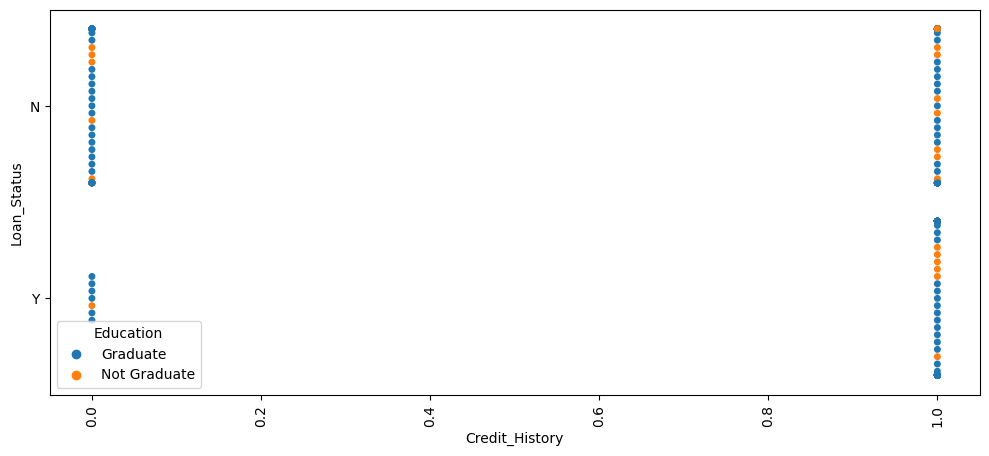

In [265]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Education')
    plt.xticks(rotation=90)
    plt.show()

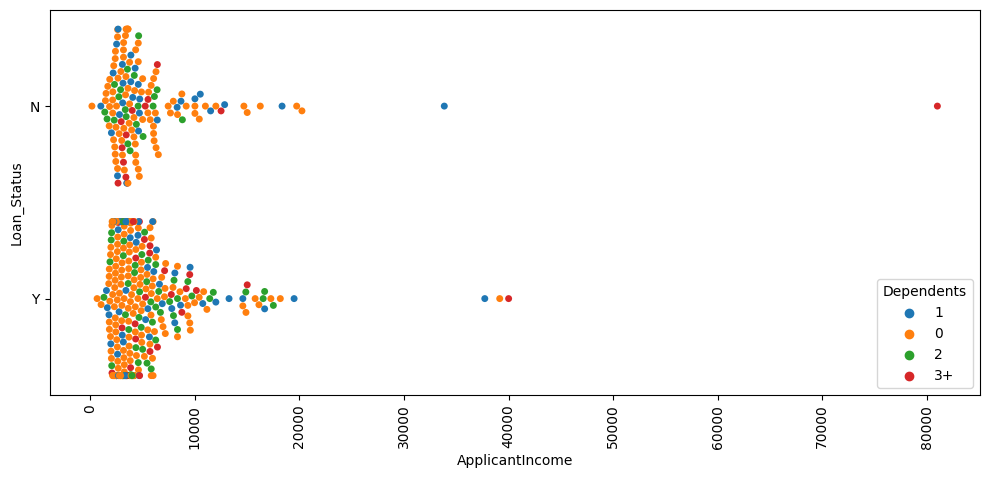

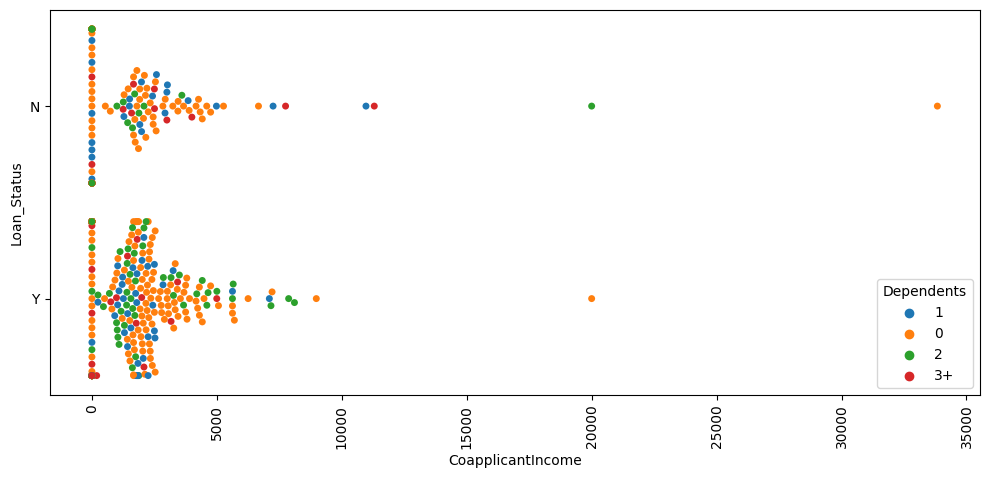

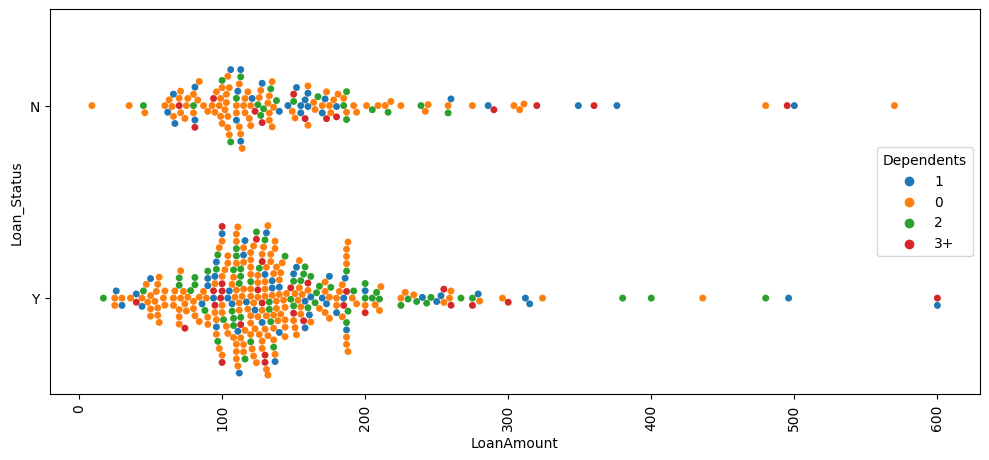

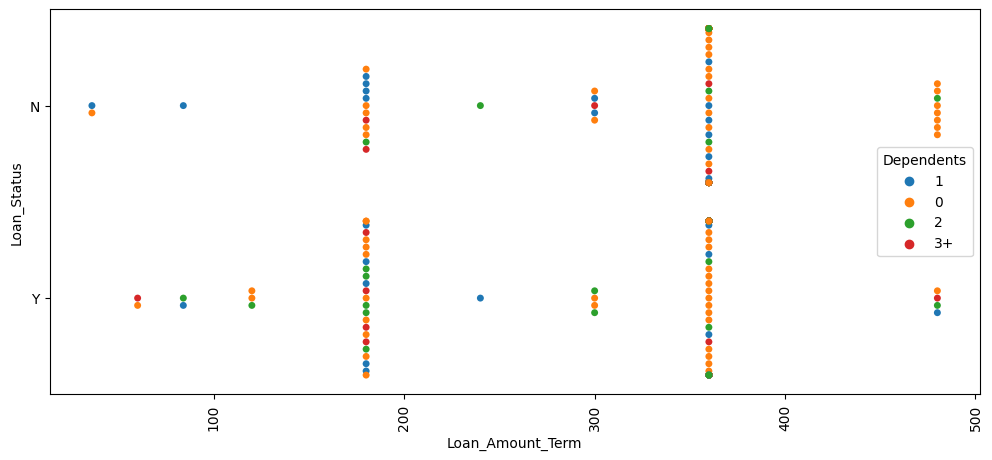

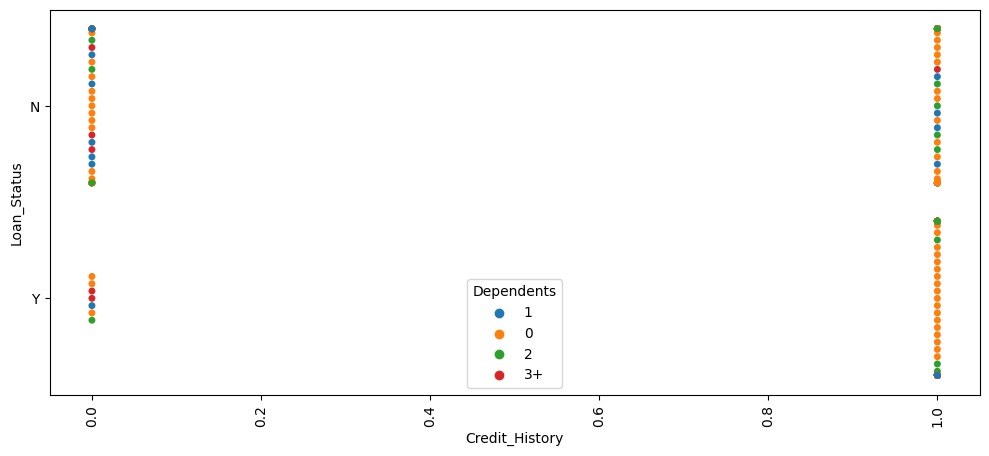

In [266]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Dependents')
    plt.xticks(rotation=90)
    plt.show()

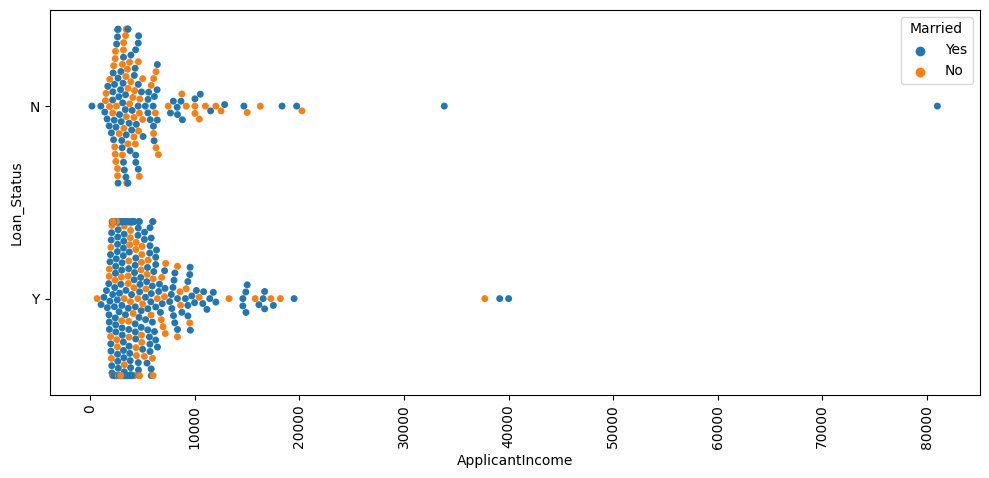

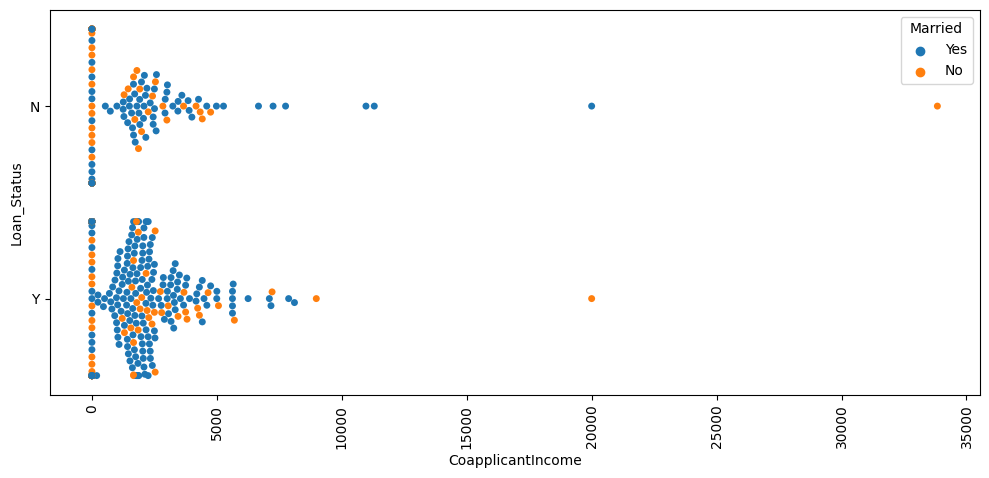

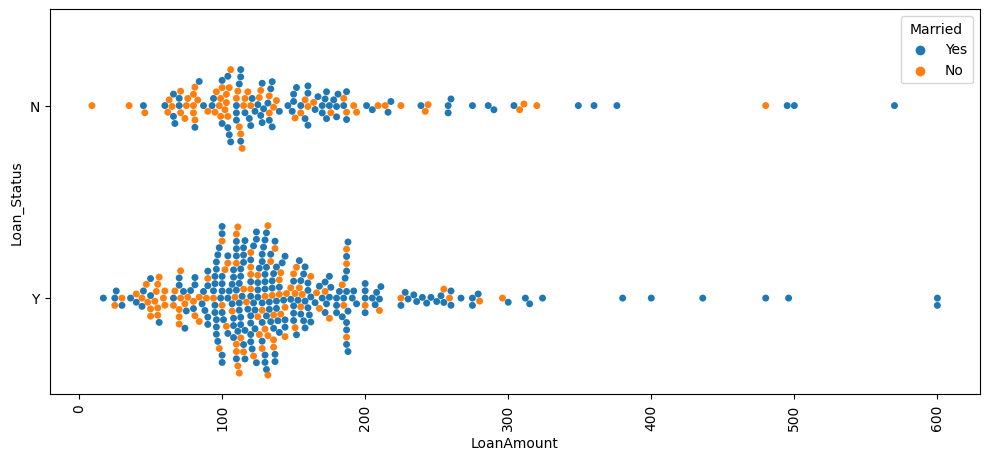

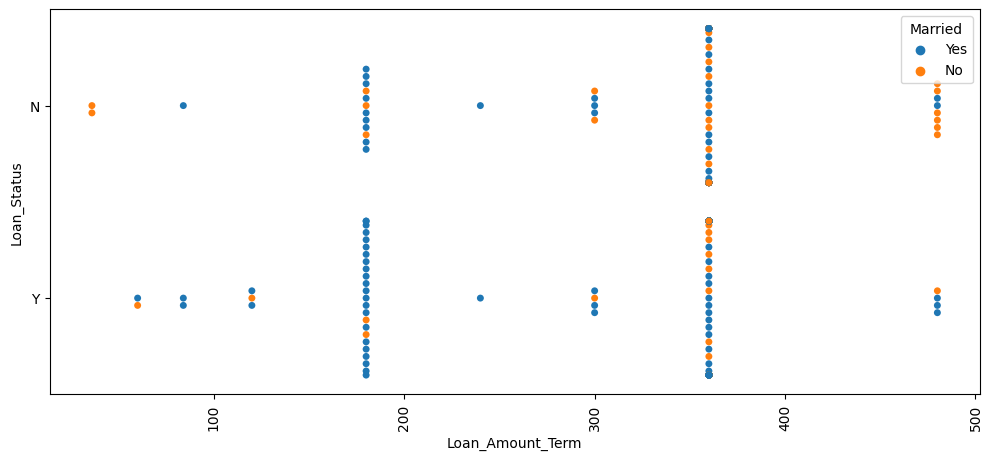

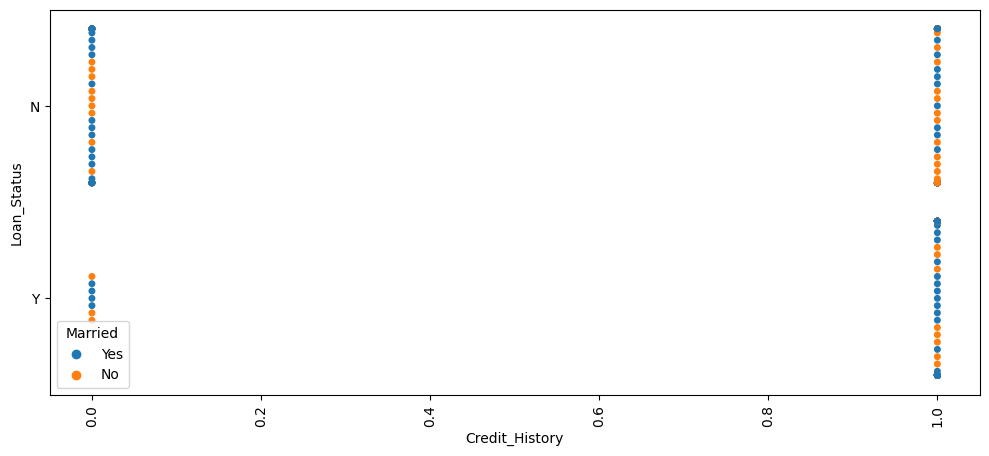

In [267]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Married')
    plt.xticks(rotation=90)
    plt.show()

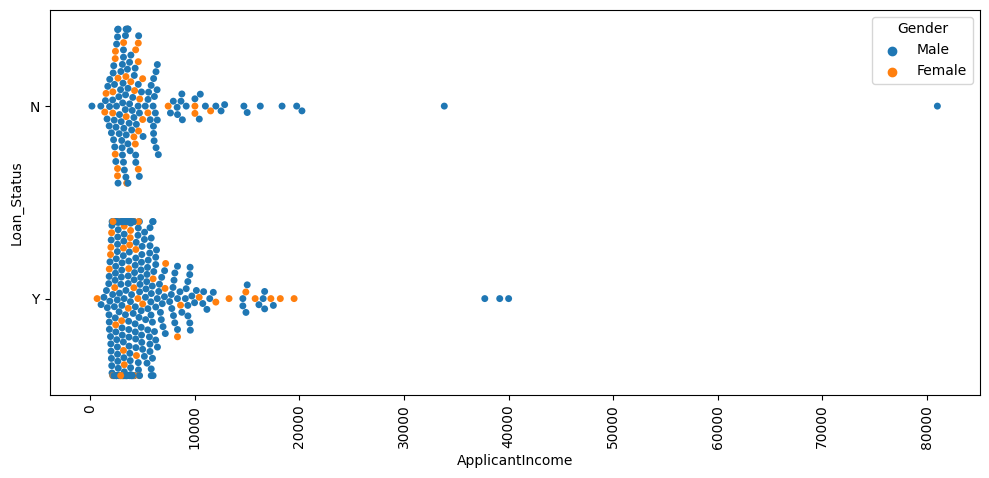

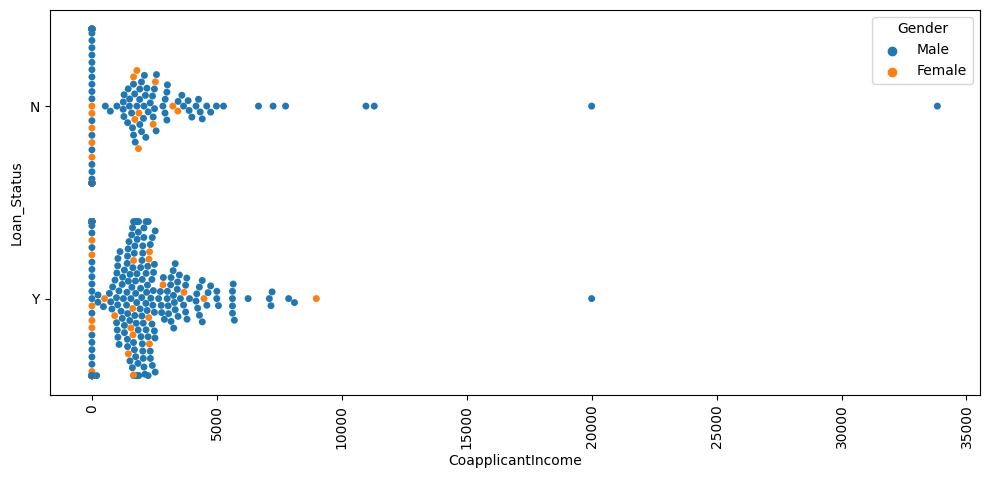

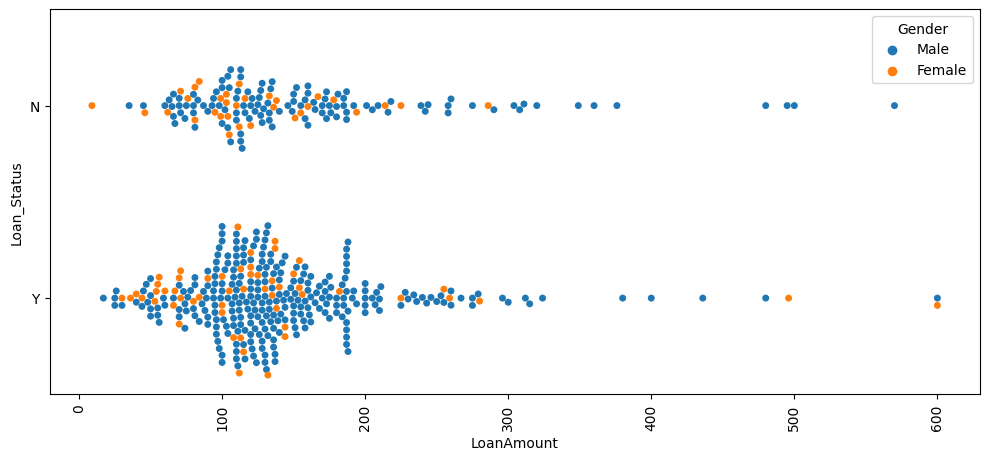

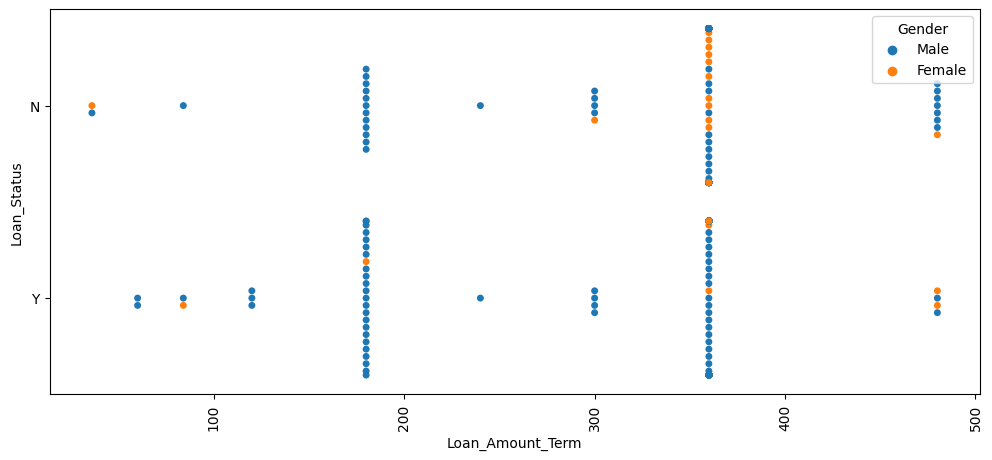

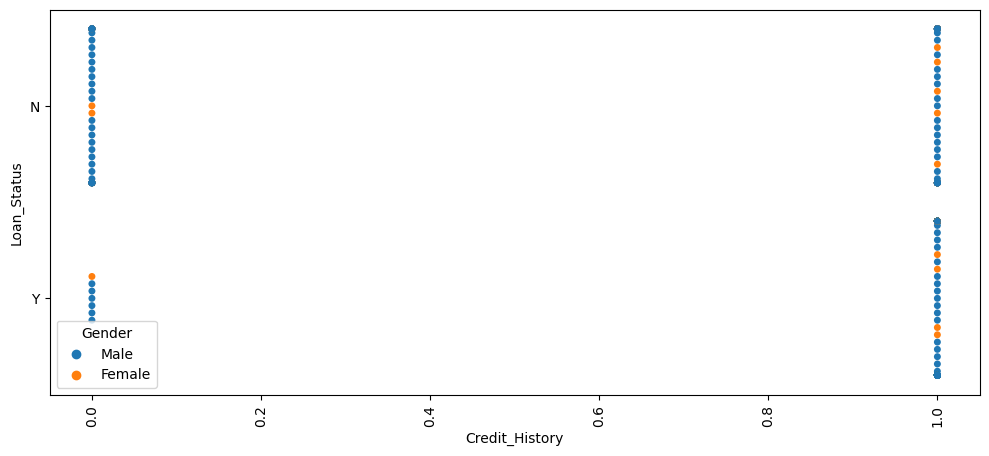

In [268]:
# Swarmplot

for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Gender')
    plt.xticks(rotation=90)
    plt.show()

<Figure size 1200x500 with 0 Axes>

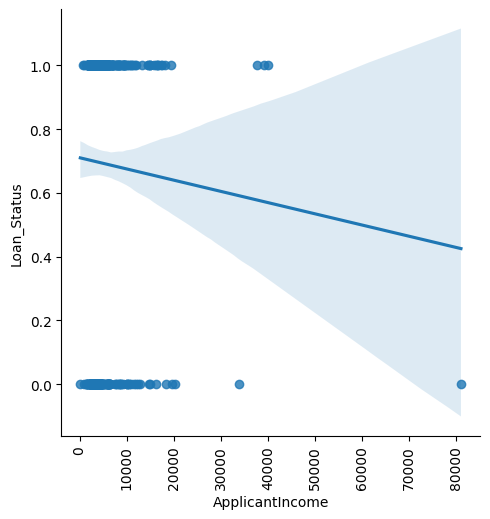

<Figure size 1200x500 with 0 Axes>

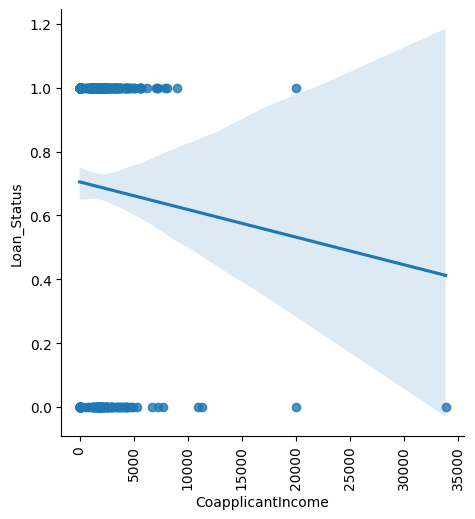

<Figure size 1200x500 with 0 Axes>

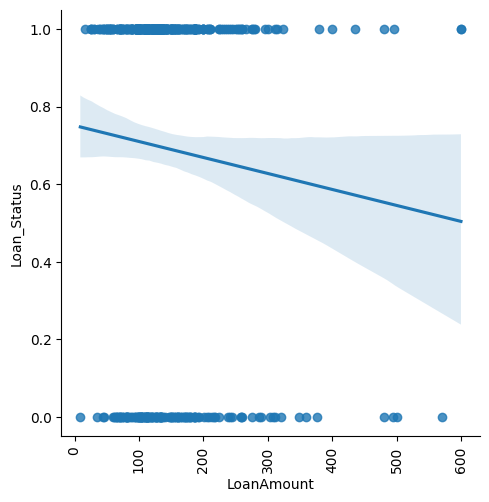

<Figure size 1200x500 with 0 Axes>

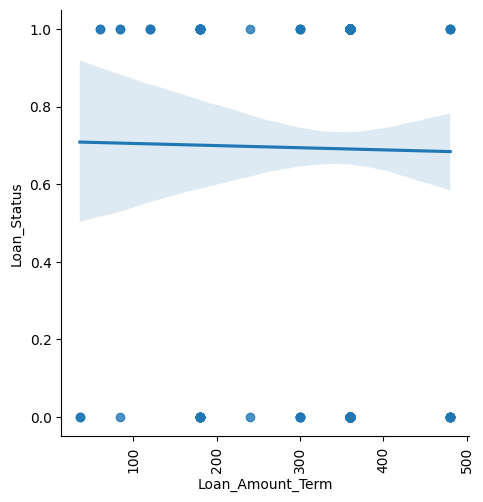

<Figure size 1200x500 with 0 Axes>

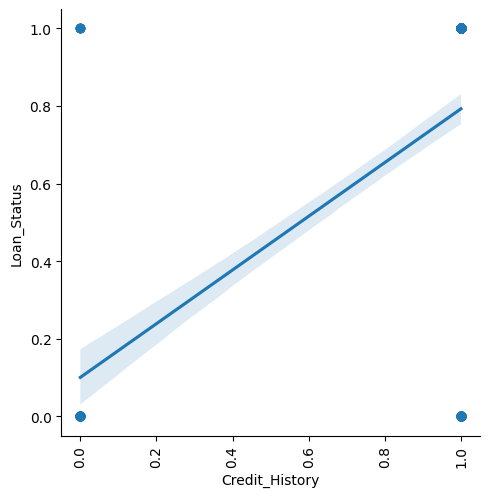

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Loan_Status' to numeric (1 for 'Y', 0 for 'N')
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Assuming cont_columns is a list of column names containing continuous data
for i in cont_columns:
    f = plt.figure(figsize=(12, 5))
    ax = sns.lmplot(x=i, y='Loan_Status', data=df)
    plt.xticks(rotation=90)
    plt.show()


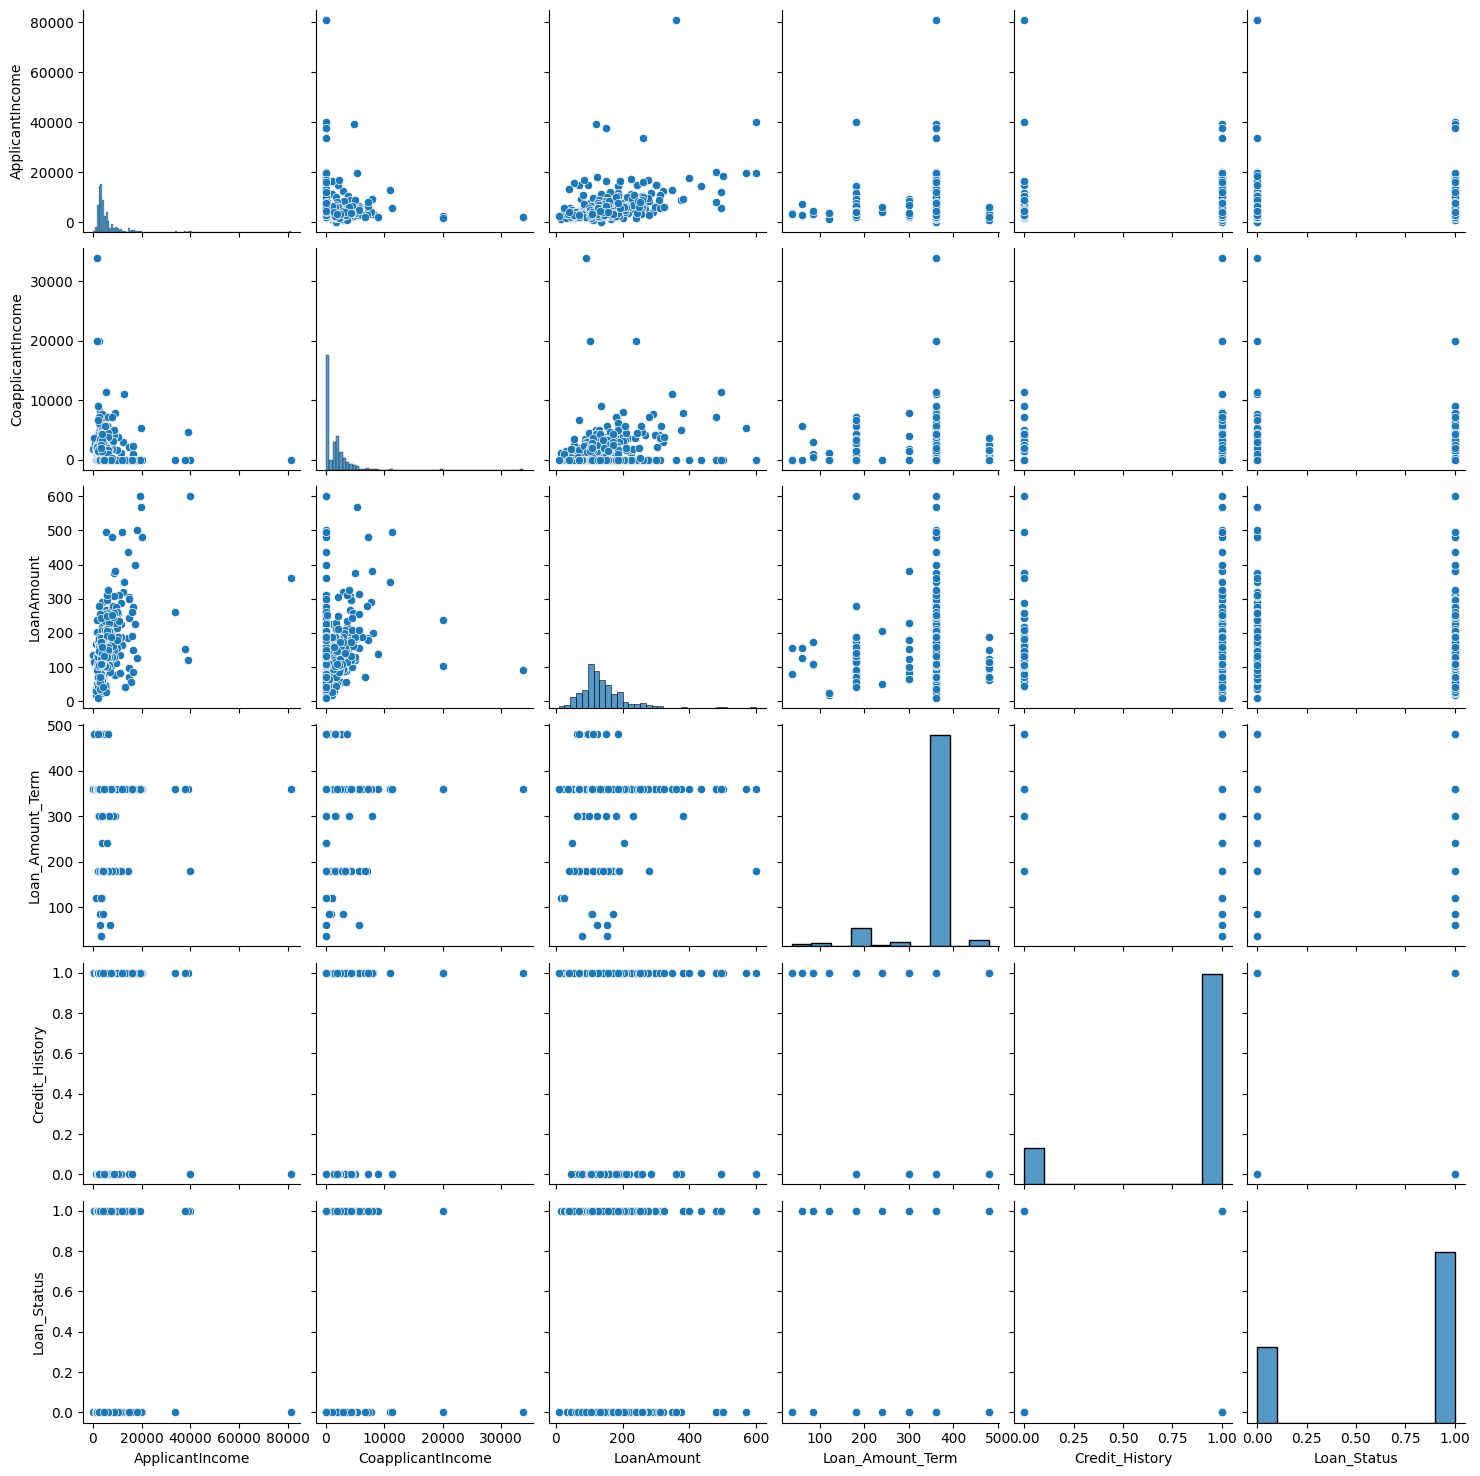

In [270]:
sns.pairplot(df)

In [271]:
len(cont_columns)

5

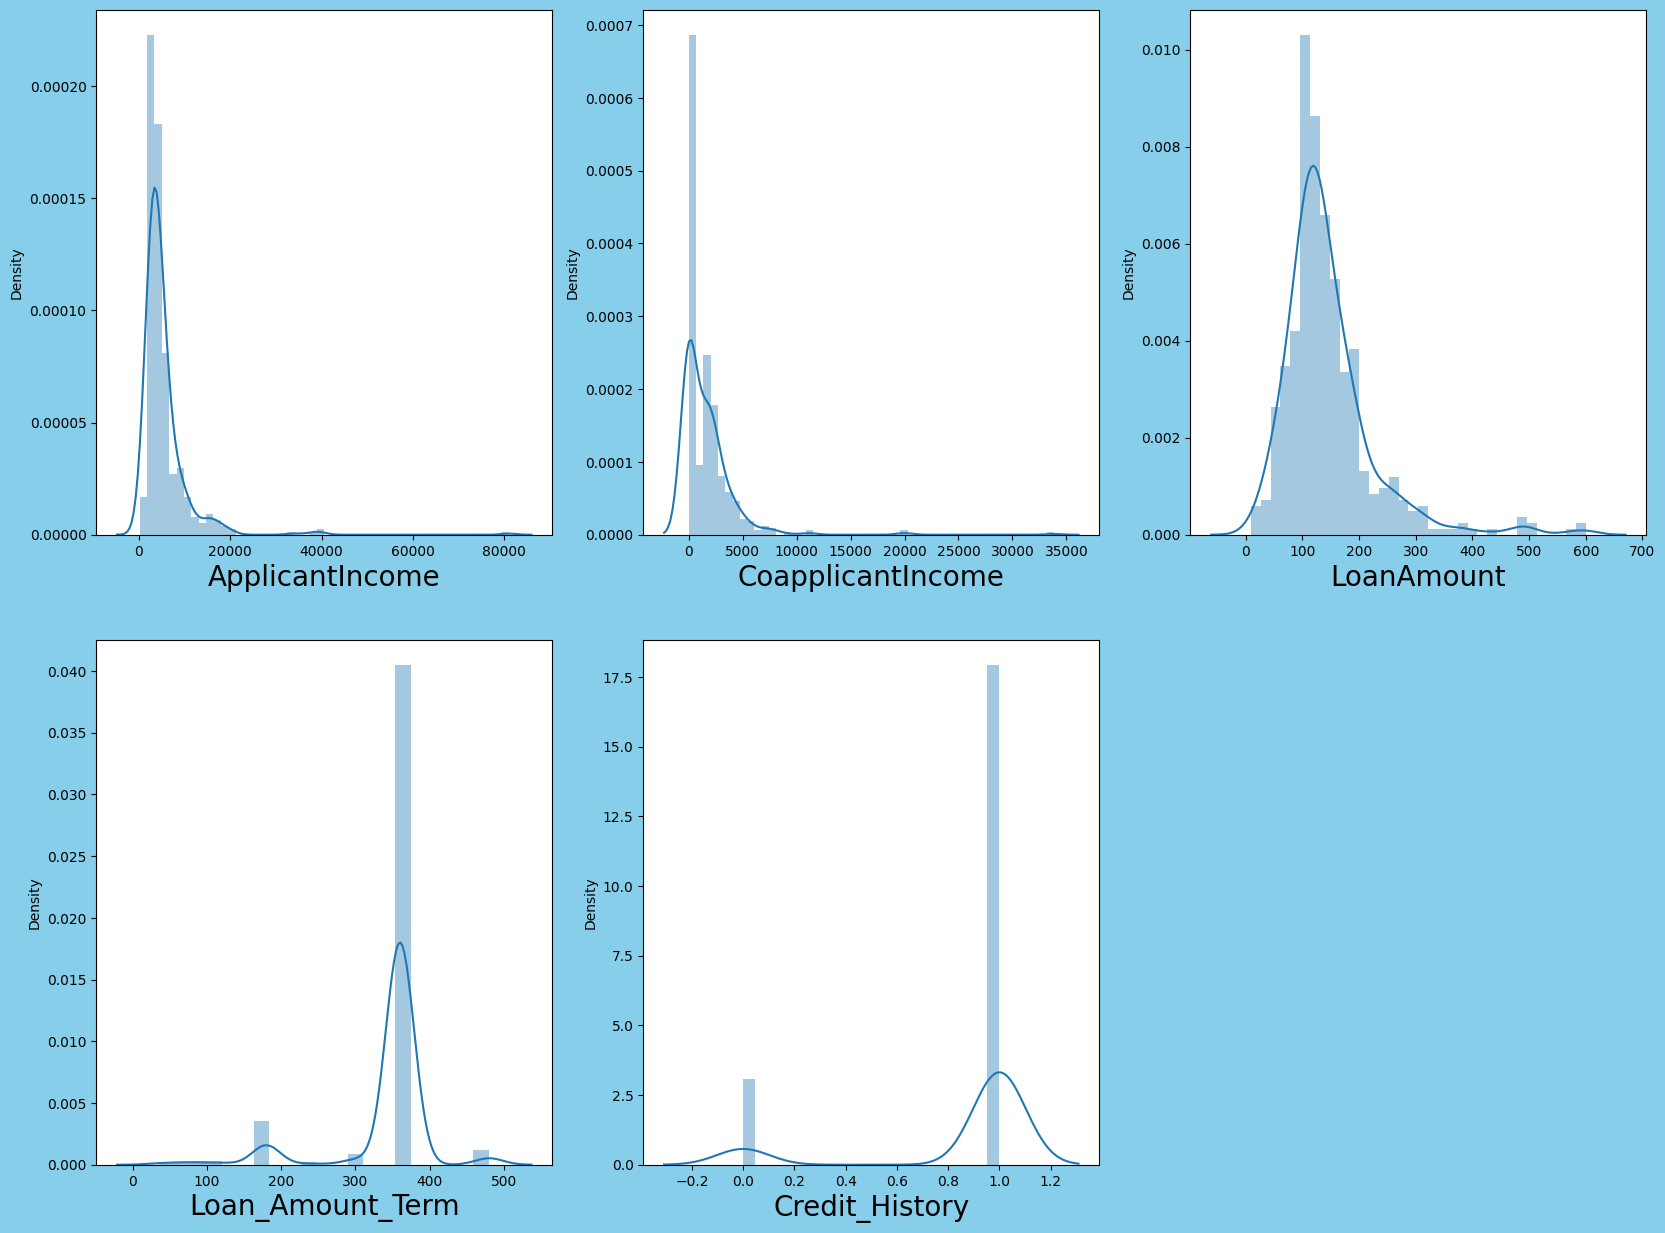

In [272]:
# Checking the distribution of continuous variables:

plt.figure(figsize=(20,15),facecolor='skyblue')
plotnumber = 1
for column in cont_data.columns:
    if plotnumber <= 5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

<Figure size 1200x500 with 0 Axes>

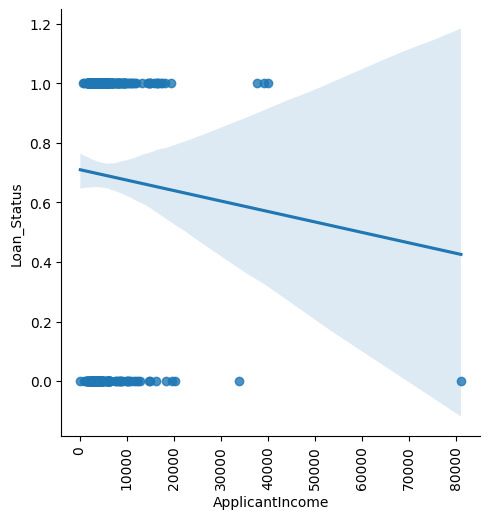

<Figure size 1200x500 with 0 Axes>

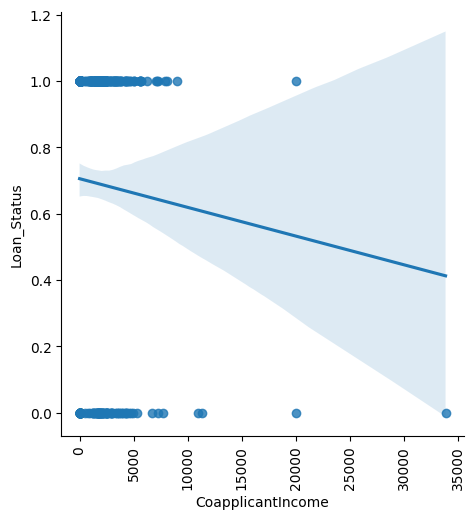

<Figure size 1200x500 with 0 Axes>

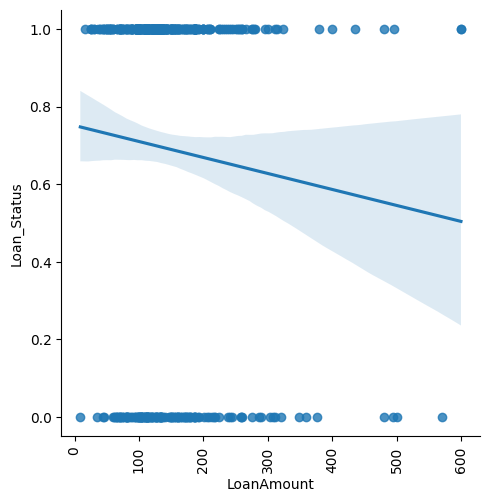

<Figure size 1200x500 with 0 Axes>

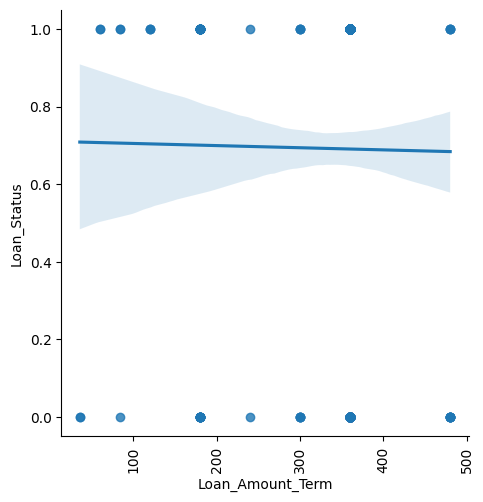

<Figure size 1200x500 with 0 Axes>

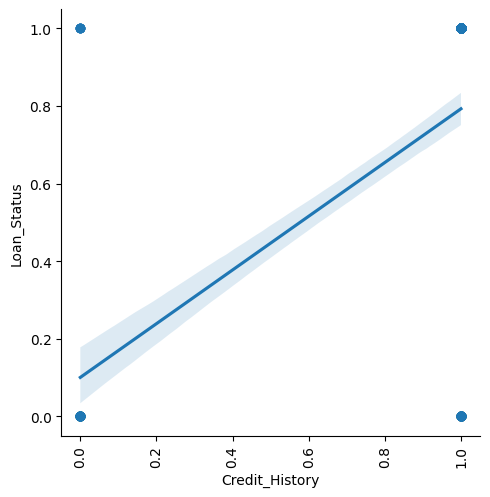

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cont_columns is a list of column names containing continuous data
for i, column in enumerate(cont_columns):
    if i <= 5:  # Make sure this line is correctly indented
        f = plt.figure(figsize=(12, 5))
        ax = sns.lmplot(x=column, y='Loan_Status', data=df)
        plt.xticks(rotation=90)
        plt.show()


In [274]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Select numeric columns to calculate skewness
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate skewness for numeric columns only
skewness = numeric_columns.skew().sort_values()

print(skewness)


Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Loan_Status         -0.832681
LoanAmount           2.361437
CoapplicantIncome    5.881622
ApplicantIncome      6.917027
dtype: float64


In [275]:
# Checking data types of each column
data_types = df.dtypes
print(data_types)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


In [276]:
# Using label encoder to encode dependent variable column:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])
  
df['Loan_Status'].unique()

array([0, 1], dtype=int64)

In [277]:
# Using Z Statistics to check and remove any more outliers:

from scipy.stats import zscore

z_score = zscore(df[cont_columns])

abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1) # values lying in 3 times std will be removed

df = df[filtering_entry]

df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       452.000000         452.000000  452.000000        452.000000   
mean       4763.199115        1403.710000  136.672566        347.522124   
std        3010.857752        1666.991571   58.883355         53.639694   
min         150.000000           0.000000    9.000000        180.000000   
25%        2880.500000           0.000000  100.000000        360.000000   
50%        3848.000000        1211.500000  127.500000        360.000000   
75%        5712.500000        2236.500000  164.250000        360.000000   
max       18165.000000        8980.000000  380.000000        480.000000   

       Credit_History  Loan_Status  
count      452.000000   452.000000  
mean         0.851770     0.699115  
std          0.355722     0.459151  
min          0.000000     0.000000  
25%          1.000000     0.000000  
50%          1.000000     1.000000  
75%          1.000000     1.000000  
max          1.000000     1.000000

In [278]:
480-452
# 28 outliers deleted

28

In [279]:
28/480*100
# 5.83 % outliers of total data deleted

5.833333333333333

In [280]:
# Checking data types of each column
data_types = df.dtypes
print(data_types)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


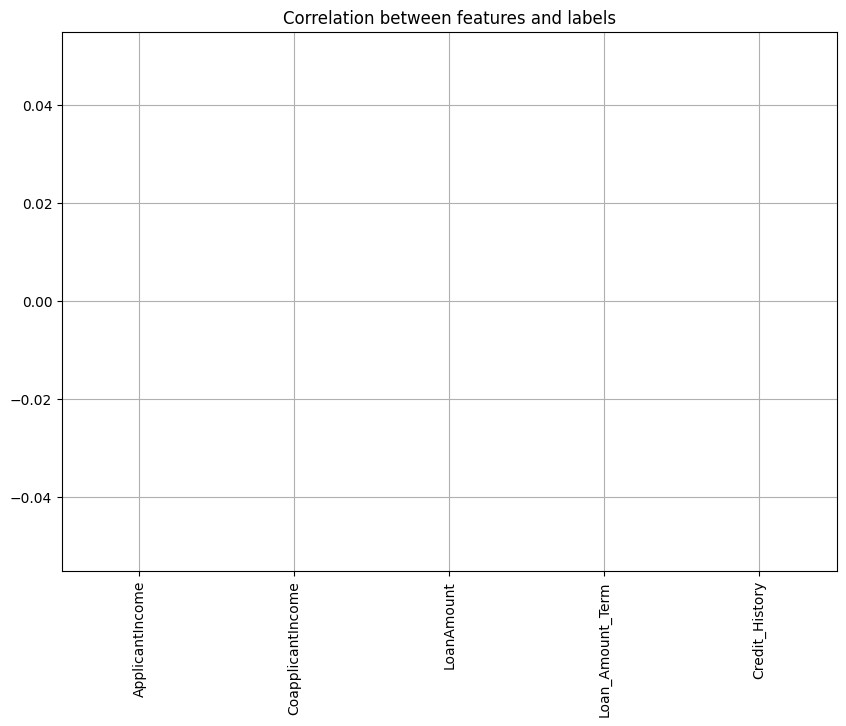

In [281]:
# Step 1: Convert 'Loan_Status' column to numeric values
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Step 2: Drop any non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 3: Calculate the correlation between features and 'Loan_Status'
correlation_values = numeric_df.drop(columns='Loan_Status').corrwith(numeric_df['Loan_Status'])

# Plotting the correlation values
correlation_values.plot(kind='bar', grid=True, figsize=(10, 7), title='Correlation between features and labels')
plt.show()


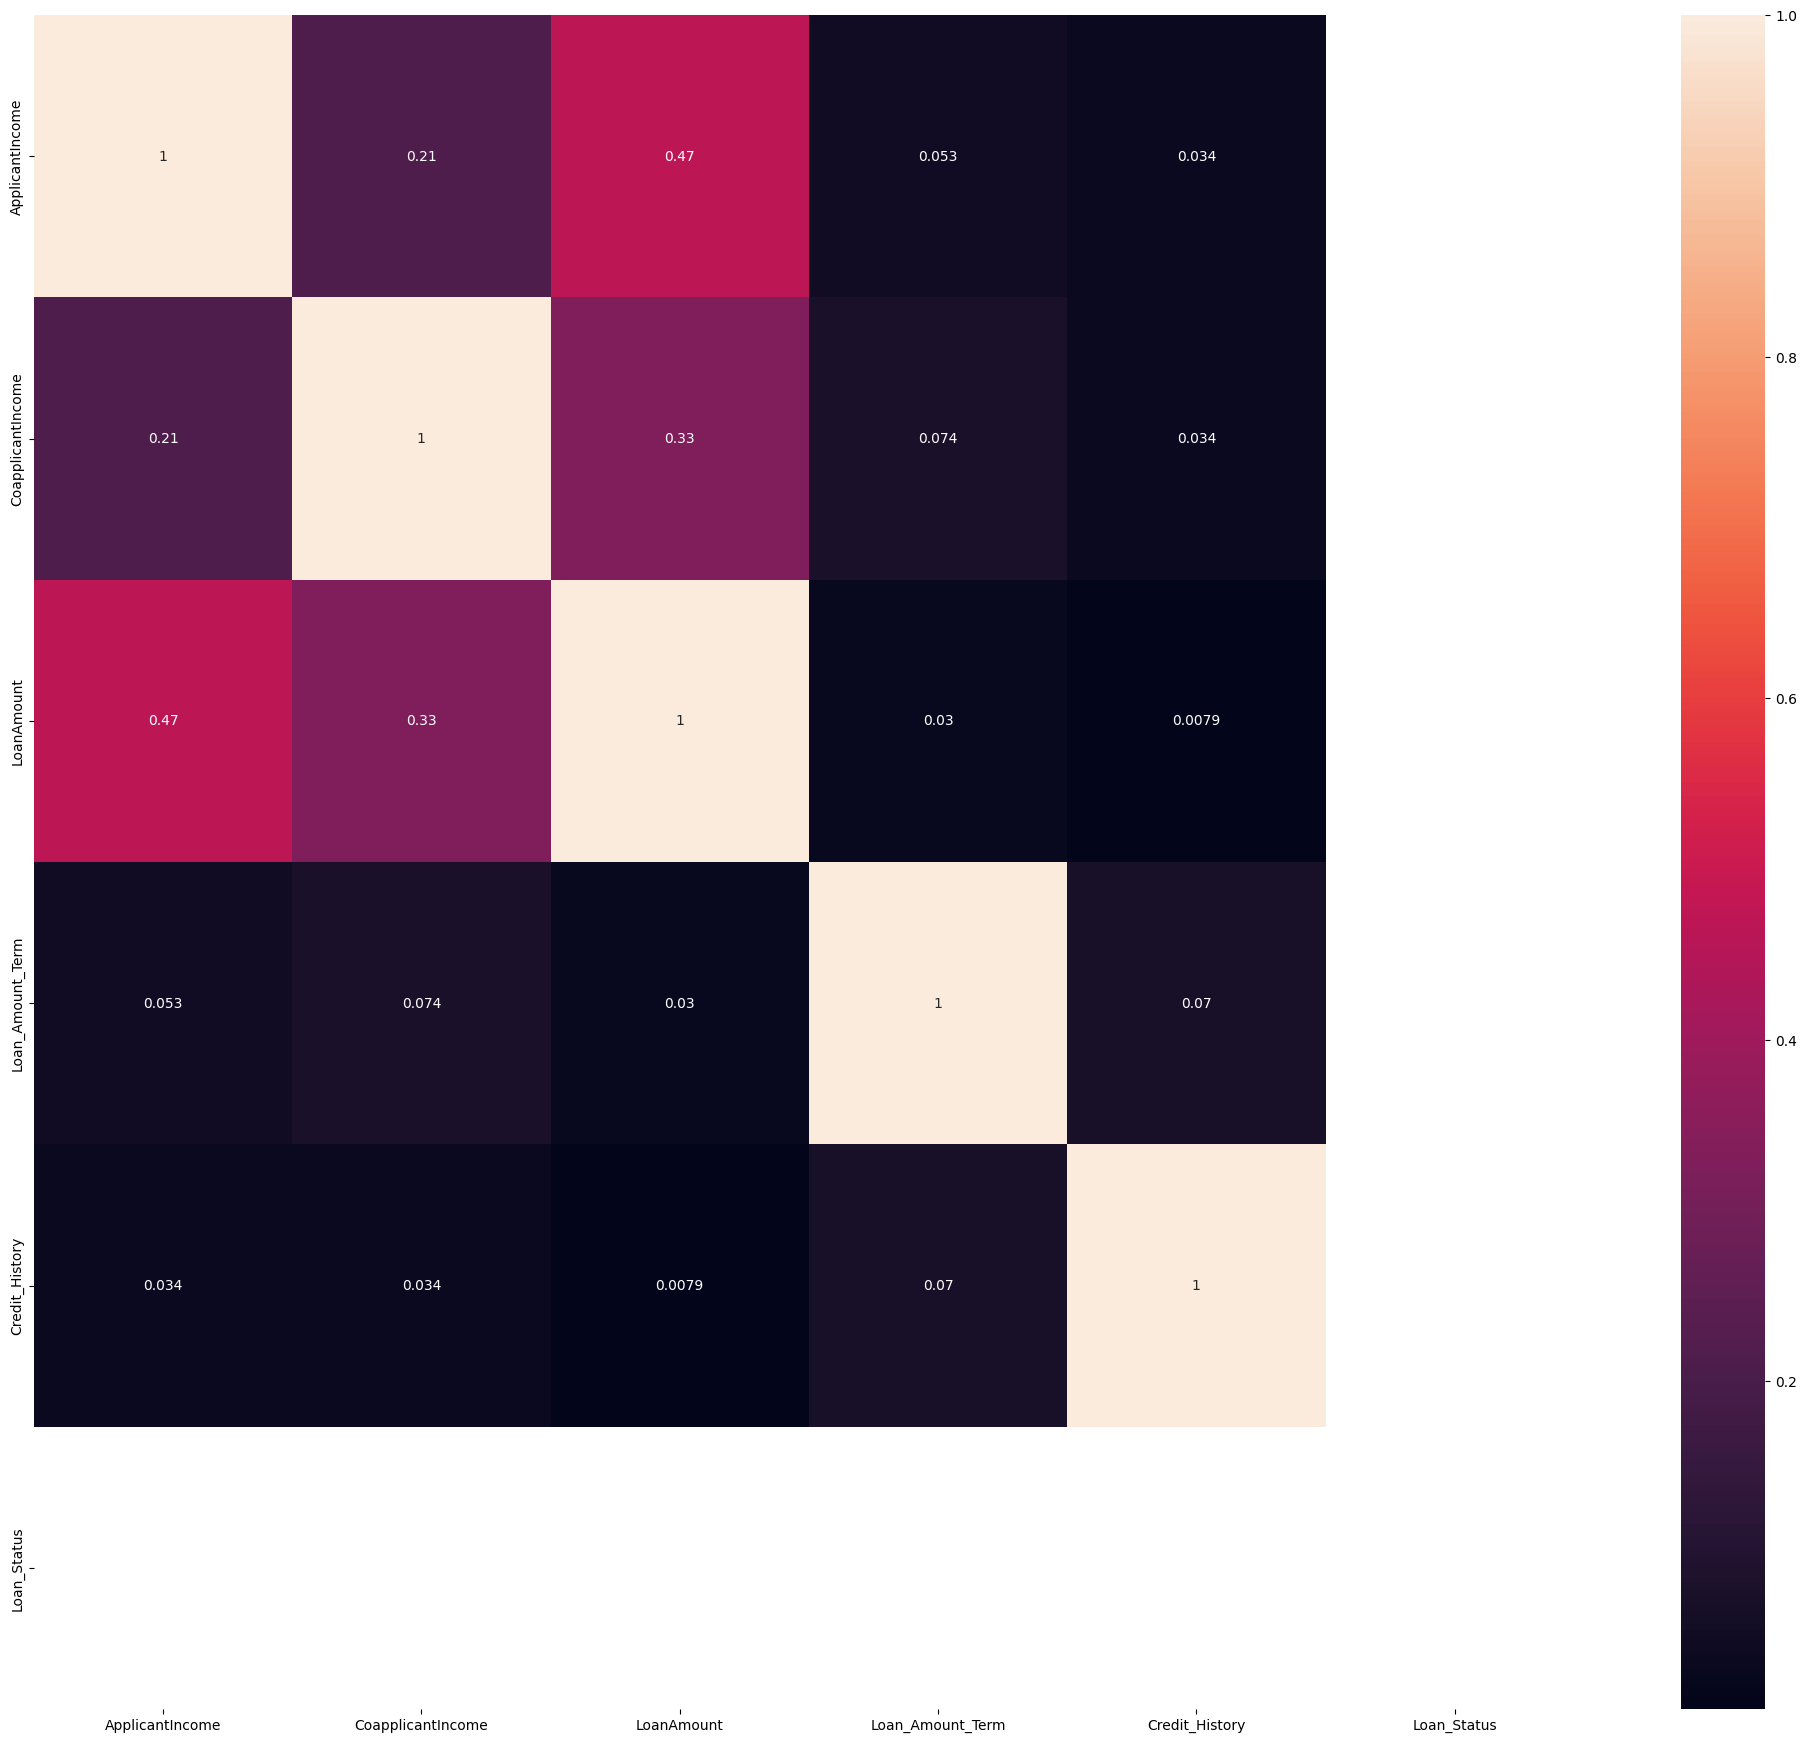

In [282]:
# Step 1: Convert 'Loan_Status' column to numeric values
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Step 2: Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 3: Calculate the correlation matrix
df_corr = numeric_df.corr().abs()

# Plotting the correlation heatmap
plt.figure(figsize=(25, 22))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 10})
plt.show()


In [283]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [284]:
df.drop('LoanAmount',axis=1,inplace=True)

In [285]:
cont_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [286]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df[['ApplicantIncome', 'CoapplicantIncome','Credit_History',
       'Loan_Amount_Term']],i) for i in range(df[['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term','Credit_History']].shape[1])]
vif['features'] = df[['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term','Credit_History']].columns
vif


vif           features
0  3.359824    ApplicantIncome
1  1.693288  CoapplicantIncome
2  6.328437   Loan_Amount_Term
3  8.661533     Credit_History

In [287]:
# Splitting data into features and label:

y = df['Loan_Status']
X = df.drop('Loan_Status',axis=1)

In [288]:
X_dummies = pd.get_dummies(X)

In [289]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_trans_cl = pt.fit_transform(X_dummies)

In [290]:
from sklearn.decomposition import PCA
# Using PCA i.e. Principal Component Analysis that is a diamensionallity reduction technique:

pca1 = PCA()
pca1.fit_transform(X_trans_cl)

array([[-1.94177602e+00,  2.77356916e-01, -6.37794273e-01, ...,
        -0.00000000e+00,  1.59708928e+01,  5.37314280e-16],
       [-4.30890154e-01,  3.53738233e+00,  5.83126254e-01, ...,
         3.83593111e-02,  8.36999520e-01,  5.37314280e-16],
       [-1.32096015e+00, -2.52575816e+00,  2.23307501e+00, ...,
         4.51051983e-03,  5.62538331e-01,  5.37314280e-16],
       ...,
       [-1.91487490e+00,  9.72137169e-01, -1.49427141e+00, ...,
         4.89769970e-01, -8.15253143e-01,  5.37314280e-16],
       [-1.82162434e+00,  9.01782768e-01, -1.63093225e+00, ...,
         1.60798899e-01, -5.87984189e-01,  5.37314280e-16],
       [ 4.37462284e+00,  3.93828204e+00,  1.25204134e+00, ...,
         3.60343722e-01,  3.32786123e-01,  5.37314280e-16]])

In [291]:
X_trans_cl.shape

(452, 471)

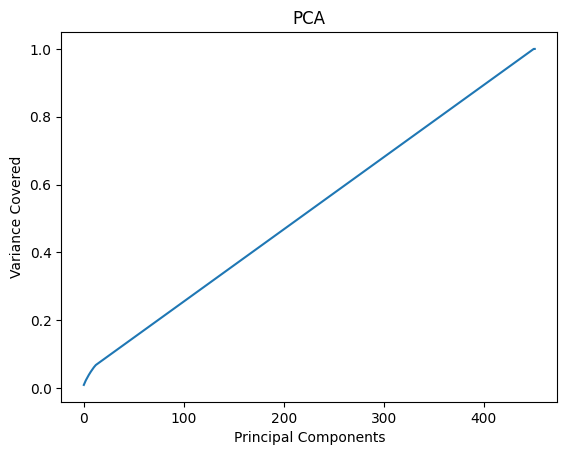

In [292]:
# Using Scree Plot to identify best components:

plt.figure()
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()


In [293]:
# Assuming X_trans_cl contains your preprocessed data
# (ensure that X_trans_cl has the appropriate shape with rows as samples and columns as features)

# Initialize PCA with n_components=394
pca1 = PCA(n_components=394)
new_pcomp = pca1.fit_transform(X_trans_cl)
princi_comp = pd.DataFrame(new_pcomp)
princi_comp


0         1         2         3         4         5         6    \
0   -1.941776  0.277357 -0.637794 -0.713565  0.091955  0.847317  2.838409   
1   -0.430890  3.537382  0.583126 -0.750457  0.360796 -2.857301 -0.093308   
2   -1.320960 -2.525758  2.233075 -0.114419  1.520838 -1.959209 -0.279148   
3    1.760048  0.145298 -0.878679 -2.289987  1.590967 -0.889859 -2.146560   
4   -2.417920  4.082660  0.287066  0.057699  0.817226 -1.468052 -0.435454   
..        ...       ...       ...       ...       ...       ...       ...   
447  4.214627 -0.362535 -0.097721 -0.725899 -0.018943  2.047232  1.868731   
448 -1.954074  0.467998 -0.254904 -1.808495 -0.949740  4.127125  0.629320   
449 -1.914875  0.972137 -1.494271 -0.119762  2.833731 -0.314378  0.654563   
450 -1.821624  0.901783 -1.630932 -0.564441  2.243013  1.332578 -2.318070   
451  4.374623  3.938282  1.252041  2.287334 -0.858703 -0.842127  0.658539   

          7         8         9    ...            384       385  \
0   -0.842267  2.821128 -0.689244  ...  2.699115e-281 -0.000000   
1    0.778131 -1.712145 -0.491686  ...  -1.106458e+00  0.117608   
2    0.362494 -1.109635 -0.989016  ...   8.513077e-01 -1.363675   
3   -0.704341  0.304237 -0.275394  ...   6.687526e-01 -0.345673   
4    3.331720 -0.567037  0.548842  ...  -3.507389e-01  0.190764   
..        ...       ...       ...  ...            ...       ...   
447  0.939444  0.186398 -0.896918  ...  -2.501267e-01  0.362731   
448 -2.955875 -2.003540 -0.954811  ...  -1.198770e+00 -1.092798   
449 -1.462112  1.697088 -0.721941  ...   1.845198e-01 -0.281028   
450  1.968772 -0.167433 -0.270868  ...  -2.579578e-01 -0.113417   
451  0.336404 -2.146146  2.547675  ...   1.091546e+00 -1.030360   

               386            387           388           389           390  \
0    1.449421e-120  7.928752e-106 -2.256125e-61 -1.528943e-46 -2.653973e-17   
1    -3.427086e+00  -1.760203e+00  1.190752e+00  1.755229e-01  5.742384e+00   
2    -6.823927e+00   4.008152e+00 -3.558397e+00 -1.351241e+00 -7.145038e-01   
3     9.921969e-01  -2.576286e+00 -1.943966e+00 -4.120866e+00  1.269465e+00   
4    -1.712258e-01   7.263500e-01  1.985269e+00  3.555701e+00  9.360281e+00   
..             ...            ...           ...           ...           ...   
447  -6.373449e-02  -1.559311e-01  3.463131e-01 -2.259261e-01  4.153433e-03   
448   1.515560e-02  -3.142042e-01  1.296412e+00 -4.090995e-01  6.481336e-02   
449   2.132049e-01  -3.184904e-01 -6.795489e-01  3.577015e-01 -4.987038e-02   
450  -1.653713e-01   1.802788e-01 -4.804984e-01 -6.085592e-02 -5.386495e-02   
451  -2.776023e-01   6.281756e-01 -3.865637e-02 -1.093487e+00  3.075369e-01   

              391            392       393  
0   -2.778633e-17  1.031475e-178 -0.000000  
1   -2.297863e+00   5.566956e-01 -0.315143  
2    2.100633e+00   2.980742e-01  0.128275  
3    1.719400e+00   7.335220e-01 -1.242220  
4    2.531929e+00   3.575796e-01 -0.273952  
..            ...            ...       ...  
447 -1.770119e-01   9.792207e-02  0.149105  
448  6.403322e-02   3.161063e-01  0.102882  
449 -3.026235e-01  -6.835197e-01  1.526850  
450 -2.572580e-01  -1.042188e+00 -1.095805  
451  3.791921e-03   1.406184e-01 -1.088746  

[452 rows x 394 columns]

In [294]:
"""from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(princi_comp,i) for i in range(princi_comp.shape[1])]
vif['features'] = princi_comp.columns
vif
"""

"from statsmodels.stats.outliers_influence import variance_inflation_factor\n\n\nvif = pd.DataFrame()\nvif['vif'] = [variance_inflation_factor(princi_comp,i) for i in range(princi_comp.shape[1])]\nvif['features'] = princi_comp.columns\nvif\n"

In [295]:
# Using SelectKBest feature selection method: # It is one of the feature selection method:
# when there are lot of features and you cant graphically analyse , short way , selectKbest can be
# used:

from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest uses f_classif function to select best features where f_classif uses ANOVA test

In [296]:
print(y.isnull().sum())


452


In [297]:
# Check if there are any samples in y_cleaned
if y_cleaned.shape[0] == 0:
    # Handle the case where there are no samples remaining after removing missing values
    # This could involve a different data imputation strategy or other preprocessing steps.
    print("No samples remaining after removing missing values in y.")
else:
    # Initialize SelectKBest with k=400
    best_features = SelectKBest(score_func=f_classif, k=400)

    # Fit SelectKBest with cleaned data
    fit = best_features.fit(princi_comp_cleaned, y_cleaned)

    # Rest of the code...



No samples remaining after removing missing values in y.


In [298]:
"""
EDA steps:

1. Number of rows and columns (614, 13)

2. Column names: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
       
3. Datatypes:

Numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'

Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

4. Null values: 134 rows with 13 columns contain null values.
    
   Counts are mentioned below:
    
    Credit_History       50
    Self_Employed        32
    LoanAmount           22
    Dependents           15
    Loan_Amount_Term     14
    Gender               13
    Married               3
    Loan_ID               0
    Education             0
    ApplicantIncome       0
    CoapplicantIncome     0
    Property_Area         0
    Loan_Status           0

5. Dropping null values.

6. Numerical data description:

Min Applicant income is 150 thats unrealistic
Min Coapplicant income is 0
Min loan amount is 9 that is fishy.
Min credit history is 0.
Range of Loan_Amount_Term is varrying a lot with mean at 342 and min at 36 and max at 480.

7. Categorical data statistics:

For Loan_ID , most frequent value is:  ModeResult(mode=array(['LP001003'], dtype=object), count=array([1])) 

For Gender , most frequent value is:  ModeResult(mode=array(['Male'], dtype=object), count=array([394])) 

For Married , most frequent value is:  ModeResult(mode=array(['Yes'], dtype=object), count=array([311])) 

For Dependents , most frequent value is:  ModeResult(mode=array(['0'], dtype=object), count=array([274])) 

For Education , most frequent value is:  ModeResult(mode=array(['Graduate'], dtype=object), count=array([383])) 

For Self_Employed , most frequent value is:  ModeResult(mode=array(['No'], dtype=object), count=array([414])) 

For Property_Area , most frequent value is:  ModeResult(mode=array(['Semiurban'], dtype=object), count=array([191])) 

For Loan_Status , most frequent value is:  ModeResult(mode=array(['Y'], dtype=object), count=array([332])) 

For column Loan_ID count of unique values are:  480 

For column Gender unique values are:  ['Male' 'Female']
For column Gender count of unique values are:  2 


For column Married unique values are:  ['Yes' 'No']
For column Married count of unique values are:  2 


For column Dependents unique values are:  ['1' '0' '2' '3+']
For column Dependents count of unique values are:  4 


For column Education unique values are:  ['Graduate' 'Not Graduate']
For column Education count of unique values are:  2 


For column Self_Employed unique values are:  ['No' 'Yes']
For column Self_Employed count of unique values are:  2 


For column Property_Area unique values are:  ['Rural' 'Urban' 'Semiurban']
For column Property_Area count of unique values are:  3 


For column Loan_Status unique values are:  ['N' 'Y']
For column Loan_Status count of unique values are:  2 

            ANALYSING VALUE COUNTS:

            For column -- Gender -- value counts are: 
             Male      394
            Female     86
            Dataset contains more male gender data.

            For column -- Married -- value counts are: 
             Yes    311
            No     169
            Name: Married, dtype: int64 
            Dataset has more married people.


            For column -- Dependents -- value counts are: 
             0     274
            2      85
            1      80
            3+     41
            Name: Dependents, dtype: int64 
            Dataset contains more people who dont have any dependents.


            For column -- Education -- value counts are: 
             Graduate        383
            Not Graduate     97
            Name: Education, dtype: int64 
            Most people are graduates.

            For column -- Self_Employed -- value counts are: 
             No     414
            Yes     66
            Name: Self_Employed, dtype: int64 
            Most people are not self employed.

            For column -- Property_Area -- value counts are: 
             Semiurban    191
            Urban        150
            Rural        139
            Name: Property_Area, dtype: int64 
            Mostly applicants live in urban but ratio is slightly imbalanced.


            For column -- Loan_Status -- value counts are: 
             Y    332
            N    148
            Name: Loan_Status, dtype: int64 
            For most people loan status was yes.

9. Countplot complies to above observations.

10. Scatterplot Conclusions:

Mostly applicant income are between 10000-20000
Coaplicant income lies btw 0 to 5000
Loan amount values are between 0 to 200
Loan amount term has max datapoints at 200 and 350 around.
Data points for credit history lie at 0 and 1

11. Analysing line plot:

Conclusions:

Property_Area values , 
For rural people loan status is no even for high applicant income data.
For semiurban people loan status is yes upto income 40000
For semiurban coaplicants loan status is yes varied coap. income.
For people belonging to semi urban and urban are loan status is yes for varrying terms and loan amuont.


For self employed people:
Loan status is yes for applicant income upto 40000 and no for arround 17000
Loan status is yes for coaplicant income upto 20000 and no for 7000 around.
When self employed loan status is no, for all credit history values and yes with -ive trend when for all credit history values.

12. Analysis using histplot and densityplot:

For applicant income frequency is max between: 0-20000
For coapplicant income frequency is max between: 0-5000
For loan amont frequency is max between: 50-200
For loan amont term frequency is max at: 360 around
For credit history frequency is max at: 1

13. Analysing catplots.

We can conclude that:
    loan status is yes when credit history is 1 for most loan amount terms.
    loan status is yes when coapplicant has good income.
    loan status is yes for mostly 360 loan amount term and for varrying loan amount mostly upto 300.
    loan status is yes for mostly high applicant income.
    No conclusive evidence can be found for loan status yes or no whether person self employed or not.
    
14. Analysis using swarmplot:

Conclusion:
    1. status of loan is yes when property area is any and Range is also broader for applicant income as compared to 
    when loan status is no.
    2. status of loan is yes when coaplicant income is good upto 10000.
    3. status of loan is yes for loan amount in range 100-200 for all property types.
    4. Loan term has max data points max when btw 100-200 and 300-400
    5. status of loan is yes for credit history value 1
    6. Mostly loan is granted for working applicants who are not self employed.
    7. Mostly loan is granted for graduates.
    8. Mostly loan is granted for applicants who have 0 dependents.
    9. Mostly loan is granted for applicants who are  married.
    10. Mostly loan is granted for applicants who are males.
    

15. Analysis using lm plot for regression line:
    
    conclusion:
    Slight positive relation can be seen btw applicant,coap. income
    credit history has highest +ive relation
    loan amount has slight -ive relation.
    
    
16. Data distribution:
    
    Except loan amount and loan amount term that are slightly skewed, rest features are highly skewed.
    
17. Outlier detection:

    All features contain outliers.
    
18. Skewness in data: 

    Loan_Amount_Term    -2.362414
    Credit_History      -1.882361
    LoanAmount           2.677552
    ApplicantIncome      6.539513
    CoapplicantIncome    7.491531
    
    All values are skewed.
    
19. Furthur steps:
    Encoding label column.
    Outlier removal : 5.83 % outliers removed.
    Corelation checking and multicolinearity check.
        Credit history is highly correlated with loan status.
        Multicolinearity problem is not found. But still as vif values of credit history and loan amount term
        have values > 5 , they are correlated to each other.
    Encoding categorical features using get dummies.
    Using power transformer to transform data.
    PCA analysis and selecting best features.
    Spliting data and applying oversampling using smote.
        
20. Best model selection and performance: Gradient boosting classifier:

Training accuracy:  100.0
Testing accuracy:  80.21978021978022
Confusion matrix: 
 [[15 16]
 [ 2 58]]
classification report:                precision    recall  f1-score   support

           0       0.88      0.48      0.62        31
           1       0.78      0.97      0.87        60

    accuracy                           0.80        91
   macro avg       0.83      0.73      0.75        91
weighted avg       0.82      0.80      0.78        91


    



    """

"\nEDA steps:\n\n1. Number of rows and columns (614, 13)\n\n2. Column names: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',\n       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',\n       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']\n       \n3. Datatypes:\n\nNumerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',\n       'Loan_Amount_Term', 'Credit_History'],\n      dtype='object'\n\nCategorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',\n       'Self_Employed', 'Property_Area', 'Loan_Status']\n\n4. Null values: 134 rows with 13 columns contain null values.\n    \n   Counts are mentioned below:\n    \n    Credit_History       50\n    Self_Employed        32\n    LoanAmount           22\n    Dependents           15\n    Loan_Amount_Term     14\n    Gender               13\n    Married               3\n    Loan_ID               0\n    Education             0\n    ApplicantIncome     

In [299]:
# Splitting our data to training data and testing data
# x_train,x_test,y_train,y_test

X_train,X_test,Y_train,y_test = train_test_split(princi_comp,y,test_size=0.20,random_state=1)

# Here we are keeping training data as our scalled data and testing data as our label or target.

In [300]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (361, 394)
Number transactions y_train dataset:  (361,)
Number transactions X_test dataset:  (91, 394)
Number transactions y_test dataset:  (91,)


In [301]:
# Step 1: Check for missing values in the original dataset
print("Missing values in the dataset:")
print(df.isnull().sum())

# Step 2: Handle missing values in the features and target columns (Example: Impute missing values)
# ... (Perform appropriate handling of missing values)

# Step 3: Split the data into features and target again
X_train_cleaned = df_cleaned.drop(columns=['Loan_Status'])
Y_train_cleaned = df_cleaned['Loan_Status']

# Step 4: Verify that there is data in X_train_cleaned and Y_train_cleaned before proceeding with SMOTE
if X_train_cleaned.shape[0] == 0:
    print("No data left after handling missing values. Please recheck the data cleaning steps.")
else:
    # Step 5: Apply SMOTE to balance the classes
    print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train_cleaned == 0)))
    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_resample(X_train_cleaned, Y_train_cleaned.ravel())
    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Missing values in the dataset:
Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          452
dtype: int64
No data left after handling missing values. Please recheck the data cleaning steps.


In [302]:
print("X_train_cleaned shape:", X_train_cleaned.shape)
print("Y_train_cleaned shape:", Y_train_cleaned.shape)


X_train_cleaned shape: (0, 11)
Y_train_cleaned shape: (0,)


In [316]:
print("Missing values in X_train_cleaned:", X_train_cleaned.isnull().sum())
print("Missing values in Y_train_cleaned:", Y_train_cleaned.isnull().sum())


Missing values in X_train_cleaned: Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64
Missing values in Y_train_cleaned: 0
